In [1]:
import os
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
PP = pd.ExcelFile('AnalysisDatasets-20211122.xls')
df1 = pd.read_excel(PP, 'Final Dataset')
df2 = pd.read_excel(PP, 'AdditionalSBP.DBP')

In [3]:
print(df1.info())
df1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59328 entries, 0 to 59327
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59328 non-null  int64  
 1   Time              59328 non-null  object 
 2   sbp               41038 non-null  float64
 3   dbp               40550 non-null  float64
 4   max3.sbp          2529 non-null   float64
 5   max3.dbp          2528 non-null   float64
 6   hr                31703 non-null  float64
 7   map               40550 non-null  float64
 8   ppress            40550 non-null  float64
 9   dcDayPP           59328 non-null  int64  
 10  bpmed             58162 non-null  object 
 11  mode.del          58032 non-null  object 
 12  chronicHTN        59328 non-null  object 
 13  gestHTN           59280 non-null  object 
 14  bmi.prenatal      57792 non-null  float64
 15  sipe              59280 non-null  object 
 16  race              56496 non-null  object

id                    int64
Time                 object
sbp                 float64
dbp                 float64
max3.sbp            float64
max3.dbp            float64
hr                  float64
map                 float64
ppress              float64
dcDayPP               int64
bpmed                object
mode.del             object
chronicHTN           object
gestHTN              object
bmi.prenatal        float64
sipe                 object
race                 object
ethnicity            object
feeding.br           object
obesity.prenatal     object
mom.age             float64
DM.pregest           object
dtype: object

In [4]:
len(df1['id'].unique())

1236

In [5]:
df1_pp = df1[df1['Time'].str.contains('Admission')==False]

In [6]:
df1_pp_dic={}
for id in df1['id']:
    df1_pp_dic[id] = df1_pp.loc[df1_pp['id'] == id]

In [7]:
df1_pp_dic[4]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
3,4,Baseline,126.000000,64.000000,NaN,NaN,NaN,84.666667,62.000000,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
1239,4,T1,116.000000,56.000000,NaN,NaN,NaN,76.000000,60.000000,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
2475,4,T2,119.000000,68.000000,NaN,NaN,NaN,85.000000,51.000000,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
3711,4,T3,128.000000,72.000000,NaN,NaN,NaN,90.666667,56.000000,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
7419,4,PPday1,129.352941,83.294118,145.000000,94.333333,NaN,98.647059,46.058824,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
8655,4,PPday2,127.200000,75.600000,136.666667,86.000000,NaN,92.800000,51.600000,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
9891,4,PPday3,141.000000,81.400000,145.666667,84.333333,NaN,101.266667,59.600000,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
11127,4,PPday4,135.714286,77.538462,143.000000,83.000000,NaN,96.930403,58.175824,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
12363,4,PPday5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
13599,4,PPday6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,No,No,31.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No


In [8]:
id_array = []
for id in df1['id'].unique():
    count = df1_pp_dic[id]['sbp'].isna().sum()
    if count<=5:
        id_array.append(id)
print(id_array)

[2, 3, 6, 7, 8, 10, 15, 16, 17, 19, 20, 23, 24, 25, 27, 28, 33, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 51, 53, 54, 55, 56, 60, 61, 62, 64, 67, 69, 72, 73, 74, 77, 78, 79, 88, 93, 94, 97, 101, 102, 104, 106, 107, 112, 118, 119, 124, 127, 128, 135, 137, 141, 143, 145, 146, 152, 153, 154, 156, 158, 161, 168, 169, 170, 172, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 187, 191, 192, 193, 195, 198, 200, 201, 204, 205, 206, 207, 209, 210, 212, 214, 216, 222, 229, 237, 243, 247, 249, 250, 256, 258, 263, 273, 278, 280, 284, 286, 287, 288, 290, 293, 295, 297, 304, 305, 307, 312, 314, 319, 321, 325, 327, 328, 330, 331, 333, 339, 344, 345, 346, 350, 351, 354, 355, 358, 360, 363, 365, 366, 369, 370, 373, 377, 378, 380, 382, 383, 384, 386, 387, 391, 396, 398, 400, 401, 404, 406, 407, 417, 420, 423, 428, 429, 431, 433, 436, 443, 446, 454, 455, 456, 458, 460, 461, 462, 463, 465, 466, 467, 470, 471, 475, 476, 478, 479, 485, 490, 492, 496, 497, 498, 499, 504, 506, 515, 516, 519, 521, 524

In [9]:
len(id_array)

413

In [10]:
df1_pp_dic_imputed={}
for id in id_array:
    df1_pp_dic_imputed[id]=df1_pp_dic[id].interpolate(limit_direction="both")

In [11]:
df1_pp_dic_imputed[10].loc[df1_pp_dic_imputed[10]['Time']=='T1']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
1245,10,T1,118.0,70.0,136.666667,87.0,76.5,86.0,48.0,4,...,No,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No


In [12]:
df1_for_peak={}
options = ['PPday3', 'PPday4', 'PPday5', 'PPday6', 'PPday7']
for id in id_array:
    # selecting rows based on condition
    df1_for_peak[id] = df1_pp_dic_imputed[id].loc[df1_pp_dic_imputed[id]['Time'].isin(options)]
    df1_pp_dic_imputed[id]['peak_sbp']=df1_for_peak[id]['sbp'].max()

In [13]:
df1_pp_dic_imputed[10]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,peak_sbp
9,10,Baseline,112.000000,70.000000,136.666667,87.000000,76.5,84.000000,42.000000,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
1245,10,T1,118.000000,70.000000,136.666667,87.000000,76.5,86.000000,48.000000,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
2481,10,T2,116.000000,92.000000,136.666667,87.000000,76.5,100.000000,24.000000,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
3717,10,T3,147.000000,84.000000,136.666667,87.000000,76.5,105.000000,63.000000,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
7425,10,PPday1,120.380952,75.571429,136.666667,87.000000,76.5,90.507937,44.809524,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
8661,10,PPday2,122.571429,74.714286,131.000000,79.666667,76.5,90.666667,47.857143,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
9897,10,PPday3,134.285714,82.428571,140.333333,87.333333,76.5,99.714286,51.857143,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
11133,10,PPday4,135.000000,79.400000,140.333333,83.666667,76.5,97.933333,55.600000,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
12369,10,PPday5,135.500000,101.000000,140.333333,83.666667,76.5,112.500000,34.500000,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5
13605,10,PPday6,127.000000,98.000000,140.333333,83.666667,88.0,107.666667,29.000000,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,135.5


In [14]:
#discharge bp 
for id in id_array:
    df1_pp_dic_imputed[id]['dc_sbp']=df1_pp_dic_imputed[id].iloc[3+df1_pp_dic_imputed[id]['dcDayPP'].max()]['sbp']
    df1_pp_dic_imputed[id]['dc_dbp']=df1_pp_dic_imputed[id].iloc[3+df1_pp_dic_imputed[id]['dcDayPP'].max()]['dbp']

In [15]:
#peak sbp before discharge
for id in id_array:
    df1_pp_dic_imputed[id]['peak_sbp_pdc']=df1_pp_dic_imputed[id].head(3+df1_pp_dic_imputed[id]['dcDayPP'].max())['sbp'].max()

In [16]:
#baseline sbp
for id in id_array:
    df1_pp_dic_imputed[id]['base_sbp']=df1_pp_dic_imputed[id].head(1)['sbp']

In [17]:
peak_df1 = pd.DataFrame()
for id in id_array:
       peak_df1 = pd.concat([peak_df1, df1_pp_dic_imputed[id].loc[df1_pp_dic_imputed[id]['Time']=='Baseline']])

In [18]:
peak_df1.columns

Index(['id', 'Time', 'sbp', 'dbp', 'max3.sbp', 'max3.dbp', 'hr', 'map',
       'ppress', 'dcDayPP', 'bpmed', 'mode.del', 'chronicHTN', 'gestHTN',
       'bmi.prenatal', 'sipe', 'race', 'ethnicity', 'feeding.br',
       'obesity.prenatal', 'mom.age', 'DM.pregest', 'peak_sbp', 'dc_sbp',
       'dc_dbp', 'peak_sbp_pdc', 'base_sbp'],
      dtype='object')

In [19]:
df3 = pd.read_excel(PP, 'Demographics')

In [20]:
df_peak = peak_df1.merge(df3, how='left', on='id')

In [21]:
df_jx_concat = pd.read_csv('python notebook projects\jx_concat.csv')

In [22]:
#merge cluster index
df_peak_cluster = df_peak.merge(df_jx_concat[['id','index_cluster']], how='left', on='id')

In [23]:
df_peak_cluster.loc[df_peak_cluster['index_cluster']==2]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30,index_cluster
0,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,3,...,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,2
6,15,Baseline,120.0,70.0,139.333333,88.666667,83.5,86.666667,50.0,4,...,No,No,No,Yes,Yes,NaN,Yes,No,No,2
16,33,Baseline,148.0,96.0,159.333333,87.000000,104.5,113.333333,52.0,3,...,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,2
17,36,Baseline,116.0,72.0,138.333333,88.666667,99.0,86.666667,44.0,2,...,No,No,No,Yes,Yes,Yes,Yes,No,Yes,2
22,41,Baseline,168.0,75.0,149.000000,82.666667,70.0,106.000000,93.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1005,Baseline,110.0,70.0,NaN,NaN,80.0,83.333333,40.0,4,...,No,No,No,No,Yes,Yes,NaN,No,Yes,2
383,1025,Baseline,134.0,82.0,NaN,NaN,80.0,99.333333,52.0,6,...,No,Yes,NaN,Yes,Yes,Yes,Yes,No,Yes,2
393,1061,Baseline,129.0,74.0,NaN,NaN,89.0,92.333333,55.0,3,...,No,No,No,No,No,No,No,No,Yes,2
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,No,No,No,No,No,No,No,Yes,2


In [24]:
#run a random forest classification
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
df_peak_cluster.columns

Index(['id', 'Time', 'sbp', 'dbp', 'max3.sbp', 'max3.dbp', 'hr', 'map',
       'ppress', 'dcDayPP_x', 'bpmed', 'mode.del_x', 'chronicHTN_x',
       'gestHTN_x', 'bmi.prenatal_x', 'sipe_x', 'race_x', 'ethnicity_x',
       'feeding.br_x', 'obesity.prenatal_x', 'mom.age_x', 'DM.pregest_x',
       'peak_sbp', 'dc_sbp', 'dc_dbp', 'peak_sbp_pdc', 'base_sbp', 'mom.age_y',
       'married', 'race_y', 'ethnicity_y', 'gravidity', 'parity', 'insurance',
       'bmi.prenatal_y', 'obesity.prenatal_y', 'tobacco', 'DM.pregest_y',
       'DM.gest', 'multichild.preg', 'mom.trans', 'mode.deliv', 'gest.age',
       'deliv.admit.date', 'dc.date', 'birth.date', 'feeding.dc', 'gestHTN_y',
       'chronicHTN_y', 'pree', 'sipe_y', 'pree.w.sf', 'eclampsia', 'hellp',
       'obese', 'preterm', 'mode.del3', 'mode.del_y', 'feeding.br_y',
       'dcDayPP_y', 'HTNtype', 'HTNtype.4', 'over140.90', 'over130.80',
       'PPdaysNum', 'bpmed.base', 'bpmed.T1', 'bpmed.T2', 'bpmed.T3',
       'bpmed.dc', 'bpmed.D2', 'bpme

In [26]:
df_peak_cluster['chronicHTN_x'].replace(('Yes', 'No'), (1, 0), inplace=True) 

#df_peak['bpmed.dc'].replace(('Yes', 'No'), (1, 0), inplace=True)
df_peak_cluster['bpmed'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_peak_cluster['bpmed']=df_peak_cluster['bpmed'].fillna('0')
df_peak_cluster['tobacco'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_peak_cluster['gest.age']=df_peak_cluster['gest.age'].fillna('38.0')
df_peak_cluster['bmi.prenatal_x']=df_peak_cluster['bmi.prenatal_x'].fillna('30')
df_peak_cluster['tobacco']=df_peak_cluster['tobacco'].fillna('0')

In [27]:
df_peak_cluster['mom.age_x']=df_peak_cluster['mom.age_x'].fillna('31.4')

In [28]:
df_peak_cluster['gestHTN_x'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [29]:
df_peak_cluster['sipe_x'].replace(('Yes', 'No'), (1, 0), inplace=True)
df_peak_cluster['sipe_x']=df_peak_cluster['sipe_x'].fillna('0')

In [30]:
df_peak_cluster['hr']=df_peak_cluster['hr'].fillna('90')

In [31]:
df_peak_cluster['base_sbp']

0      120.0
1      145.0
2      112.0
3      110.0
4      100.0
       ...  
408    130.0
409    124.0
410    110.0
411    112.0
412    122.0
Name: base_sbp, Length: 413, dtype: float64

In [32]:
X=df_peak_cluster[['peak_sbp_pdc','base_sbp','chronicHTN_x','gestHTN_x','bmi.prenatal_x','mom.age_x','gest.age','hr']]
y=df_peak_cluster['index_cluster']

In [272]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 9)
# Feature Scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 30, 50, 100, 200, 300],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200, 300, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [273]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


{'max_depth': 300,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [33]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 9)
# Feature Scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rf = RandomForestClassifier(n_estimators=50, max_depth=300, max_features=2, min_samples_leaf=5, min_samples_split=10, random_state = 9)
rf.fit(X_train, y_train)
y_predRf = rf.predict_proba(X_test)
rf_score = roc_auc_score(y_test, y_predRf, multi_class='ovr', average="weighted") 

print('AUC of Random Forest on test data is {}'.format(round(rf_score, 3)))

AUC of Random Forest on test data is 0.622


In [34]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
definitions = [0,1,2]
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Index'], colnames=['Predicted Index']))

Predicted Index   0   1  2
Actual Index              
0                16  15  1
1                14  23  1
2                 3  10  0


In [35]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

In [36]:
feature_importances

,importance
peak_sbp_pdc,0.232984
bmi.prenatal_x,0.183503
base_sbp,0.178182
hr,0.125286
gest.age,0.122605
mom.age_x,0.096349
chronicHTN_x,0.039227
gestHTN_x,0.021864


In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

In [299]:
# Predicting the Test set results
#y_pred = rf.predict(X_test)
definitions = [0,1,2]
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(knn_predictions)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Index'], colnames=['Predicted Index']))

Predicted Index   0   1  2
Actual Index              
0                21  11  0
1                23  12  3
2                 4   7  2


In [36]:
from sklearn.svm import SVC

In [285]:
# SVC
svc = SVC(C=1.0,kernel = 'linear', random_state = 9, probability=True, decision_function_shape='ovr')
svc.fit(X_train, y_train)
y_predSVC = svc.predict_proba(X_test)
SVC_score = roc_auc_score(y_test,y_predSVC,multi_class='ovr',average="weighted")   

print('AUC of our custom ensemble on test data is {}'.format(round(SVC_score, 3)))

AUC of our custom ensemble on test data is 0.612


In [38]:
#from sklearn.metrics import multilabel_confusion_matrix
Y_pred = np.argmax(y_predSVC,axis=1)
print(confusion_matrix(y_test, Y_pred))

[[17 15  0]
 [12 26  0]
 [ 3 10  0]]


In [286]:
#CART

cart = DecisionTreeClassifier(max_depth=5, random_state=9)
cart.fit(X_train, y_train)
y_predCart = cart.predict_proba(X_test)
cart_score= roc_auc_score(y_test,y_predCart, multi_class='ovr', average="macro")  

print('AUC of CART on test data is {}'.format(round(cart_score,3)))

AUC of CART on test data is 0.582


In [293]:
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.542424 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.542424 (0.071002) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.542424 (0.071002) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.537374 (0.069514) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.539394 (0.066575) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.539394 (0.066575) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.537374 (0.068180) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.533333 (0.069367) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.533333 (0.069367) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.529293 (0.062463) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.472727 (0.038010) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.472727 (0.038010) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.473737 (0.016567) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.475758 (0.013887) wit

In [288]:
#Logistic Regression

LogReg = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=100000, random_state = 9)
LogReg.fit(X_train, y_train)
y_predLogReg = LogReg.predict_proba(X_test)
LogReg_score= roc_auc_score(y_test,y_predLogReg,multi_class='ovr', average="weighted")

print('\n AUC of Logistic Regression on test data: {}'.format(round(LogReg_score,3)))


 AUC of Logistic Regression on test data: 0.622


In [41]:
train_score = roc_auc_score(y_train, rf.predict_proba(X_train), multi_class='ovr', average="macro")
print(train_score)

0.8659921603622805


In [33]:
df_peak['policy1']=((df_peak['dc_sbp']>=130) | (df_peak['dc_dbp']>=80)).astype(int)

In [34]:
df_peak['policy2']=((df_peak['dc_sbp']>=140) | (df_peak['dc_dbp']>=90)).astype(int)

In [35]:
df_peak['policy3']=((df_peak['dc_sbp']>=150) | (df_peak['dc_dbp']>=100)).astype(int)

In [36]:
df_peak['policy4']=((df_peak['dc_sbp']>=160) | (df_peak['dc_dbp']>=110)).astype(int)

In [37]:
df_peak['policy5']=((df_peak['dc_sbp']>=145) | (df_peak['dc_dbp']>=95)).astype(int)

In [56]:
df_peak.loc[df_peak['policy3']==1]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmeddc_p2,bpmeddc_p2_tre,bpmeddc_p2_ple,bpmeddc_p3,bpmeddc_p3_tre,bpmeddc_p3_ple,bpmeddc_p4,bpmeddc_p4_tre,bpmeddc_p4_ple,propensity
16,33,Baseline,148.0,96.0,159.333333,87.0,104.5,113.333333,52.0,3,...,1,1,0,1,1,0,0,0,0,0.546992
43,78,Baseline,110.0,60.0,NaN,NaN,81.0,76.666667,50.0,3,...,0,0,0,0,0,0,1,0,1,0.748221
50,102,Baseline,139.0,74.0,NaN,NaN,100.0,95.666667,65.0,4,...,1,1,0,1,1,0,0,0,0,0.391744
57,124,Baseline,124.0,68.0,141.666667,95.0,79.0,86.666667,56.0,4,...,1,1,0,1,1,0,1,1,0,0.874085
333,908,Baseline,113.0,63.0,NaN,NaN,109.0,79.666667,50.0,1,...,0,0,0,0,0,0,0,0,0,0.769379
347,926,Baseline,120.0,88.0,NaN,NaN,64.5,98.666667,32.0,4,...,1,1,0,1,1,0,0,0,0,0.403268
383,1025,Baseline,134.0,82.0,NaN,NaN,80.0,99.333333,52.0,6,...,1,1,0,1,1,0,0,0,0,0.397975


In [41]:
df_peak['bpmeddc_p1']=(((df_peak['policy1']==1) & (df_peak['bpmed.dc']=='Yes')) | 
                       ((df_peak['policy1']==0) & (df_peak['bpmed.dc']=='No'))).astype(int)

In [42]:
df_peak['bpmeddc_p1_tre']=((df_peak['policy1']==1) & (df_peak['bpmed.dc']=='Yes')).astype(int)

In [43]:
df_peak['bpmeddc_p1_ple']=((df_peak['policy1']==0) & (df_peak['bpmed.dc']=='No')).astype(int)

In [44]:
df_peak['bpmeddc_p2']=(((df_peak['policy2']==1) & (df_peak['bpmed.dc']=='Yes')) | 
                       ((df_peak['policy2']==0) & (df_peak['bpmed.dc']=='No'))).astype(int)

In [45]:
df_peak['bpmeddc_p2_tre']=((df_peak['policy2']==1) & (df_peak['bpmed.dc']=='Yes')).astype(int)
df_peak['bpmeddc_p2_ple']=((df_peak['policy2']==0) & (df_peak['bpmed.dc']=='No')).astype(int)

In [46]:
df_peak['bpmeddc_p3']=(((df_peak['policy3']==1) & (df_peak['bpmed.dc']=='Yes')) | 
                       ((df_peak['policy3']==0) & (df_peak['bpmed.dc']=='No'))).astype(int)

In [47]:
df_peak['bpmeddc_p3_tre']=((df_peak['policy3']==1) & (df_peak['bpmed.dc']=='Yes')).astype(int)
df_peak['bpmeddc_p3_ple']=((df_peak['policy3']==0) & (df_peak['bpmed.dc']=='No')).astype(int)

In [48]:
df_peak['bpmeddc_p4']=(((df_peak['policy4']==1) & (df_peak['bpmed.dc']=='Yes')) | 
                       ((df_peak['policy4']==0) & (df_peak['bpmed.dc']=='No'))).astype(int)

In [49]:
df_peak['bpmeddc_p4_tre']=((df_peak['policy4']==1) & (df_peak['bpmed.dc']=='Yes')).astype(int)
df_peak['bpmeddc_p4_ple']=((df_peak['policy4']==0) & (df_peak['bpmed.dc']=='No')).astype(int)

In [ ]:
#policy 5?

In [50]:
df_peak.loc[df_peak['bpmeddc_p3']==1]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmeddc_p1_ple,bpmeddc_p2,bpmeddc_p2_tre,bpmeddc_p2_ple,bpmeddc_p3,bpmeddc_p3_tre,bpmeddc_p3_ple,bpmeddc_p4,bpmeddc_p4_tre,bpmeddc_p4_ple
2,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,0,1,0,1,1,0,1,1,0,1
3,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,0,1,0,1,1,0,1,1,0,1
4,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,1,1,0,1,1,0,1,1,0,1
6,15,Baseline,120.0,70.0,139.333333,88.666667,83.5,86.666667,50.0,4,...,0,1,0,1,1,0,1,1,0,1
7,16,Baseline,114.0,70.0,144.000000,100.333333,79.0,84.666667,44.0,4,...,0,1,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1259,Baseline,120.0,70.0,NaN,NaN,76.0,86.666667,50.0,1,...,0,1,0,1,1,0,1,1,0,1
407,1262,Baseline,112.0,86.0,NaN,NaN,61.0,94.666667,26.0,3,...,0,1,0,1,1,0,1,1,0,1
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,1,1,0,1,1,0,1,1,0,1
410,1276,Baseline,110.0,70.0,NaN,NaN,86.0,83.333333,40.0,2,...,1,1,0,1,1,0,1,1,0,1


In [36]:
df_peak['chronicHTN_x'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_peak['bpmed.dc'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_peak['tobacco'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_peak['gest.age']=df_peak['gest.age'].fillna('38.0')
df_peak['bmi.prenatal_x']=df_peak['bmi.prenatal_x'].fillna('30')
df_peak['tobacco']=df_peak['tobacco'].fillna('0')

In [37]:
df_peak['mom.age_x']=df_peak['mom.age_x'].fillna('31.4')

In [53]:
#rf estimate propensity score and simple calculation 
#cross validation needed here
X_0 = df_peak[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'mom.age_x', 'tobacco']]
y_0 = df_peak['bpmed.dc']
rf_score_0 = []
prop_score = pd.DataFrame()
Q_1=[]
iterator = 1
i = -1
#lasso_score = []
#Kfold
kf = KFold(40,random_state=9,shuffle=True)
for train_index, test_index in kf.split(X_0):
    i=i+1
    X_train_0, X_test_0 = X_0.loc[train_index], X_0.loc[test_index]
    y_train_0, y_test_0 = y_0[train_index], y_0[test_index]
#Random Forest
#X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.20, random_state = 9)
    rf_0 = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 9)
    rf_0.fit(X_train_0, y_train_0)
    y_predRf_0 = rf_0.predict_proba(X_test_0).T[1]
    rf_score_0.append(roc_auc_score(y_test_0,y_predRf_0))
    #col_name = 'ps' + str(test_index)
    p_score = rf_0.predict_proba(X_0).T[1]
    #prop_score.loc[:, col_name] = p_score  

    print('AUC of Random Forest on test data is {}'.format(round(np.mean(rf_score_0), 3)))
    #prop_score['m_prop'] = prop_score.mean(axis=1)
    #df_peak['propensity'] = prop_score['m_prop'].tolist()
    df_peak['propensity'] = p_score.tolist()
    df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]

    df_peak_treat=df_peak.loc[df_peak['bpmeddc_p1_tre']==1.0]
    df_peak_pla=df_peak.loc[df_peak['bpmeddc_p1_ple']==1.0]

    Q_1.append(((df_peak_treat['peak_sbp']/df_peak_treat['propensity']).sum()+
    (df_peak_pla['peak_sbp']/df_peak_pla['propensity']).sum())/len(df_peak.loc[df_peak['bpmeddc_p1']==1.0]))
#avg_00=(df_peak_pla['peak_sbp']/df_peak_pla['propensity']).sum()/137

AUC of Random Forest on test data is 0.933
AUC of Random Forest on test data is 0.967
AUC of Random Forest on test data is 0.847


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.823
AUC of Random Forest on test data is 0.811
AUC of Random Forest on test data is 0.782


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.808
AUC of Random Forest on test data is 0.765
AUC of Random Forest on test data is 0.758


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.762
AUC of Random Forest on test data is 0.784
AUC of Random Forest on test data is 0.799


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.798
AUC of Random Forest on test data is 0.792
AUC of Random Forest on test data is 0.792


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.792
AUC of Random Forest on test data is 0.787
AUC of Random Forest on test data is 0.792


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.781
AUC of Random Forest on test data is 0.765
AUC of Random Forest on test data is 0.763


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.773
AUC of Random Forest on test data is 0.773
AUC of Random Forest on test data is 0.774


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.773
AUC of Random Forest on test data is 0.774
AUC of Random Forest on test data is 0.778


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.777
AUC of Random Forest on test data is 0.785
AUC of Random Forest on test data is 0.772


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.78
AUC of Random Forest on test data is 0.784
AUC of Random Forest on test data is 0.783


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.774
AUC of Random Forest on test data is 0.78
AUC of Random Forest on test data is 0.768


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.752
AUC of Random Forest on test data is 0.746
AUC of Random Forest on test data is 0.747


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

AUC of Random Forest on test data is 0.753


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/818028469.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]


In [54]:
Q_1

[253.77258432519014,
 250.45124307328913,
 255.77035251693616,
 255.4166334676332,
 252.2792307793561,
 254.86349636054052,
 254.4235127280812,
 251.19789854506752,
 251.54774492819317,
 251.52331685735706,
 255.6253900233881,
 252.0707423409918,
 252.08660963824593,
 252.6855934643655,
 253.64823289044142,
 256.0451319799389,
 251.83971138639794,
 254.54742364646216,
 249.5571589935164,
 252.59415569392226,
 257.1481439195242,
 252.71062511573692,
 253.1183756335773,
 251.39146931392858,
 254.24610562882086,
 252.7820076292062,
 252.833142437074,
 257.39772805148334,
 252.103493565159,
 252.35810295407242,
 252.77616547266607,
 253.26931996729508,
 254.85534090771887,
 254.62849371163463,
 254.63664326065327,
 257.9404369809589,
 252.5051378291011,
 253.36595479994196,
 251.8922152099733,
 253.498328037715]

In [58]:
np.mean(Q_1)

253.4350848516389

In [59]:
np.std(Q_1)

1.8571934217629282

In [60]:
confidence_1 = 1.96*np.std(Q_1)/np.sqrt(40)

In [61]:
confidence_1

0.5755502042887527

In [68]:
prop_score

,ps[ 2 4 18 32 106 109 139 171 282 320 395],ps[ 17 55 97 150 189 218 222 233 258 316 325],ps[ 98 132 165 301 304 307 334 338 366 372 400],ps[ 15 23 47 57 80 289 321 322 352 356 405],ps[ 31 39 103 122 155 160 162 166 217 229 343],ps[ 42 72 95 99 105 127 175 181 185 200 237],ps[ 13 36 69 71 89 90 149 207 293 369 410],ps[ 21 74 81 138 195 223 269 317 345 349 364],ps[ 44 53 124 167 280 332 350 359 374 389 408],ps[ 25 62 110 159 216 259 264 298 329 362 386],...,ps[ 14 64 87 112 157 161 203 210 335 365],ps[169 170 176 209 224 306 341 353 376 378],ps[ 46 61 108 114 147 219 230 240 247 373],ps[ 1 24 40 128 144 239 261 290 328 330],ps[ 52 63 182 186 245 260 278 355 396 402],ps[ 49 58 119 137 141 205 208 275 312 360],ps[ 12 120 129 184 214 227 234 274 318 380],ps[117 187 221 238 241 248 250 296 347 384],ps[ 22 56 59 65 125 126 251 348 382 406],m_prop
0,0.870228,0.854007,0.886864,0.893130,0.862109,0.837589,0.898843,0.878009,0.852782,0.900919,...,0.883256,0.893212,0.889744,0.876238,0.902127,0.889979,0.851555,0.844566,0.881062,0.874111
1,0.891474,0.925158,0.911956,0.919875,0.867748,0.893105,0.933125,0.880607,0.890967,0.917511,...,0.921528,0.907457,0.913046,0.878118,0.934863,0.896641,0.883496,0.900536,0.889272,0.910384
2,0.398631,0.374590,0.365251,0.366438,0.411749,0.349906,0.361305,0.390877,0.390647,0.382915,...,0.387003,0.356282,0.399074,0.362660,0.347137,0.399592,0.391017,0.328933,0.374016,0.376170
3,0.293553,0.301997,0.276016,0.285193,0.315699,0.306445,0.294446,0.285133,0.316415,0.298215,...,0.295624,0.290129,0.282770,0.298796,0.250890,0.265111,0.273593,0.301642,0.314952,0.290630
4,0.732657,0.539951,0.527882,0.636615,0.532857,0.545132,0.582713,0.539361,0.603436,0.548990,...,0.574790,0.566962,0.545636,0.559850,0.552120,0.550174,0.585442,0.556683,0.542186,0.562444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.492537,0.459163,0.475693,0.517585,0.451010,0.486216,0.473337,0.469508,0.556481,0.477982,...,0.486368,0.476561,0.455417,0.440122,0.483323,0.484274,0.507149,0.504074,0.472889,0.481260
409,0.900756,0.922346,0.953848,0.926129,0.943939,0.883289,0.961792,0.927801,0.885281,0.886072,...,0.944325,0.935717,0.929226,0.941751,0.957878,0.926865,0.953205,0.929542,0.950029,0.934532
410,0.119810,0.170380,0.122160,0.111289,0.115500,0.131340,0.160078,0.081256,0.138011,0.109056,...,0.124143,0.115525,0.114278,0.158914,0.132514,0.140733,0.143015,0.136702,0.145789,0.132272
411,0.091383,0.085940,0.080144,0.077783,0.085498,0.077065,0.087649,0.063442,0.086900,0.092647,...,0.087812,0.098510,0.070396,0.083258,0.076031,0.085094,0.073490,0.080904,0.095533,0.084917


In [127]:
#lasso estimate propensity score and simple calculation 
X_1 = df_peak[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'mom.age_x', 'tobacco']]
y_1 = df_peak['bpmed.dc']
#rf_score_1 = []
prop_score_1_l = pd.DataFrame()
iterator = 1
lasso_score_1 = []
#Kfold
kf = KFold(10,random_state=9,shuffle=True)
for train_index, test_index in kf.split(X_1):
    X_train_1l, X_test_1l = X_1.loc[train_index], X_1.loc[test_index]
    y_train_1l, y_test_1l = y_1[train_index], y_1[test_index]
#Random Forest
#X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.20, random_state = 9)
    lass_1 = LogisticRegression(penalty='l2', C=1.0, random_state = 9)
    lass_1.fit(X_train_1l, y_train_1l)
    y_predlass_1 = lass_1.predict_proba(X_test_1l).T[1]
    lasso_score_1.append(roc_auc_score(y_test_1l,y_predlass_1))
    col_name = 'ps' + str(iterator)
    p_score_1_l = lass_1.predict_proba(X_1).T[1]
    prop_score_1_l.loc[:, col_name] = p_score_1_l

print('AUC of Lasso on test data is {}'.format(round(np.mean(lasso_score_1), 3)))

prop_score_1_l['m_prop'] = prop_score_1_l.mean(axis=1)
df_peak['propensity1'] = prop_score_1_l['m_prop'].tolist()
df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]

df_peak_treat=df_peak.loc[df_peak['bpmeddc_p2_tre']==1.0]
df_peak_pla=df_peak.loc[df_peak['bpmeddc_p2_ple']==1.0]

Q_2=((df_peak_treat['peak_sbp']/df_peak_treat['propensity1']).sum()+
(df_peak_pla['peak_sbp']/df_peak_pla['propensity1']).sum())/len(df_peak.loc[df_peak['bpmeddc_p2']==1.0])

AUC of Lasso on test data is 0.747


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_27938/244225461.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]


In [128]:
#Q_2

264.44630007328794

In [63]:
#rf estimate propensity score and simple calculation 
X_1 = df_peak[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'mom.age_x', 'tobacco']]
y_1 = df_peak['bpmed.dc']
rf_score_1 = []
Q_2=[]
prop_score_1 = pd.DataFrame()
iterator = 1
i=-1
#lasso_score = []
#Kfold
kf = KFold(40,random_state=9,shuffle=True)
for train_index, test_index in kf.split(X_1):
    i=i+1
    X_train_1, X_test_1 = X_1.loc[train_index], X_1.loc[test_index]
    y_train_1, y_test_1 = y_1[train_index], y_1[test_index]
#Random Forest
#X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.20, random_state = 9)
    rf_1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 9)
    rf_1.fit(X_train_1, y_train_1)
    y_predRf_1 = rf_1.predict_proba(X_test_1).T[1]
    rf_score_1.append(roc_auc_score(y_test_1,y_predRf_1))
    col_name = 'ps' + str(test_index)
    p_score_1 = rf_1.predict_proba(X_1).T[1]
    prop_score_1.loc[:, col_name] = p_score_1

    print('AUC of Random Forest on test data is {}'.format(round(np.mean(rf_score_1), 3)))

    #prop_score_1['m_prop'] = prop_score_1.mean(axis=1)
    #df_peak['propensity1'] = prop_score_1['m_prop'].tolist()
    df_peak['propensity1'] = p_score_1.tolist()
    df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]

    df_peak_treat=df_peak.loc[df_peak['bpmeddc_p2_tre']==1.0]
    df_peak_pla=df_peak.loc[df_peak['bpmeddc_p2_ple']==1.0]

    Q_2.append(((df_peak_treat['peak_sbp']/df_peak_treat['propensity1']).sum()+
    (df_peak_pla['peak_sbp']/df_peak_pla['propensity1']).sum())/len(df_peak.loc[df_peak['bpmeddc_p2']==1.0]))

AUC of Random Forest on test data is 0.933
AUC of Random Forest on test data is 0.967
AUC of Random Forest on test data is 0.847


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.823
AUC of Random Forest on test data is 0.811
AUC of Random Forest on test data is 0.782


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.808
AUC of Random Forest on test data is 0.765
AUC of Random Forest on test data is 0.758


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.762
AUC of Random Forest on test data is 0.784
AUC of Random Forest on test data is 0.799


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.798
AUC of Random Forest on test data is 0.792
AUC of Random Forest on test data is 0.792


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.792
AUC of Random Forest on test data is 0.787
AUC of Random Forest on test data is 0.792


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.781
AUC of Random Forest on test data is 0.765
AUC of Random Forest on test data is 0.763


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.773
AUC of Random Forest on test data is 0.773
AUC of Random Forest on test data is 0.774


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.773
AUC of Random Forest on test data is 0.774
AUC of Random Forest on test data is 0.778


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.777
AUC of Random Forest on test data is 0.785
AUC of Random Forest on test data is 0.772


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.78
AUC of Random Forest on test data is 0.784
AUC of Random Forest on test data is 0.783


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.774
AUC of Random Forest on test data is 0.78
AUC of Random Forest on test data is 0.768


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.752
AUC of Random Forest on test data is 0.746
AUC of Random Forest on test data is 0.747


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]
/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

AUC of Random Forest on test data is 0.753


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_2092/1684746988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity1'].loc[df_peak['bpmed.dc']== 0.0]


In [64]:
Q_2

[227.36864173743214,
 226.1453493798995,
 226.6992982083603,
 229.17031967545398,
 226.69037663325932,
 227.00750549468552,
 227.21252974973885,
 226.08324693938565,
 228.5832866637536,
 226.9988447072713,
 227.30913702576674,
 227.7733717461543,
 227.8922537847411,
 226.43429542123715,
 227.17367200553653,
 227.88890686580635,
 227.6447650600394,
 226.0517751116859,
 227.53959744630177,
 224.82740550501262,
 227.31155505440626,
 226.66961737234035,
 231.08197192296916,
 228.11105994668955,
 230.58144665113372,
 227.39001819789186,
 227.076106634952,
 226.77403412221292,
 227.6124559036079,
 226.29374571701902,
 227.3035182673998,
 225.1682609763007,
 226.6427210358223,
 227.71598126917695,
 226.56283778415062,
 228.88756867827638,
 227.83369939410218,
 227.63210983026798,
 226.04639284657426,
 226.18756800730637]

In [65]:
confidence_2 = 1.96*np.std(Q_2)/np.sqrt(40)

In [67]:
np.mean(Q_2)

227.28443121935305

In [66]:
confidence_2

0.3712187168335817

In [153]:
df_peak.loc[df_peak['bpmeddc_p1_ple']==1.0]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,propensity2,propensity3,bpmeddc_p1_tre,bpmeddc_p1_ple,bpmeddc_p2_tre,bpmeddc_p2_ple,bpmeddc_p3_tre,bpmeddc_p3_ple,bpmeddc_p4_tre,bpmeddc_p4_ple
4,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,0.408460,0.408460,0,1,0,1,0,1,0,1
8,17,Baseline,118.0,80.0,NaN,NaN,86.0,92.666667,38.0,3,...,0.719208,0.719208,0,1,0,1,0,1,0,1
10,20,Baseline,110.0,64.0,145.000000,82.333333,114.0,79.333333,46.0,2,...,0.808125,0.808125,0,1,0,1,0,1,0,1
14,27,Baseline,118.0,80.0,130.000000,84.000000,92.0,92.666667,38.0,2,...,0.621418,0.621418,0,1,0,1,0,1,0,1
17,36,Baseline,116.0,72.0,138.333333,88.666667,99.0,86.666667,44.0,2,...,0.809402,0.809402,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1216,Baseline,116.0,70.0,NaN,NaN,70.0,85.333333,46.0,4,...,0.615300,0.615300,0,1,0,1,0,1,0,1
402,1234,Baseline,120.0,78.0,NaN,NaN,73.0,92.000000,42.0,2,...,0.750168,0.750168,0,1,0,1,0,1,0,1
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,0.473150,0.473150,0,1,0,1,0,1,0,1
410,1276,Baseline,110.0,70.0,NaN,NaN,86.0,83.333333,40.0,2,...,0.832168,0.832168,0,1,0,1,0,1,0,1


In [130]:
Q_2

229.53312917707407

In [131]:
#rf estimate propensity score and simple calculation 
X_2 = df_peak[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'mom.age_x', 'tobacco']]
y_2 = df_peak['bpmed.dc']
rf_score_2 = []
prop_score_2 = pd.DataFrame()
iterator = 1
#lasso_score = []
#Kfold
kf = KFold(10,random_state=9,shuffle=True)
for train_index, test_index in kf.split(X_2):
    X_train_2, X_test_2 = X_2.loc[train_index], X_2.loc[test_index]
    y_train_2, y_test_2 = y_2[train_index], y_2[test_index]
#Random Forest
#X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.20, random_state = 9)
    rf_2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 9)
    rf_2.fit(X_train_2, y_train_2)
    y_predRf_2 = rf_2.predict_proba(X_test_2).T[1]
    rf_score_2.append(roc_auc_score(y_test_2,y_predRf_2))
    col_name = 'ps' + str(iterator)
    p_score_2 = rf_2.predict_proba(X_2).T[1]
    prop_score_2.loc[:, col_name] = p_score_2

print('AUC of Random Forest on test data is {}'.format(round(np.mean(rf_score_2), 3)))

prop_score_2['m_prop'] = prop_score_2.mean(axis=1)
df_peak['propensity2'] = prop_score_2['m_prop'].tolist()
df_peak['propensity2'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity2'].loc[df_peak['bpmed.dc']== 0.0]

df_peak_treat=df_peak.loc[df_peak['bpmeddc_p3_tre']==1.0]
df_peak_pla=df_peak.loc[df_peak['bpmeddc_p3_ple']==1.0]

Q_3=((df_peak_treat['peak_sbp']/df_peak_treat['propensity2']).sum()+
(df_peak_pla['peak_sbp']/df_peak_pla['propensity2']).sum())/len(df_peak.loc[df_peak['bpmeddc_p3']==1.0])

AUC of Random Forest on test data is 0.75


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_27938/3969884004.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity2'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity2'].loc[df_peak['bpmed.dc']== 0.0]


In [132]:
Q_3

207.65039204943548

In [83]:
len(df_peak.loc[df_peak['bpmeddc_p3']==1.0])

251

In [86]:
len(df_peak.loc[df_peak['bpmeddc_p3']==0.0])

162

In [84]:
len(df_peak.loc[df_peak['bpmeddc_p2']==1.0])

277

In [85]:
len(df_peak.loc[df_peak['bpmeddc_p1']==1.0])

241

In [133]:
#rf estimate propensity score and simple calculation 
X_3 = df_peak[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'mom.age_x', 'tobacco']]
y_3 = df_peak['bpmed.dc']
rf_score_3 = []
prop_score_3 = pd.DataFrame()
iterator = 1
#lasso_score = []
#Kfold
kf = KFold(10,random_state=9,shuffle=True)
for train_index, test_index in kf.split(X_3):
    X_train_3, X_test_3 = X_3.loc[train_index], X_3.loc[test_index]
    y_train_3, y_test_3 = y_3[train_index], y_3[test_index]
#Random Forest
#X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.20, random_state = 9)
    rf_3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 9)
    rf_3.fit(X_train_3, y_train_3)
    y_predRf_3 = rf_3.predict_proba(X_test_3).T[1]
    rf_score_3.append(roc_auc_score(y_test_3,y_predRf_3))
    col_name = 'ps' + str(iterator)
    p_score_3 = rf_3.predict_proba(X_3).T[1]
    prop_score_3.loc[:, col_name] = p_score_3

print('AUC of Random Forest on test data is {}'.format(round(np.mean(rf_score_3), 3)))

prop_score_3['m_prop'] = prop_score_3.mean(axis=1)
df_peak['propensity3'] = prop_score_3['m_prop'].tolist()
df_peak['propensity3'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity3'].loc[df_peak['bpmed.dc']== 0.0]

df_peak_treat=df_peak.loc[df_peak['bpmeddc_p4_tre']==1.0]
df_peak_pla=df_peak.loc[df_peak['bpmeddc_p4_ple']==1.0]

Q_4=((df_peak_treat['peak_sbp']/df_peak_treat['propensity3']).sum()+
(df_peak_pla['peak_sbp']/df_peak_pla['propensity3']).sum())/len(df_peak.loc[df_peak['bpmeddc_p4']==1.0])

AUC of Random Forest on test data is 0.75


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_27938/3796105464.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak['propensity3'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity3'].loc[df_peak['bpmed.dc']== 0.0]


In [134]:
Q_4

204.5387411972021

In [97]:
df_peak['dcDayPP_x'].isna().sum()

0

In [98]:
df_peak['dcDayPP_x']=(df_peak['dcDayPP_x']>=3).astype(int)

In [99]:
df_peak['dcDayPP_x']

0      1
1      1
2      1
3      1
4      1
      ..
408    0
409    1
410    0
411    1
412    1
Name: dcDayPP_x, Length: 413, dtype: int64

In [100]:
df_peak['chronicHTN_x'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_peak['bpmed.dc'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_peak['tobacco'].replace(('Yes', 'No'), (1, 0), inplace=True) 

In [101]:
df_peak['gestHTN_x'].isna().sum()

0

In [103]:
df_peak['chronicHTN_x']

0      0
1      1
2      0
3      0
4      0
      ..
408    0
409    1
410    0
411    0
412    0
Name: chronicHTN_x, Length: 413, dtype: int64

In [104]:
df_peak['mom.age_x']=df_peak['mom.age_x'].fillna('31.4')
df_peak['mom.age_x']=df_peak['mom.age_x'].astype(float, errors = 'raise')

In [105]:
df_peak['mom.age_x']

0      28.0
1      38.0
2      36.0
3      33.0
4      32.0
       ... 
408    33.0
409    28.0
410    24.0
411    20.0
412    36.0
Name: mom.age_x, Length: 413, dtype: float64

In [106]:
df_peak['bmi.prenatal_x']=df_peak['bmi.prenatal_x'].fillna('30')

In [107]:
df_peak['chronicHTN_x'].isna().sum()

0

In [108]:
df_peak['gest.age'].isna().sum()

0

In [109]:
df_peak['gest.age']=df_peak['gest.age'].astype(float, errors = 'raise')

In [110]:
df_peak['bmi.prenatal_x']=df_peak['bmi.prenatal_x'].astype(float, errors = 'raise')

In [111]:
df_peak['gest.age']=df_peak['gest.age'].fillna('38.0')

In [112]:
df_peak['bmi.prenatal_x'].mean()

29.695641646489126

In [113]:
df_peak['bmi.prenatal_x'].std()

7.701341478619177

In [114]:
df_peak['bpmed.dc']=df_peak['bpmed.dc'].fillna('0')

In [115]:
df_peak['bpmed.dc']=df_peak['bpmed.dc'].astype(float, errors = 'raise')

In [116]:
df_peak['tobacco']=df_peak['tobacco'].fillna('0')

In [35]:
#spike
df_peak['spike']=(df_peak['peak_sbp']>=140).astype(int)

In [37]:
df_peak['spike'].loc[df_peak['spike']==0]

1      0
2      0
3      0
4      0
5      0
      ..
403    0
406    0
410    0
411    0
412    0
Name: spike, Length: 146, dtype: int64

In [101]:
df_peak['bmi.prenatal_x'].loc[df_peak['spike']==0].mean()

28.17260273972602

In [102]:
df_peak['bmi.prenatal_x'].loc[df_peak['spike']==0].std()

6.902718310606237

In [47]:
df_peak['mom.age_x'].loc[df_peak['spike']==1]
#spike end

0      28.0
6      30.0
7      35.0
8      28.0
10     31.0
       ... 
404    23.0
405    33.0
407    29.0
408    33.0
409    28.0
Name: mom.age_x, Length: 267, dtype: float64

In [117]:
df_peak_cluster = df_peak.merge(df_jx_concat[['id','index_cluster']], how='left', on='id')

In [118]:
df_peak_cluster.loc[df_peak_cluster['index_cluster']==2]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,policy3,policy4,bpmeddc_p1,bpmeddc_p2,bpmeddc_p3,bpmeddc_p4,propensity,propensity1,propensity2,index_cluster
0,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,1,...,0,0,1,0,0,0,0.878555,0.956705,0.956341,2
6,15,Baseline,120.0,70.0,139.333333,88.666667,83.5,86.666667,50.0,1,...,0,0,0,0,0,0,0.793474,0.891857,0.956341,2
16,33,Baseline,148.0,96.0,159.333333,87.000000,104.5,113.333333,52.0,1,...,1,0,1,1,1,0,0.687284,0.465255,0.052256,2
17,36,Baseline,116.0,72.0,138.333333,88.666667,99.0,86.666667,44.0,0,...,0,0,0,0,0,0,0.995601,0.999547,0.996232,2
22,41,Baseline,168.0,75.0,149.000000,82.666667,70.0,106.000000,93.0,1,...,0,0,1,0,0,0,0.687071,0.949658,0.971405,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1005,Baseline,110.0,70.0,NaN,NaN,80.0,83.333333,40.0,1,...,0,0,0,0,0,0,0.759855,0.995022,0.989574,2
383,1025,Baseline,134.0,82.0,NaN,NaN,80.0,99.333333,52.0,1,...,1,0,1,1,1,0,0.691493,0.428920,0.100554,2
393,1061,Baseline,129.0,74.0,NaN,NaN,89.0,92.333333,55.0,1,...,0,0,0,0,0,0,0.945587,0.991284,0.999481,2
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,0,...,0,0,0,0,0,0,0.609329,0.870759,0.992808,2


In [233]:
#demo clusters
df_peak_cluster['bmi.prenatal_x'].loc[df_peak_cluster['index_cluster']==2].mean()

33.31481481481482

In [234]:
df_peak_cluster['bmi.prenatal_x'].loc[df_peak_cluster['index_cluster']==2].std()

9.439916725150585

In [207]:
from scipy.stats import chisquare
chisquare([116, 57, 101, 19, 63, 2, 1, 74, 18, 48, 7, 35, 0, 2], f_exp=[122.8, 48.6, 96.4, 16.8, 63.3, 1.3, 1.9, 67.2, 26.4, 52.6, 9.2, 34.7, 0.7, 1.1])

Power_divergenceResult(statistic=8.868805195722413, pvalue=0.7827783128557455)

In [103]:
from scipy.stats import ttest_ind
ttest_ind(df_peak['bmi.prenatal_x'].loc[df_peak['spike']==1].astype(float, errors = 'raise'), df_peak['bmi.prenatal_x'].loc[df_peak['spike']==0].astype(float, errors = 'raise'))

Ttest_indResult(statistic=3.0006722577705234, pvalue=0.00285793955036071)

In [36]:
X = df_peak[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']]
y = df_peak['dcDayPP_x']

In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
408    0
409    1
410    0
411    1
412    1
Name: dcDayPP_x, Length: 413, dtype: int64

In [57]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
##Random Forest
#X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size = 0.20, random_state = 9)
#rf_0 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
#rf_0.fit(X_train_0, y_train_0)
#y_predRf_0 = rf_0.predict_proba(X_test_0).T[1]
#rf_score_0= roc_auc_score(y_test_0,y_predRf_0) 

#print('AUC of Random Forest on test data is {}'.format(round(rf_score_0, 3)))

AUC of Random Forest on test data is 0.766


In [38]:
#y_predRf_0

array([0.66316071, 0.30770546, 0.41955552, 0.66613806, 0.45009149,
       0.64842028, 0.64579989, 0.27155226, 0.48540225, 0.3413902 ,
       0.67401705, 0.29179121, 0.31731199, 0.68279932, 0.30493444,
       0.287434  , 0.2662334 , 0.70415834, 0.30358974, 0.49675607,
       0.28907509, 0.38295081, 0.28081786, 0.29290434, 0.28288031,
       0.30097815, 0.27284955, 0.5789032 , 0.300476  , 0.28907509,
       0.41725588, 0.30808291, 0.40636282, 0.28081786, 0.6598929 ,
       0.73667548, 0.42692669, 0.63936004, 0.30281004, 0.2662334 ,
       0.37565634, 0.38621296, 0.52725785, 0.28777781, 0.2821134 ,
       0.2823432 , 0.29043346, 0.29856875, 0.28907509, 0.28613672,
       0.52011963, 0.56233797, 0.28158302, 0.75838943, 0.31560922,
       0.63475539, 0.48443691, 0.31018172, 0.29692766, 0.74722369,
       0.30097815, 0.30445113, 0.30376724, 0.29769924, 0.28245894,
       0.78743191, 0.2662334 , 0.33598451, 0.30453564, 0.28245894,
       0.31953033, 0.55075385, 0.62749348, 0.60963045, 0.30376

In [39]:
#rf_0.fit(X, y)
#y_predRf = rf_0.predict_proba(X).T[1]

In [40]:
#y_predRf_all = rf_0.predict_proba(X)
#y_predRf_all

array([[0.35739643, 0.64260357],
       [0.2263222 , 0.7736778 ],
       [0.66829612, 0.33170388],
       [0.69359484, 0.30640516],
       [0.40658462, 0.59341538],
       [0.33127478, 0.66872522],
       [0.52481045, 0.47518955],
       [0.70065535, 0.29934465],
       [0.66829612, 0.33170388],
       [0.69568172, 0.30431828],
       [0.73245226, 0.26754774],
       [0.69575025, 0.30424975],
       [0.69568172, 0.30431828],
       [0.69644103, 0.30355897],
       [0.66463423, 0.33536577],
       [0.65577743, 0.34422257],
       [0.56043039, 0.43956961],
       [0.69359484, 0.30640516],
       [0.33160399, 0.66839601],
       [0.349307  , 0.650693  ],
       [0.33976512, 0.66023488],
       [0.6383641 , 0.3616359 ],
       [0.22904947, 0.77095053],
       [0.67756137, 0.32243863],
       [0.69359484, 0.30640516],
       [0.69201983, 0.30798017],
       [0.71748774, 0.28251226],
       [0.68495188, 0.31504812],
       [0.33333037, 0.66666963],
       [0.68694874, 0.31305126],
       [0.

In [41]:
#y_predRf

array([0.64260357, 0.7736778 , 0.33170388, 0.30640516, 0.59341538,
       0.66872522, 0.47518955, 0.29934465, 0.33170388, 0.30431828,
       0.26754774, 0.30424975, 0.30431828, 0.30355897, 0.33536577,
       0.34422257, 0.43956961, 0.30640516, 0.66839601, 0.650693  ,
       0.66023488, 0.3616359 , 0.77095053, 0.32243863, 0.30640516,
       0.30798017, 0.28251226, 0.31504812, 0.66666963, 0.31305126,
       0.43398239, 0.32813461, 0.73193198, 0.3124094 , 0.34943016,
       0.54846485, 0.33536577, 0.35859058, 0.35596383, 0.2925085 ,
       0.2925085 , 0.33536577, 0.75551742, 0.30431828, 0.50262524,
       0.56792364, 0.26754774, 0.74427981, 0.59433337, 0.2944923 ,
       0.33246145, 0.41027566, 0.32943379, 0.2654856 , 0.36454022,
       0.56843212, 0.30798017, 0.62790704, 0.30190918, 0.64846437,
       0.31025399, 0.29008737, 0.36454022, 0.30798017, 0.55429996,
       0.36073271, 0.31035339, 0.63212565, 0.41574839, 0.63072696,
       0.30355897, 0.562653  , 0.31504812, 0.30798017, 0.30689

In [42]:
#df_peak['propensity'] = y_predRf.tolist()

In [43]:
#df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]=1-df_peak['propensity'].loc[df_peak['bpmed.dc']== 0.0]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
#df_peak['propensity']

0      0.642604
1      0.773678
2      0.668296
3      0.693595
4      0.406585
         ...   
408    0.641392
409    0.812123
410    0.694924
411    0.701487
412    0.630142
Name: propensity, Length: 413, dtype: float64

In [38]:
df_prop=df_peak[['id','bmi.prenatal_x', 'chronicHTN_x', 'gest.age','bpmed.dc','peak_sbp','tobacco']]

In [ ]:
df_prop['spike_140']=(df_prop['peak_sbp']>=140 & df_prop['bpmed.dc']==1.0).astype(int)

In [39]:
df_prop_dcday=df_peak[['id','bmi.prenatal_x', 'chronicHTN_x', 'gest.age','dcDayPP_x','peak_sbp','tobacco']]

In [126]:
#df_prop.to_csv(r'/Users/michaelscofiled/Documents/python notebook projects\prop.csv', index = False)

In [165]:
#check discharge with meds control df_prop_0 and treatment df_prop_1
df_prop_1=df_prop.loc[df_prop['bpmed.dc']==1.0]
df_prop_0=df_prop.loc[df_prop['bpmed.dc']==0.0]

In [73]:
df_prop_dcday

,id,bmi.prenatal_x,chronicHTN_x,gest.age,dcDayPP_x,peak_sbp,tobacco
0,2,42.9,0,35.3,3,149.000000,0.0
1,3,43.6,1,32.6,4,136.200000,0.0
2,6,36.2,0,38.3,3,136.833333,0.0
3,7,31.4,0,41.4,4,138.000000,0.0
4,8,23.7,0,35.4,4,114.000000,0.0
...,...,...,...,...,...,...,...
408,1264,27.9,0,37.1,2,160.500000,0
409,1265,49.8,1,26.9,3,142.000000,0
410,1276,32.9,0,40.1,2,134.000000,0
411,1278,25.0,0,39.0,3,122.000000,0


In [168]:
#check discharge with meds control df_prop_dcday0 and treatment df_prop_dcday1
df_prop_dcday1=df_prop_dcday.loc[df_prop_dcday['dcDayPP_x']==1.0]
df_prop_dcday0=df_prop_dcday.loc[df_prop_dcday['dcDayPP_x']==0.0]

In [169]:
df_prop_1

,id,bmi.prenatal_x,chronicHTN_x,gest.age,bpmed.dc,peak_sbp,tobacco
0,2,42.9,0,35.3,1.0,149.0,0.0
1,3,43.6,1,32.6,1.0,136.2,0.0
5,10,33.2,0,26.9,1.0,135.5,0.0
12,24,35.3,0,39.4,1.0,151.0,0.0
16,33,35.4,0,36.9,1.0,160.0,0.0
...,...,...,...,...,...,...,...
388,1031,25.8,0,32.9,1.0,153.0,0
391,1059,37.6,1,37.6,1.0,146.4,0
400,1229,28.7,0,39.6,1.0,150.5,0
409,1265,49.8,1,26.9,1.0,142.0,0


In [170]:
df_prop_dcday1

,id,bmi.prenatal_x,chronicHTN_x,gest.age,dcDayPP_x,peak_sbp,tobacco
0,2,42.9,0,35.3,1,149.000000,0.0
1,3,43.6,1,32.6,1,136.200000,0.0
2,6,36.2,0,38.3,1,136.833333,0.0
3,7,31.4,0,41.4,1,138.000000,0.0
4,8,23.7,0,35.4,1,114.000000,0.0
...,...,...,...,...,...,...,...
403,1235,22.8,0,37.3,1,139.000000,0
407,1262,26.4,0,38.1,1,140.000000,0
409,1265,49.8,1,26.9,1,142.000000,0
411,1278,25.0,0,39.0,1,122.000000,0


In [171]:
df_prop_0

,id,bmi.prenatal_x,chronicHTN_x,gest.age,bpmed.dc,peak_sbp,tobacco
2,6,36.2,0,38.3,0.0,136.833333,0.0
3,7,31.4,0,41.4,0.0,138.000000,0.0
4,8,23.7,0,35.4,0.0,114.000000,0.0
6,15,57.2,0,36.1,0.0,157.000000,0.0
7,16,23.0,0,37.6,0.0,151.000000,1.0
...,...,...,...,...,...,...,...
406,1259,22.3,0,40.3,0.0,135.000000,0
407,1262,26.4,0,38.1,0.0,140.000000,0
408,1264,27.9,0,37.1,0.0,160.500000,0
410,1276,32.9,0,40.1,0.0,134.000000,0


In [51]:
avg_1=(df_prop_1['peak_sbp']/df_prop_1['propensity']).sum()/413

In [52]:
avg_1

136.68879247097317

In [53]:
avg_0=(df_prop_0['peak_sbp']/df_prop_0['propensity']).sum()/413

In [54]:
avg_0

132.57113740333307

In [116]:
#pip install dowhy

     |████████████████████████████████| 164 kB 814 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


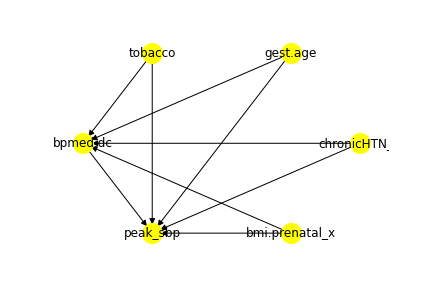

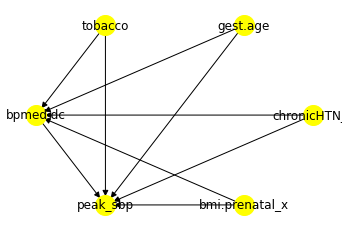

In [35]:
import pandas as pd
from dowhy import CausalModel
from IPython.display import Image, display

# read Stata .dta file 
#df = pd.read_stata("data_rep.dta")

# set variables 
treatment = 'bpmed.dc'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# build causal graph with dowhy 
model = CausalModel(
    data=df_prop,
    treatment=treatment, 
    outcome=outcome, 
    common_causes=covariates, 
    instruments=None, 
    effect_modifiers=None)
model.view_model()
display(Image(filename="causal_model.png"))

In [183]:
# drop missing data 
#all_variables = treatment+outcome+covariates
#df = df.dropna(axis=0, subset=all_variables)

# split data into train and test sets 
train, test = train_test_split(df_prop, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

In [184]:
X

,bmi.prenatal_x,chronicHTN_x,gest.age
42,40.7,1,35.7
339,41.7,0,37.4
36,29.4,0,38.4
250,27.4,0,38.0
396,19.9,0,40.7
...,...,...,...
282,42.8,0,37.0
91,20.0,0,39.6
194,29.9,0,40.4
260,45.8,0,37.0


In [13]:
pip install econml

  Using cached econml-0.13.0-cp39-cp39-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached dowhy-0.6-py3-none-any.whl (123 kB)
  Using cached shap-0.39.0.tar.gz (356 kB)
  Using cached lightgbm-3.3.2-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.2 MB)
  Created wheel for shap: filename=shap-0.39.0-cp39-cp39-macosx_10_9_x86_64.whl size=413615 sha256=4cb2403887fbe2b4f27789bd77a34255df08a8a44120736ade2a7a3acddecae0
  Stored in directory: /Users/michaelscofiled/Library/Caches/pip/wheels/bb/91/16/f6a057925f93af7e4281f6afce3495b595b473342766eb451c
Successfully built shap
  Attempting uninstall: dowhy
    Found existing installation: dowhy 0.7.1
    Uninstalling dowhy-0.7.1:
      Successfully uninstalled dowhy-0.7.1
Note: you may need to restart the kernel to use updated packages.


In [185]:
#from econml.dml import CausalForestDML
#from sklearn.linear_model import LassoCV

## set parameters for causal forest 
#causal_forest = CausalForestDML(criterion='het', 
#                                n_estimators=10000,       
#                                min_samples_leaf=10, 
#                                max_depth=None, 
#                                max_samples=0.5,
#                                discrete_treatment=False,
#                                honest=True,
#                                inference=True,
#                                cv=10,
#                                model_t=LassoCV(), 
#                                model_y=LassoCV(),
#                                )
                      
## fit train data to causal forest model 
#causal_forest.fit(Y, T, X=X, W=W)
## estimate the CATE with the test set 
#causal_forest.const_marginal_ate(X_test)


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [186]:
## use causal forest model to estimate treatment effects  
#treatment_effects = causal_forest.effect(X)
## calculate lower bound and upper bound confidence intervals 
#lb, ub = causal_forest.effect_interval(X, alpha=0.05)

## convert arrays to pandas dataframes for plotting
#te_df = pd.DataFrame(treatment_effects, columns=['cate'])
#lb_df = pd.DataFrame(lb, columns=['lb'])
#ub_df = pd.DataFrame(ub, columns=['ub'])



In [31]:
#te_df

,cate
0,5.100929
1,0.328166
2,0.273264
3,1.049031
4,-2.684865
...,...
325,-2.336451
326,-1.375993
327,1.665098
328,-0.239499


In [35]:
#te_df.index

RangeIndex(start=0, stop=330, step=1)

In [36]:
#lb_df.index

RangeIndex(start=0, stop=330, step=1)

In [32]:
#lb_df

,lb
0,-2.606904
1,-8.756880
2,-5.174609
3,-4.929220
4,-14.434244
...,...
325,-7.732398
326,-8.121410
327,-4.422330
328,-10.849538


In [187]:
## merge dataframes and sort 
#df = te_df.join(lb_df)
##df.drop(columns=['key_0'], inplace=True)
#df = df.join(ub_df)
##df.drop(columns=['key_0'], inplace=True)
#df.sort_values('cate', inplace=True, ascending=True)
#df.reset_index(inplace=True, drop=True)

## calculate rolling mean
#z = df.rolling(window=10, center=True).mean()

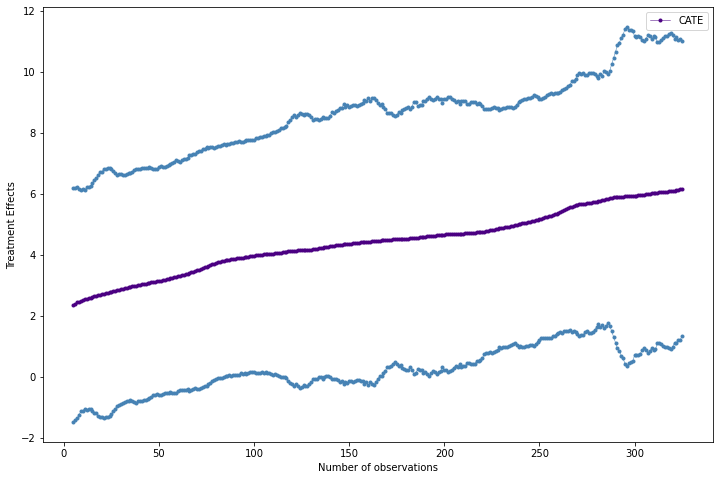

In [188]:
#import matplotlib.pyplot as plt

## set plot size
#fig, ax = plt.subplots(figsize=(12, 8))
## plot lines for treatment effects and confidence intervals
#ax.plot(z['cate'],
#        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
#ax.plot(z['lb'],
#        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
#ax.plot(z['ub'],
#        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
## label axes and create legend
#ax.set_ylabel('Treatment Effects')
#ax.set_xlabel('Number of observations')
#ax.legend()

In [57]:
#df1_drop={}
#for id in id_array:
#    df1_drop[id] = df1_pp_dic_imputed[id].head(45)
#    df1_drop[id]['response_sbp'] = df1_pp_dic_imputed[id]['sbp'].tolist()[1:]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#df_peak = peak_df1.merge(df3, how='left', on='id')

In [94]:
df_jx_concat = pd.read_csv('python notebook projects\jx_concat.csv')

In [95]:
df_jx_concat

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,index_cluster
0,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,2
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,0
2,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,Yes,36.2,No,White,Non-Hispanic,Yes,BMI > 30,36.0,No,0
3,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,31.4,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No,0
4,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,Yes,23.7,No,White,Non-Hispanic,Yes,BMI < 30,32.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,27.9,No,White,Non-Hispanic,NaN,BMI < 30,33.0,No,2
409,1265,Baseline,124.0,90.0,NaN,NaN,89.5,101.333333,34.0,3,...,No,49.8,No,NaN,NaN,NaN,BMI > 30,28.0,No,2
410,1276,Baseline,110.0,70.0,NaN,NaN,86.0,83.333333,40.0,2,...,Yes,32.9,No,White,Non-Hispanic,NaN,BMI > 30,24.0,No,1
411,1278,Baseline,112.0,74.0,NaN,NaN,51.0,86.666667,38.0,3,...,No,25.0,No,White,Non-Hispanic,NaN,BMI < 30,20.0,No,0


In [89]:
peak_df1['spike_150']=(peak_df1['peak_sbp']>=150).astype(int)


In [40]:
df_prop

,id,bmi.prenatal_x,chronicHTN_x,gest.age,bpmed.dc,peak_sbp,tobacco
0,2,42.9,0,35.3,1,149.000000,0.0
1,3,43.6,1,32.6,1,136.200000,0.0
2,6,36.2,0,38.3,0,136.833333,0.0
3,7,31.4,0,41.4,0,138.000000,0.0
4,8,23.7,0,35.4,0,114.000000,0.0
...,...,...,...,...,...,...,...
408,1264,27.9,0,37.1,0,160.500000,0
409,1265,49.8,1,26.9,1,142.000000,0
410,1276,32.9,0,40.1,0,134.000000,0
411,1278,25.0,0,39.0,0,122.000000,0


In [41]:
df_jx_concat = df_prop.merge(df_jx_concat[['id','index_cluster']], how='left', on='id')

In [42]:
df_jx_concatdcday = df_prop_dcday.merge(df_jx_concat[['id','index_cluster']], how='left', on='id')

In [43]:
df_jx_concat_0 = df_jx_concat.loc[df_jx_concat['index_cluster']== 0]
df_jx_concat_1 = df_jx_concat.loc[df_jx_concat['index_cluster']== 1]
df_jx_concat_2 = df_jx_concat.loc[df_jx_concat['index_cluster']== 2]

In [44]:
df_jx_concatdcday_0 = df_jx_concatdcday.loc[df_jx_concatdcday['index_cluster']== 0]
df_jx_concatdcday_1 = df_jx_concatdcday.loc[df_jx_concatdcday['index_cluster']== 1]
df_jx_concatdcday_2 = df_jx_concatdcday.loc[df_jx_concatdcday['index_cluster']== 2]

In [45]:
df_jx_concatdcday_0

,id,bmi.prenatal_x,chronicHTN_x,gest.age,dcDayPP_x,peak_sbp,tobacco,index_cluster
1,3,43.6,1,32.6,4,136.200000,0.0,0
2,6,36.2,0,38.3,3,136.833333,0.0,0
3,7,31.4,0,41.4,4,138.000000,0.0,0
4,8,23.7,0,35.4,4,114.000000,0.0,0
5,10,33.2,0,26.9,4,135.500000,0.0,0
...,...,...,...,...,...,...,...,...
405,1245,24.6,0,37.6,2,143.000000,0,0
406,1259,22.3,0,40.3,1,135.000000,0,0
407,1262,26.4,0,38.1,3,140.000000,0,0
411,1278,25.0,0,39.0,3,122.000000,0,0


In [49]:
##propensity score method
X_0 = df_jx_concatdcday_0[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']]
y_0 = df_jx_concatdcday_0['dcDayPP_x']

#Random Forest
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.20, random_state = 9)
rf_0 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_0.fit(X_train_0, y_train_0)
y_predRf_0 = rf_0.predict_proba(X_test_0).T[1]
rf_score_0= roc_auc_score(y_test_0,y_predRf_0) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_0, 3)))

y_predRf = rf_0.predict_proba(X_0).T[1]
df_jx_concatdcday_0['propensity'] = y_predRf.tolist()
df_jx_concatdcday_0['propensity'].loc[df_jx_concatdcday_0['dcDayPP_x']== 0.0]=1-df_jx_concatdcday_0['propensity'].loc[df_jx_concatdcday_0['dcDayPP_x']== 0.0]

df_jx_concatdcday_0_treat=df_jx_concatdcday_0.loc[df_jx_concatdcday_0['dcDayPP_x']==1.0]
df_jx_concatdcday_0_pla=df_jx_concatdcday_0.loc[df_jx_concatdcday_0['dcDayPP_x']==0.0]

avg_01=(df_jx_concatdcday_0_treat['peak_sbp']/df_jx_concatdcday_0_treat['propensity']).sum()/137
avg_00=(df_jx_concatdcday_0_pla['peak_sbp']/df_jx_concatdcday_0_pla['propensity']).sum()/137

AUC of Random Forest on test data is 0.724


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_12305/1765551468.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jx_concatdcday_0['propensity'] = y_predRf.tolist()
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
avg_01

135.4898111037486

In [51]:
avg_00

116.15539002921167

In [52]:
X_1 = df_jx_concatdcday_1[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']]
y_1 = df_jx_concatdcday_1['dcDayPP_x']
#Random Forest
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_1, y_1, test_size = 0.20, random_state = 9)
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_1.fit(X_train_0, y_train_0)
y_predRf_1 = rf_1.predict_proba(X_test_0).T[1]
rf_score_1= roc_auc_score(y_test_0,y_predRf_1) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_1, 3)))

y_predRf = rf_0.predict_proba(X_1).T[1]
df_jx_concatdcday_1['propensity'] = y_predRf.tolist()
df_jx_concatdcday_1['propensity'].loc[df_jx_concatdcday_1['dcDayPP_x']== 0.0]=1-df_jx_concatdcday_1['propensity'].loc[df_jx_concatdcday_1['dcDayPP_x']== 0.0]

df_jx_concatdcday_1_treat=df_jx_concatdcday_1.loc[df_jx_concatdcday_1['dcDayPP_x']==1.0]
df_jx_concatdcday_1_pla=df_jx_concatdcday_1.loc[df_jx_concatdcday_1['dcDayPP_x']==0.0]

avg_11=(df_jx_concatdcday_1_treat['peak_sbp']/df_jx_concatdcday_1_treat['propensity']).sum()/195
avg_10=(df_jx_concatdcday_1_pla['peak_sbp']/df_jx_concatdcday_1_pla['propensity']).sum()/195

AUC of Random Forest on test data is 0.585


/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_12305/4155683860.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jx_concatdcday_1['propensity'] = y_predRf.tolist()
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
avg_11

189.90447442576902

In [54]:
avg_10

109.87338786254509

In [39]:
df_jx_concat_0 = df_jx_concat.loc[df_jx_concat['index_cluster']== 0]
df_jx_concat_1 = df_jx_concat.loc[df_jx_concat['index_cluster']== 1]
df_jx_concat_2 = df_jx_concat.loc[df_jx_concat['index_cluster']== 2]

In [190]:
#df_jx_concat_2.loc[df_jx_concat_2['bpmed.dc']==1.0].count()

id                39
bmi.prenatal_x    39
chronicHTN_x      39
gest.age          39
bpmed.dc          39
propensity        39
peak_sbp          39
index_cluster     39
dtype: int64

In [40]:
X_0 = df_jx_concat_0[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']]
y_0 = df_jx_concat_0['bpmed.dc']

In [41]:
#Random Forest
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.20, random_state = 9)
rf_0 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_0.fit(X_train_0, y_train_0)
y_predRf_0 = rf_0.predict_proba(X_test_0).T[1]
rf_score_0= roc_auc_score(y_test_0,y_predRf_0) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_0, 3)))

AUC of Random Forest on test data is 0.662


In [42]:
rf_0.fit(X_0, y_0)
y_predRf = rf_0.predict_proba(X_0).T[1]

In [43]:
df_jx_concat_0['propensity'] = y_predRf.tolist()

/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_1142/562637815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jx_concat_0['propensity'] = y_predRf.tolist()


In [44]:
df_jx_concat_0['propensity'].loc[df_jx_concat_0['bpmed.dc']== 0.0]=1-df_jx_concat_0['propensity'].loc[df_jx_concat_0['bpmed.dc']== 0.0]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
df_jx_concat_0_treat=df_jx_concat_0.loc[df_jx_concat_0['bpmed.dc']==1.0]
df_jx_concat_0_pla=df_jx_concat_0.loc[df_jx_concat_0['bpmed.dc']==0.0]

In [46]:
avg_01=(df_jx_concat_0_treat['peak_sbp']/df_jx_concat_0_treat['propensity']).sum()/137
avg_00=(df_jx_concat_0_pla['peak_sbp']/df_jx_concat_0_pla['propensity']).sum()/137

In [47]:
avg_01

/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [48]:
avg_00

In [49]:
X_1 = df_jx_concat_1[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']]
y_1 = df_jx_concat_1['bpmed.dc']

In [50]:
#Random Forest
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_1, y_1, test_size = 0.20, random_state = 9)
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_1.fit(X_train_0, y_train_0)
y_predRf_1 = rf_1.predict_proba(X_test_0).T[1]
rf_score_1= roc_auc_score(y_test_0,y_predRf_1) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_1, 3)))

AUC of Random Forest on test data is 0.81


In [51]:
rf_1.fit(X_1, y_1)
y_predRf = rf_1.predict_proba(X_1).T[1]

In [52]:
df_jx_concat_1['propensity'] = y_predRf.tolist()

/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_1142/542506590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jx_concat_1['propensity'] = y_predRf.tolist()


In [53]:
df_jx_concat_1['propensity'].loc[df_jx_concat_1['bpmed.dc']== 0.0]=1-df_jx_concat_1['propensity'].loc[df_jx_concat_1['bpmed.dc']== 0.0]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
df_jx_concat_1_treat=df_jx_concat_1.loc[df_jx_concat_1['bpmed.dc']==1.0]
df_jx_concat_1_pla=df_jx_concat_1.loc[df_jx_concat_1['bpmed.dc']==0.0]

In [55]:
avg_11=(df_jx_concat_1_treat['peak_sbp']/df_jx_concat_1_treat['propensity']).sum()/195
avg_10=(df_jx_concat_1_pla['peak_sbp']/df_jx_concat_1_pla['propensity']).sum()/195

In [56]:
avg_11

/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [57]:
avg_10

In [58]:
X_2 = df_jx_concat_2[['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']]
y_2 = df_jx_concat_2['bpmed.dc']

In [59]:
#Random Forest
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_2, y_2, test_size = 0.20, random_state = 9)
rf_2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_2.fit(X_train_0, y_train_0)
y_predRf_2 = rf_2.predict_proba(X_test_0).T[1]
rf_score_2= roc_auc_score(y_test_0,y_predRf_2) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_2, 3)))

AUC of Random Forest on test data is 0.757


In [60]:
rf_2.fit(X_2, y_2)
y_predRf = rf_2.predict_proba(X_2).T[1]

In [61]:
df_jx_concat_2['propensity'] = y_predRf.tolist()
df_jx_concat_2['propensity'].loc[df_jx_concat_2['bpmed.dc']== 0.0]=1-df_jx_concat_2['propensity'].loc[df_jx_concat_2['bpmed.dc']== 0.0]

/var/folders/5q/wwpsrggx0ddd8xk64j4vprc40000gn/T/ipykernel_1142/1485972091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jx_concat_2['propensity'] = y_predRf.tolist()
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
df_jx_concat_2_treat=df_jx_concat_2.loc[df_jx_concat_2['bpmed.dc']==1.0]
df_jx_concat_2_pla=df_jx_concat_2.loc[df_jx_concat_2['bpmed.dc']==0.0]

In [63]:
avg_21=(df_jx_concat_2_treat['peak_sbp']/df_jx_concat_2_treat['propensity']).sum()/81
avg_20=(df_jx_concat_2_pla['peak_sbp']/df_jx_concat_2_pla['propensity']).sum()/81

In [64]:
avg_21

/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [65]:
avg_20

In [96]:
#df_jx_concat_2_pla['propensity']

6      0.533994
17     0.658063
37     0.537605
51     0.504413
65     0.662582
66     0.683698
78     0.658063
99     0.653967
149    0.549636
159    0.689743
168    0.658832
173    0.573508
177    0.346537
201    0.653967
221    0.734777
229    0.658812
237    0.672392
243    0.330102
244    0.374724
260    0.536805
269    0.671461
271    0.685196
275    0.710393
281    0.775335
299    0.545727
312    0.766456
315    0.797306
323    0.660891
329    0.689278
331    0.408338
340    0.448347
342    0.687163
343    0.768849
344    0.690208
349    0.455091
351    0.541965
358    0.688196
363    0.660578
378    0.685196
380    0.663285
393    0.759372
408    0.638000
Name: propensity, dtype: float64

In [79]:
df_jx_concat_0

,id,bmi.prenatal_x,chronicHTN_x,gest.age,bpmed.dc,peak_sbp,tobacco,index_cluster
1,3,43.6,1,32.6,1,136.200000,0.0,0
2,6,36.2,0,38.3,0,136.833333,0.0,0
3,7,31.4,0,41.4,0,138.000000,0.0,0
4,8,23.7,0,35.4,0,114.000000,0.0,0
5,10,33.2,0,26.9,1,135.500000,0.0,0
...,...,...,...,...,...,...,...,...
405,1245,24.6,0,37.6,0,143.000000,0,0
406,1259,22.3,0,40.3,0,135.000000,0,0
407,1262,26.4,0,38.1,0,140.000000,0,0
411,1278,25.0,0,39.0,0,122.000000,0,0


In [82]:
pip install --upgrade --no-deps statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 8.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 920.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 636.4 kB/s eta 0:00:0000:0100:02
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.39.0 requires cloudpickle, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install patsy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.6 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dowhy 0.6 requires networkx>=2.0, which is not installed.
dowhy 0.6 requires sympy>=1.4, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install cloudpickle

  Using cached cloudpickle-2.2.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#train causal forest for each cluster
# set variables 
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
treatment = 'bpmed.dc'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concat_0, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_0 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_0.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_0.const_marginal_ate(X_test)

In [170]:
#train causal forest for each cluster
# set variables 
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
treatment = 'bpmed.dc'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concat_1, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_1 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_1.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_1.const_marginal_ate(X_test)

In [178]:
#train causal forest for each cluster
# set variables 
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
treatment = 'bpmed.dc'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concat_2, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_2 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_2.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_2.const_marginal_ate(X_test)

In [187]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_0.effect(df_jx_concat_0[covariates])
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_0.effect_interval(df_jx_concat_0[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

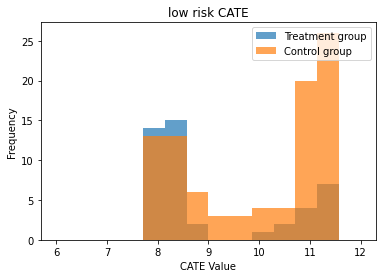

In [188]:
df_jx_concat_0_reset = df_jx_concat_0.reset_index()
treat_index = df_jx_concat_0_reset.loc[df_jx_concat_0_reset['bpmed.dc']== 1].index.tolist()
control_index = df_jx_concat_0_reset.loc[df_jx_concat_0_reset['bpmed.dc']== 0].index.tolist()

treat_effects=[]
cont_effects=[]

for i in treat_index:
    treat_effects.append(treatment_effects[i])
    
for j in control_index:
    cont_effects.append(treatment_effects[j])
    
import numpy
from matplotlib import pyplot

x = treat_effects
y = cont_effects

bins = numpy.linspace(6, 12, 15)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('low risk CATE')
pyplot.savefig('lrC_med_dc.pdf')
pyplot.show() 

In [171]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_1.effect(df_jx_concat_1[covariates])
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_1.effect_interval(df_jx_concat_1[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

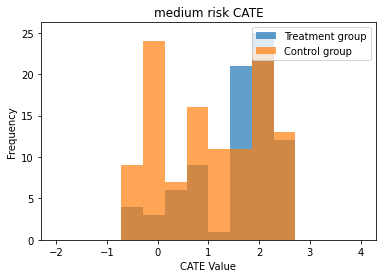

In [174]:
df_jx_concat_1_reset = df_jx_concat_1.reset_index()
treat_index = df_jx_concat_1_reset.loc[df_jx_concat_1_reset['bpmed.dc']== 1].index.tolist()
control_index = df_jx_concat_1_reset.loc[df_jx_concat_1_reset['bpmed.dc']== 0].index.tolist()

treat_effects=[]
cont_effects=[]

for i in treat_index:
    treat_effects.append(treatment_effects[i])
    
for j in control_index:
    cont_effects.append(treatment_effects[j])
    
import numpy
from matplotlib import pyplot

x = treat_effects
y = cont_effects

bins = numpy.linspace(-2, 4, 15)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('medium risk CATE')
pyplot.savefig('mrC_med_dc.pdf')
pyplot.show() 

In [179]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_2.effect(df_jx_concat_2[covariates])
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_2.effect_interval(df_jx_concat_2[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

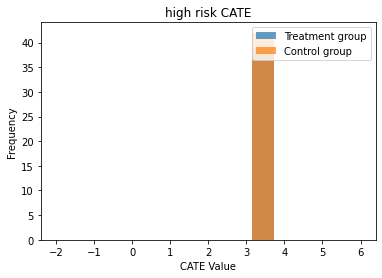

In [180]:
df_jx_concat_2_reset = df_jx_concat_2.reset_index()
treat_index = df_jx_concat_2_reset.loc[df_jx_concat_2_reset['bpmed.dc']== 1].index.tolist()
control_index = df_jx_concat_2_reset.loc[df_jx_concat_2_reset['bpmed.dc']== 0].index.tolist()

treat_effects=[]
cont_effects=[]

for i in treat_index:
    treat_effects.append(treatment_effects[i])
    
for j in control_index:
    cont_effects.append(treatment_effects[j])
    
import numpy
from matplotlib import pyplot

x = treat_effects
y = cont_effects

bins = numpy.linspace(-2, 6, 15)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('high risk CATE')
pyplot.savefig('hrC_med_dc.pdf')
pyplot.show() 

In [181]:
#train causal forest for each cluster
# set variables 
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
treatment = 'dcDayPP_x'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concatdcday_0, test_size=0.2, random_state=2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_0 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_0.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_0.const_marginal_ate(X_test)

In [182]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_0.effect(df_jx_concatdcday_0[covariates])
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_0.effect_interval(df_jx_concatdcday_0[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

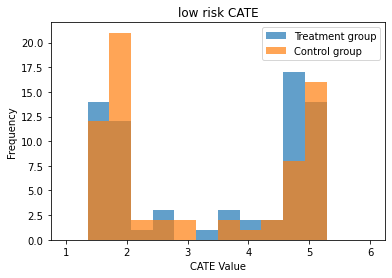

In [185]:
df_jx_concatdcday_0_reset = df_jx_concatdcday_0.reset_index()
treat_index = df_jx_concatdcday_0_reset.loc[df_jx_concatdcday_0_reset['dcDayPP_x']== 1].index.tolist()
control_index = df_jx_concatdcday_0_reset.loc[df_jx_concatdcday_0_reset['dcDayPP_x']== 0].index.tolist()

treat_effects=[]
cont_effects=[]

for i in treat_index:
    treat_effects.append(treatment_effects[i])
    
for j in control_index:
    cont_effects.append(treatment_effects[j])
    
import numpy
from matplotlib import pyplot

x = treat_effects
y = cont_effects

bins = numpy.linspace(1, 6, 15)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('low risk CATE')
pyplot.savefig('lrC_med_pp.pdf')
pyplot.show() 

In [189]:
#train causal forest for each cluster
# set variables 
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
treatment = 'dcDayPP_x'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concatdcday_1, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_1 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_1.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_1.const_marginal_ate(X_test)

In [190]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_1.effect(df_jx_concatdcday_1[covariates])
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_1.effect_interval(df_jx_concatdcday_1[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

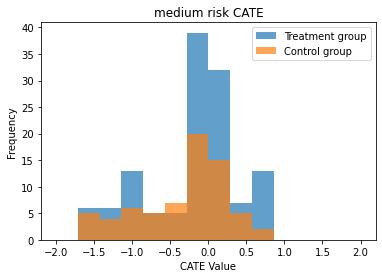

In [192]:
df_jx_concatdcday_1_reset = df_jx_concatdcday_1.reset_index()
treat_index = df_jx_concatdcday_1_reset.loc[df_jx_concatdcday_1_reset['dcDayPP_x']== 1].index.tolist()
control_index = df_jx_concatdcday_1_reset.loc[df_jx_concatdcday_1_reset['dcDayPP_x']== 0].index.tolist()

treat_effects=[]
cont_effects=[]

for i in treat_index:
    treat_effects.append(treatment_effects[i])
    
for j in control_index:
    cont_effects.append(treatment_effects[j])
    
import numpy
from matplotlib import pyplot

x = treat_effects
y = cont_effects

bins = numpy.linspace(-2, 2, 15)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('medium risk CATE')
pyplot.savefig('mrC_med_pp.pdf')
pyplot.show() 

In [193]:
#train causal forest for each cluster
# set variables 
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
treatment = 'dcDayPP_x'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concatdcday_2, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_2 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_2.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_2.const_marginal_ate(X_test)

In [194]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_2.effect(df_jx_concatdcday_2[covariates])
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_2.effect_interval(df_jx_concatdcday_2[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

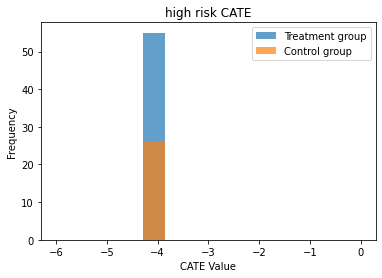

In [197]:
df_jx_concatdcday_2_reset = df_jx_concatdcday_2.reset_index()
treat_index = df_jx_concatdcday_2_reset.loc[df_jx_concatdcday_2_reset['dcDayPP_x']== 1].index.tolist()
control_index = df_jx_concatdcday_2_reset.loc[df_jx_concatdcday_2_reset['dcDayPP_x']== 0].index.tolist()

treat_effects=[]
cont_effects=[]

for i in treat_index:
    treat_effects.append(treatment_effects[i])
    
for j in control_index:
    cont_effects.append(treatment_effects[j])
    
import numpy
from matplotlib import pyplot

x = treat_effects
y = cont_effects

bins = numpy.linspace(-6, 0, 15)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('high risk CATE')
pyplot.savefig('hrC_med_pp.pdf')
pyplot.show() 

In [74]:
df_jx_concatdcday_2.loc[df_jx_concatdcday_2['dcDayPP_x']==1]

,id,bmi.prenatal_x,chronicHTN_x,gest.age,dcDayPP_x,peak_sbp,tobacco,index_cluster
0,2,42.9,0,35.3,1,149.000000,0.0,2
6,15,57.2,0,36.1,1,157.000000,0.0,2
16,33,35.4,0,36.9,1,160.000000,0.0,2
22,41,42.8,1,34.6,1,150.000000,0.0,2
28,51,42.2,1,36.1,1,147.000000,0.0,2
37,67,47.8,0,37.4,1,145.500000,0.0,2
44,79,36.3,1,38.7,1,167.000000,0.0,2
48,97,39.7,1,37.0,1,144.000000,0.0,2
51,104,29.7,1,39.9,1,146.000000,0.0,2
55,118,35.9,1,37.4,1,154.000000,0.0,2


In [75]:
x


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [130]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_0.effect(df_jx_concat_0[covariates])
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_0.effect_interval(df_jx_concat_0[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

In [209]:
df_jx_concat_0

,id,bmi.prenatal_x,chronicHTN_x,gest.age,bpmed.dc,peak_sbp,tobacco,index_cluster
1,3,43.6,1,32.6,1.0,136.200000,0.0,0
2,6,36.2,0,38.3,0.0,136.833333,0.0,0
3,7,31.4,0,41.4,0.0,138.000000,0.0,0
4,8,23.7,0,35.4,0.0,114.000000,0.0,0
5,10,33.2,0,26.9,1.0,135.500000,0.0,0
...,...,...,...,...,...,...,...,...
405,1245,24.6,0,37.6,0.0,143.000000,0,0
406,1259,22.3,0,40.3,0.0,135.000000,0,0
407,1262,26.4,0,38.1,0.0,140.000000,0,0
411,1278,25.0,0,39.0,0.0,122.000000,0,0


In [222]:
df_jx_concat_0_reset = df_jx_concat_0.reset_index()

In [223]:
df_jx_concat_0_reset

,index,id,bmi.prenatal_x,chronicHTN_x,gest.age,bpmed.dc,peak_sbp,tobacco,index_cluster
0,1,3,43.6,1,32.6,1.0,136.200000,0.0,0
1,2,6,36.2,0,38.3,0.0,136.833333,0.0,0
2,3,7,31.4,0,41.4,0.0,138.000000,0.0,0
3,4,8,23.7,0,35.4,0.0,114.000000,0.0,0
4,5,10,33.2,0,26.9,1.0,135.500000,0.0,0
...,...,...,...,...,...,...,...,...,...
132,405,1245,24.6,0,37.6,0.0,143.000000,0,0
133,406,1259,22.3,0,40.3,0.0,135.000000,0,0
134,407,1262,26.4,0,38.1,0.0,140.000000,0,0
135,411,1278,25.0,0,39.0,0.0,122.000000,0,0


In [224]:
treat_index = df_jx_concat_0_reset.loc[df_jx_concat_0_reset['bpmed.dc']== 1].index.tolist()

In [225]:
control_index = df_jx_concat_0_reset.loc[df_jx_concat_0_reset['bpmed.dc']== 0].index.tolist()

In [226]:
control_index


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [227]:
treat_effects=[]
cont_effects=[]

for i in treat_index:
    treat_effects.append(treatment_effects[i])
    
for j in control_index:
    cont_effects.append(treatment_effects[j])

In [228]:
treat_effects

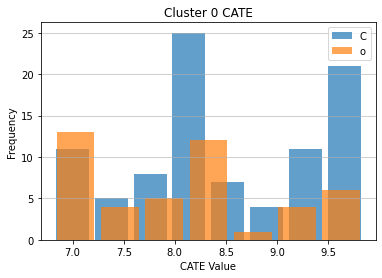

In [122]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=treat_effects, bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.legend('Treatment group')
n, bins, patches = plt.hist(x=cont_effects, bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.legend('Control group')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CATE Value')
plt.ylabel('Frequency')
plt.title('Cluster 0 CATE')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

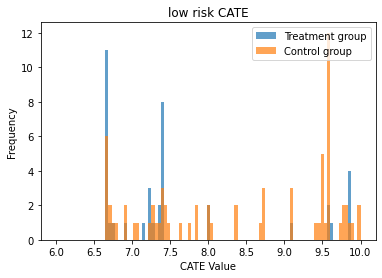

In [229]:
import numpy
from matplotlib import pyplot

x = treat_effects
y = cont_effects

bins = numpy.linspace(6, 10, 100)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('low risk CATE')
pyplot.show()

In [230]:
#train causal forest for each cluster
# set variables 
treatment = 'bpmed.dc'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concat_1, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_1 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_1.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_1.const_marginal_ate(X_test)


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [231]:
# use causal forest model to estimate treatment effects  
treatment_effects_1 = causal_forest_1.effect(df_jx_concat_1[covariates])
# calculate lower bound and upper bound confidence intervals 
lb_1, ub_1 = causal_forest_1.effect_interval(df_jx_concat_1[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df_1 = pd.DataFrame(treatment_effects_1, columns=['cate'])
lb_df_1 = pd.DataFrame(lb_1, columns=['lb'])
ub_df_1 = pd.DataFrame(ub_1, columns=['ub'])

In [232]:
df_jx_concat_1_reset = df_jx_concat_1.reset_index()
treat_index_1 = df_jx_concat_1_reset.loc[df_jx_concat_1_reset['bpmed.dc']== 1].index.tolist()
control_index_1 = df_jx_concat_1_reset.loc[df_jx_concat_1_reset['bpmed.dc']== 0].index.tolist()

treat_effects_1=[]
cont_effects_1=[]

for i in treat_index_1:
    treat_effects_1.append(treatment_effects_1[i])
    
for j in control_index_1:
    cont_effects_1.append(treatment_effects_1[j])

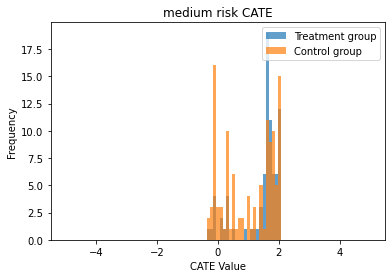

In [234]:
x = treat_effects_1
y = cont_effects_1

bins = numpy.linspace(-5, 5, 100)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('medium risk CATE')
pyplot.show()

In [235]:
treatment = 'bpmed.dc'
outcome = 'peak_sbp'
covariates = ['bmi.prenatal_x', 'chronicHTN_x', 'gest.age', 'tobacco']

# split data into train and test sets 
train, test = train_test_split(df_jx_concat_2, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# set parameters for causal forest 
causal_forest_2 = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_2.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_2.const_marginal_ate(X_test)


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [242]:
df_jx_concat_0.loc[df_jx_concat_0['bpmed.dc']==1]

,id,bmi.prenatal_x,chronicHTN_x,gest.age,bpmed.dc,peak_sbp,tobacco,index_cluster
1,3,43.6,1,32.6,1.0,136.200000,0.0,0
5,10,33.2,0,26.9,1.0,135.500000,0.0,0
18,37,48.1,0,30.7,1.0,139.428571,0.0,0
21,40,34.1,0,37.0,1.0,168.000000,0.0,0
35,62,24.7,0,36.0,1.0,142.000000,0.0,0
39,72,24.9,0,39.3,1.0,136.750000,0.0,0
49,101,25.5,0,41.7,1.0,142.000000,0.0,0
58,127,21.0,0,37.4,1.0,124.000000,0.0,0
73,169,30.3,0,39.9,1.0,139.875000,0.0,0
83,182,19.9,0,39.0,1.0,148.090909,0.0,0


In [236]:
# use causal forest model to estimate treatment effects  
treatment_effects_2 = causal_forest_2.effect(df_jx_concat_2[covariates])
# calculate lower bound and upper bound confidence intervals 
lb_2, ub_2 = causal_forest_2.effect_interval(df_jx_concat_2[covariates], alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df_2 = pd.DataFrame(treatment_effects_2, columns=['cate'])
lb_df_2 = pd.DataFrame(lb_2, columns=['lb'])
ub_df_2 = pd.DataFrame(ub_2, columns=['ub'])

In [237]:
df_jx_concat_2_reset = df_jx_concat_2.reset_index()
treat_index_2 = df_jx_concat_2_reset.loc[df_jx_concat_2_reset['bpmed.dc']== 1].index.tolist()
control_index_2 = df_jx_concat_2_reset.loc[df_jx_concat_2_reset['bpmed.dc']== 0].index.tolist()

treat_effects_2=[]
cont_effects_2=[]

for i in treat_index_2:
    treat_effects_2.append(treatment_effects_2[i])
    
for j in control_index_2:
    cont_effects_2.append(treatment_effects_2[j])

In [88]:
treat_index_2


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [90]:
control_index_2

In [86]:
treatment_effects_2

array([0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012347,
       0.07012347, 0.07012347, 0.07012347, 0.07012347, 0.07012

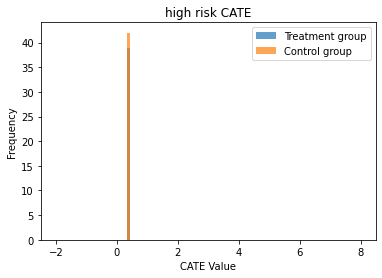

In [238]:
x = treat_effects_2
y = cont_effects_2

bins = numpy.linspace(-2, 8, 100)

pyplot.hist(x, bins, alpha=0.7, label='Treatment group')
pyplot.hist(y, bins, alpha=0.7, label='Control group')
pyplot.legend(loc='upper right')
pyplot.xlabel('CATE Value')
pyplot.ylabel('Frequency')
pyplot.title('high risk CATE')
pyplot.show()

In [175]:
# merge dataframes and sort 
df = te_df.join(lb_df)
#df.drop(columns=['key_0'], inplace=True)
df = df.join(ub_df)
#df.drop(columns=['key_0'], inplace=True)
df.sort_values('cate', inplace=True, ascending=True)
df.reset_index(inplace=True, drop=True)

# calculate rolling mean
z = df.rolling(window=10, center=True).mean()

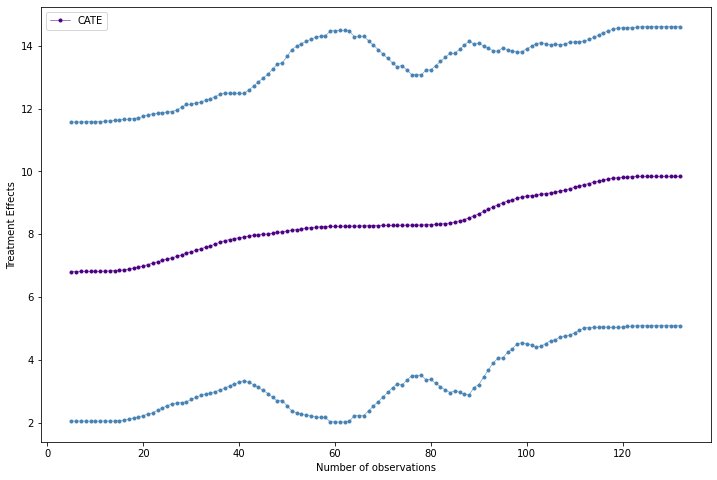

In [176]:
import matplotlib.pyplot as plt

# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

In [178]:
# merge dataframes and sort 
df_1 = te_df_1.join(lb_df_1)
#df.drop(columns=['key_0'], inplace=True)
df_1 = df_1.join(ub_df_1)
#df.drop(columns=['key_0'], inplace=True)
df_1.sort_values('cate', inplace=True, ascending=True)
df_1.reset_index(inplace=True, drop=True)

# calculate rolling mean
z_1 = df_1.rolling(window=10, center=True).mean()

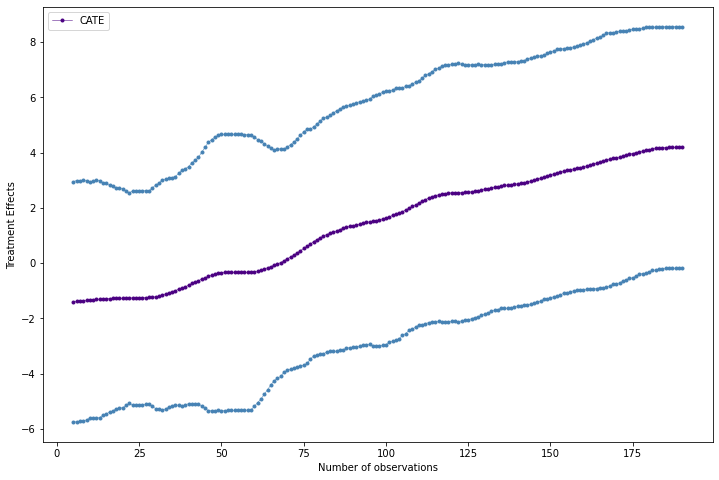

In [179]:
# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z_1['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z_1['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z_1['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

In [180]:
# merge dataframes and sort 
df_2 = te_df_2.join(lb_df_2)
#df.drop(columns=['key_0'], inplace=True)
df_2 = df_2.join(ub_df_2)
#df.drop(columns=['key_0'], inplace=True)
df_2.sort_values('cate', inplace=True, ascending=True)
df_2.reset_index(inplace=True, drop=True)

# calculate rolling mean
z_2 = df_2.rolling(window=10, center=True).mean()

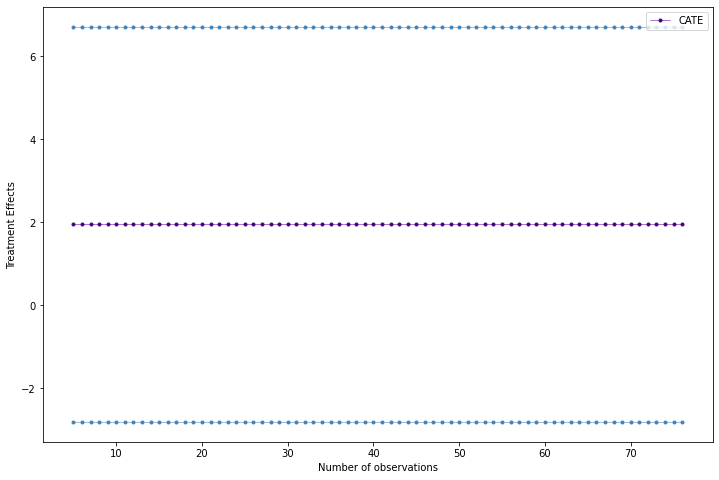

In [181]:
# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z_2['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z_2['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z_2['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

In [65]:
idex0 = df_merge_tree.loc[df_merge_tree['index_cluster']== 0]['id'].tolist()

In [66]:
idex1 = df_merge_tree.loc[df_merge_tree['index_cluster']== 1]['id'].tolist()

In [67]:
idex2 = df_merge_tree.loc[df_merge_tree['index_cluster']== 2]['id'].tolist()

In [68]:
unma_df0 = pd.DataFrame()
for id in idex0:
       unma_df0 = pd.concat([unma_df0, df1_drop[id]])

In [69]:
unma_df0

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,response_sbp
2,3,Baseline,145.00,92.00,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,130.00
1238,3,T1,130.00,84.00,141.333333,74.666667,81.0,99.333333,46.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,150.00
2474,3,T2,150.00,110.00,141.333333,74.666667,81.0,123.333333,40.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,150.00
3710,3,T3,150.00,86.00,141.333333,74.666667,81.0,107.333333,64.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,117.25
7418,3,PPday1,117.25,66.25,141.333333,74.666667,81.0,83.250000,51.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,124.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53146,1300,PPday37,122.00,85.00,NaN,NaN,83.0,97.333333,37.0,3,...,No,24.6,No,Other,Non-Hispanic,NaN,BMI < 30,36.0,No,110.00
54382,1300,PPday38,110.00,78.00,NaN,NaN,92.0,88.666667,32.0,3,...,No,24.6,No,Other,Non-Hispanic,NaN,BMI < 30,36.0,No,117.00
55618,1300,PPday39,117.00,85.00,NaN,NaN,74.0,95.666667,32.0,3,...,No,24.6,No,Other,Non-Hispanic,NaN,BMI < 30,36.0,No,123.00
56854,1300,PPday40,123.00,84.00,NaN,NaN,62.0,97.000000,39.0,3,...,No,24.6,No,Other,Non-Hispanic,NaN,BMI < 30,36.0,No,123.00


In [76]:
df1_drop[3].columns

Index(['id', 'Time', 'sbp', 'dbp', 'max3.sbp', 'max3.dbp', 'hr', 'map',
       'ppress', 'dcDayPP_x', 'bpmed', 'mode.del_x', 'chronicHTN_x',
       'gestHTN_x', 'bmi.prenatal_x', 'sipe_x', 'race_x', 'ethnicity_x',
       'feeding.br_x', 'obesity.prenatal_x', 'mom.age_x', 'DM.pregest_x',
       'response_sbp', 'mom.age_y', 'married', 'race_y', 'ethnicity_y',
       'gravidity', 'parity', 'insurance', 'bmi.prenatal_y',
       'obesity.prenatal_y', 'tobacco', 'DM.pregest_y', 'DM.gest',
       'multichild.preg', 'mom.trans', 'mode.deliv', 'gest.age',
       'deliv.admit.date', 'dc.date', 'birth.date', 'feeding.dc', 'gestHTN_y',
       'chronicHTN_y', 'pree', 'sipe_y', 'pree.w.sf', 'eclampsia', 'hellp',
       'obese', 'preterm', 'mode.del3', 'mode.del_y', 'feeding.br_y',
       'dcDayPP_y', 'HTNtype', 'HTNtype.4', 'over140.90', 'over130.80',
       'PPdaysNum', 'bpmed.base', 'bpmed.T1', 'bpmed.T2', 'bpmed.T3',
       'bpmed.dc', 'bpmed.D2', 'bpmed.D7', 'bpmed.D14', 'bpmed.D30',
       'bpm

In [73]:
for i in id_array:
    df1_drop[i] = df1_drop[i].merge(df3, how='left', on='id')

In [75]:
df1_drop[3]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
0,3,Baseline,145.000000,92.000,141.333333,74.666667,81.0,109.666667,53.000000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
1,3,T1,130.000000,84.000,141.333333,74.666667,81.0,99.333333,46.000000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,3,T2,150.000000,110.000,141.333333,74.666667,81.0,123.333333,40.000000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
3,3,T3,150.000000,86.000,141.333333,74.666667,81.0,107.333333,64.000000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
4,3,PPday1,117.250000,66.250,141.333333,74.666667,81.0,83.250000,51.000000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
5,3,PPday2,124.750000,61.875,144.666667,69.333333,81.0,82.833333,62.875000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
6,3,PPday3,121.142857,65.000,130.333333,69.333333,81.0,83.714286,56.142857,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
7,3,PPday4,136.200000,73.800,147.666667,78.666667,81.0,94.600000,62.400000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
8,3,PPday5,128.100000,77.900,147.666667,78.666667,81.0,94.633333,50.200000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
9,3,PPday6,120.000000,82.000,147.666667,78.666667,81.0,94.666667,38.000000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes


In [77]:
agg_0={}
for id in idex0:
    df1_drop[id]['bpmed'].replace(('Yes', 'No'), (1, 0), inplace=True) 
    df1_drop[id]['chronicHTN_x'].replace(('Yes', 'No'), (1, 0), inplace=True)
    X = df1_drop[id][['sbp','bpmed','chronicHTN_x','gest.age']]
    y = df1_drop[id]['response_sbp']
    agg_0[id] = pd.concat([X,y], axis=1)

In [85]:
from sklearn.metrics import mean_absolute_error
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    #return error, test[:, -1], predictions
    return error
# load the dataset
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
#values = series.values
# transform the time series data into supervised learning
#data = agg.values
# evaluate
#mae, y, yhat = walk_forward_validation(data, 20)
mae={}
for id in idex0:
    data = agg_0[id].values
    mae[id] = walk_forward_validation(data, 30)
    
print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

>expected=118.0, predicted=123.7
>expected=108.0, predicted=120.3
>expected=114.0, predicted=119.0
>expected=106.0, predicted=112.2
>expected=101.0, predicted=115.2
>expected=110.0, predicted=106.9
>expected=111.0, predicted=108.1
>expected=115.0, predicted=108.0
>expected=118.0, predicted=109.6
>expected=118.0, predicted=112.5
>expected=113.0, predicted=113.8
>expected=97.0, predicted=109.1
>expected=110.0, predicted=109.0
>expected=116.0, predicted=108.1
>expected=114.0, predicted=114.4
>expected=113.0, predicted=104.7
>expected=108.0, predicted=101.8
>expected=118.0, predicted=115.7
>expected=114.0, predicted=113.4
>expected=92.5, predicted=109.0
>expected=105.0, predicted=109.6
>expected=115.5, predicted=107.8
>expected=126.0, predicted=113.1
>expected=113.5, predicted=121.0
>expected=118.0, predicted=103.0
>expected=114.0, predicted=113.3
>expected=106.0, predicted=104.5
>expected=105.0, predicted=109.0
>expected=104.0, predicted=112.6
>expected=102.0, predicted=109.3
>expected=11

>expected=100.0, predicted=105.2
>expected=104.0, predicted=118.1
>expected=110.0, predicted=101.0
>expected=107.0, predicted=108.9
>expected=105.0, predicted=101.7
>expected=107.0, predicted=106.6
>expected=102.0, predicted=103.5
>expected=101.0, predicted=114.6
>expected=97.0, predicted=114.4
>expected=99.0, predicted=107.6
>expected=104.0, predicted=107.2
>expected=105.0, predicted=107.3
>expected=107.0, predicted=106.8
>expected=102.0, predicted=103.2
>expected=105.5, predicted=102.0
>expected=109.0, predicted=106.1
>expected=108.5, predicted=110.3
>expected=108.0, predicted=108.8
>expected=101.0, predicted=106.2
>expected=103.0, predicted=103.1
>expected=112.0, predicted=117.3
>expected=110.0, predicted=116.2
>expected=109.0, predicted=112.3
>expected=112.0, predicted=108.7
>expected=110.0, predicted=113.1
>expected=105.0, predicted=110.0
>expected=110.0, predicted=110.5
>expected=105.0, predicted=107.6
>expected=107.0, predicted=110.1
>expected=100.0, predicted=107.7
>expected=11

>expected=108.0, predicted=119.3
>expected=102.0, predicted=116.5
>expected=113.0, predicted=110.8
>expected=109.5, predicted=108.5
>expected=106.0, predicted=108.8
>expected=101.0, predicted=113.1
>expected=114.0, predicted=112.0
>expected=99.0, predicted=104.4
>expected=83.0, predicted=111.2
>expected=95.0, predicted=98.6
>expected=99.0, predicted=98.8
>expected=107.0, predicted=104.2
>expected=118.0, predicted=123.4
>expected=110.0, predicted=102.5
>expected=110.0, predicted=124.7
>expected=107.0, predicted=120.5
>expected=115.0, predicted=117.8
>expected=108.0, predicted=105.3
>expected=111.0, predicted=116.7
>expected=112.0, predicted=117.6
>expected=86.0, predicted=114.0
>expected=105.0, predicted=113.4
>expected=114.0, predicted=115.9
>expected=94.0, predicted=103.8
>expected=113.0, predicted=112.7
>expected=105.0, predicted=91.1
>expected=98.0, predicted=114.7
>expected=118.0, predicted=112.9
>expected=89.0, predicted=104.9
>expected=91.0, predicted=108.4
>expected=93.0, predic

>expected=115.0, predicted=126.5
>expected=116.0, predicted=115.8
>expected=103.0, predicted=118.8
>expected=114.0, predicted=114.1
>expected=101.0, predicted=113.6
>expected=93.0, predicted=112.2
>expected=95.0, predicted=103.5
>expected=97.0, predicted=98.1
>expected=109.0, predicted=102.4
>expected=104.0, predicted=103.4
>expected=108.0, predicted=112.6
>expected=121.0, predicted=109.1
>expected=107.0, predicted=128.0
>expected=100.0, predicted=114.7
>expected=104.0, predicted=98.2
>expected=109.0, predicted=109.7
>expected=106.0, predicted=107.7
>expected=114.0, predicted=112.1
>expected=105.0, predicted=104.5
>expected=90.0, predicted=111.7
>expected=101.0, predicted=97.2
>expected=104.0, predicted=97.7
>expected=98.0, predicted=108.6
>expected=114.0, predicted=106.3
>expected=107.0, predicted=103.6
>expected=92.0, predicted=105.2
>expected=98.0, predicted=97.3
>expected=98.0, predicted=109.6
>expected=97.0, predicted=106.0
>expected=97.0, predicted=107.0
>expected=107.0, predicte

>expected=104.0, predicted=107.7
>expected=110.0, predicted=105.1
>expected=108.0, predicted=107.3
>expected=108.0, predicted=106.9
>expected=118.0, predicted=107.5
>expected=114.0, predicted=114.0
>expected=115.0, predicted=111.4
>expected=113.0, predicted=114.8
>expected=109.0, predicted=104.4
>expected=123.0, predicted=112.8
>expected=121.0, predicted=132.2
>expected=114.0, predicted=118.8
>expected=116.0, predicted=113.3
>expected=113.0, predicted=112.9
>expected=120.0, predicted=105.3
>expected=106.0, predicted=113.9
>expected=112.0, predicted=109.4
>expected=90.0, predicted=108.7
>expected=116.0, predicted=104.4
>expected=116.0, predicted=112.9
>expected=102.0, predicted=109.2
>expected=109.0, predicted=106.9
>expected=110.0, predicted=111.4
>expected=107.0, predicted=113.6
>expected=129.0, predicted=106.5
>expected=98.0, predicted=125.4
>expected=103.0, predicted=107.8
>expected=106.0, predicted=107.8
>expected=106.0, predicted=108.0
>expected=92.0, predicted=106.8
>expected=102

>expected=98.0, predicted=106.6
>expected=116.0, predicted=104.7
>expected=97.0, predicted=99.3
>expected=113.0, predicted=100.9
>expected=134.0, predicted=123.1
>expected=112.0, predicted=151.0
>expected=118.0, predicted=128.8
>expected=116.0, predicted=125.5
>expected=121.0, predicted=113.0
>expected=112.0, predicted=117.2
>expected=112.0, predicted=122.4
>expected=108.0, predicted=123.3
>expected=107.0, predicted=111.9
>expected=109.0, predicted=109.3
>expected=101.0, predicted=108.7
>expected=112.0, predicted=112.2
>expected=106.0, predicted=118.1
>expected=108.0, predicted=111.9
>expected=107.0, predicted=106.9
>expected=112.0, predicted=108.6
>expected=118.0, predicted=110.4
>expected=116.0, predicted=116.0
>expected=115.5, predicted=112.5
>expected=115.0, predicted=114.7
>expected=120.0, predicted=114.1
>expected=110.0, predicted=116.3
>expected=115.0, predicted=109.2
>expected=113.0, predicted=118.0
>expected=112.0, predicted=121.7
>expected=119.0, predicted=112.1
>expected=110

>expected=106.0, predicted=107.3
>expected=103.0, predicted=113.3
>expected=119.0, predicted=106.4
>expected=111.0, predicted=123.5
>expected=128.0, predicted=113.0
>expected=115.0, predicted=119.5
>expected=115.0, predicted=113.7
>expected=101.0, predicted=114.8
>expected=107.0, predicted=115.3
>expected=106.0, predicted=120.2
>expected=111.0, predicted=110.0
>expected=128.0, predicted=122.6
>expected=122.0, predicted=116.8
>expected=115.0, predicted=122.2
>expected=105.0, predicted=108.9
>expected=115.0, predicted=112.5
>expected=110.0, predicted=107.2
>expected=106.0, predicted=126.3
>expected=114.0, predicted=111.6
>expected=107.0, predicted=103.2
>expected=114.0, predicted=108.3
>expected=115.0, predicted=103.9
>expected=105.0, predicted=107.9
>expected=101.0, predicted=114.2
>expected=104.0, predicted=109.5
>expected=123.0, predicted=114.9
>expected=111.0, predicted=115.5
>expected=99.0, predicted=125.3
>expected=106.0, predicted=104.5
>expected=117.0, predicted=112.0
>expected=1

>expected=108.0, predicted=112.6
>expected=102.0, predicted=106.6
>expected=102.0, predicted=105.3
>expected=103.0, predicted=104.1
>expected=103.0, predicted=103.6
>expected=122.0, predicted=103.2
>expected=117.0, predicted=111.3
>expected=114.0, predicted=110.4
>expected=106.0, predicted=121.7
>expected=104.0, predicted=103.1
>expected=110.5, predicted=111.9
>expected=117.0, predicted=115.8
>expected=112.0, predicted=112.8
>expected=114.0, predicted=114.2
>expected=106.0, predicted=117.9
>expected=98.0, predicted=103.7
>expected=106.0, predicted=109.4
>expected=119.0, predicted=101.8
>expected=108.0, predicted=103.7
>expected=121.0, predicted=103.3
>expected=120.0, predicted=113.3
>expected=110.0, predicted=112.0
>expected=115.0, predicted=111.1
>expected=106.0, predicted=122.7
>expected=110.0, predicted=110.8
>expected=101.0, predicted=112.2
>expected=111.0, predicted=109.9
>expected=102.0, predicted=109.5
>expected=109.0, predicted=110.6
>expected=122.0, predicted=109.7
>expected=1

>expected=115.0, predicted=116.0
>expected=116.0, predicted=114.1
>expected=107.0, predicted=113.3
>expected=108.0, predicted=113.4
>expected=109.0, predicted=114.0
>expected=110.0, predicted=115.6
>expected=111.0, predicted=113.9
>expected=106.0, predicted=111.2
>expected=106.0, predicted=112.1
>expected=106.0, predicted=108.2
>expected=106.0, predicted=106.7
>expected=118.0, predicted=124.6
>expected=124.0, predicted=120.2
>expected=98.0, predicted=124.5
>expected=114.0, predicted=111.3
>expected=114.0, predicted=121.1
>expected=126.0, predicted=116.5
>expected=104.0, predicted=113.3
>expected=101.0, predicted=111.6
>expected=116.0, predicted=108.1
>expected=113.0, predicted=112.1
>expected=118.0, predicted=123.2
>expected=120.0, predicted=122.7
>expected=115.0, predicted=118.7
>expected=121.5, predicted=118.9
>expected=128.0, predicted=117.3
>expected=118.0, predicted=120.1
>expected=117.0, predicted=121.9
>expected=120.0, predicted=119.1
>expected=108.0, predicted=117.3
>expected=1

>expected=110.0, predicted=123.0
>expected=114.0, predicted=124.2
>expected=117.0, predicted=115.3
>expected=114.0, predicted=117.6
>expected=104.0, predicted=116.4
>expected=98.0, predicted=121.8
>expected=98.0, predicted=106.8
>expected=98.0, predicted=101.2
>expected=108.0, predicted=107.8
>expected=111.0, predicted=127.9
>expected=111.0, predicted=125.2
>expected=104.0, predicted=115.6
>expected=97.0, predicted=106.4
>expected=111.0, predicted=104.2
>expected=96.5, predicted=109.3
>expected=105.0, predicted=108.7
>expected=108.0, predicted=101.5
>expected=108.0, predicted=116.2
>expected=105.0, predicted=111.5
>expected=104.0, predicted=105.3
>expected=115.0, predicted=100.5
>expected=103.0, predicted=113.3
>expected=105.0, predicted=106.0
>expected=113.0, predicted=106.2
>expected=94.0, predicted=114.9
>expected=90.0, predicted=106.4
>expected=99.0, predicted=96.0
>expected=95.0, predicted=107.3
>expected=111.0, predicted=96.0
>expected=90.0, predicted=104.7
>expected=103.0, predi

>expected=105.0, predicted=110.6
>expected=109.0, predicted=114.8
>expected=108.5, predicted=107.2
>expected=108.0, predicted=106.5
>expected=103.0, predicted=106.9
>expected=98.0, predicted=131.5
>expected=110.0, predicted=109.1
>expected=104.0, predicted=109.1
>expected=106.0, predicted=128.5
>expected=103.0, predicted=110.1
>expected=105.0, predicted=107.2
>expected=90.0, predicted=108.6
>expected=104.0, predicted=106.0
>expected=95.0, predicted=122.6
>expected=105.0, predicted=107.8
>expected=100.0, predicted=101.6
>expected=104.0, predicted=107.6
>expected=108.0, predicted=114.2
>expected=110.0, predicted=104.3
>expected=104.0, predicted=105.9
>expected=95.0, predicted=113.9
>expected=98.0, predicted=106.1
>expected=128.0, predicted=125.9
>expected=116.0, predicted=122.5
>expected=123.0, predicted=123.9
>expected=115.0, predicted=127.3
>expected=105.0, predicted=118.1
>expected=102.0, predicted=115.0
>expected=109.0, predicted=106.2
>expected=110.0, predicted=110.5
>expected=107.0

>expected=97.0, predicted=104.2
>expected=107.0, predicted=114.0
>expected=99.0, predicted=116.6
>expected=121.0, predicted=114.1
>expected=116.0, predicted=119.4
>expected=103.0, predicted=103.4
>expected=96.0, predicted=117.0
>expected=93.0, predicted=107.6
>expected=99.0, predicted=102.1
>expected=98.0, predicted=118.1
>expected=111.0, predicted=109.0
>expected=103.0, predicted=113.4
>expected=115.0, predicted=111.2
>expected=137.5, predicted=112.9
>expected=99.0, predicted=127.5
>expected=111.0, predicted=96.0
>expected=118.0, predicted=114.8
>expected=114.0, predicted=116.3
>expected=112.0, predicted=129.1
>expected=102.0, predicted=112.5
>expected=122.0, predicted=105.0
>expected=114.0, predicted=123.8
>expected=112.0, predicted=118.0
>expected=112.0, predicted=105.9
>expected=112.0, predicted=107.6
>expected=117.0, predicted=108.7
>expected=118.0, predicted=116.6
>expected=103.0, predicted=115.2
>expected=98.0, predicted=113.7
>expected=106.0, predicted=111.8
>expected=110.0, pr

>expected=116.0, predicted=117.4
>expected=109.0, predicted=109.3
>expected=117.0, predicted=107.6
>expected=119.0, predicted=113.7
>expected=111.0, predicted=117.7
>expected=98.0, predicted=112.9
>expected=120.0, predicted=107.9
>expected=91.0, predicted=112.3
>expected=111.0, predicted=115.5
>expected=122.0, predicted=102.6
>expected=116.0, predicted=100.6
>expected=104.0, predicted=114.5
>expected=114.0, predicted=111.1
>expected=104.0, predicted=106.4
>expected=107.0, predicted=112.8
>expected=106.0, predicted=111.3
>expected=116.0, predicted=111.2
>expected=105.0, predicted=107.8
>expected=113.0, predicted=118.9
>expected=118.0, predicted=118.0
>expected=110.0, predicted=121.1
>expected=130.0, predicted=117.6
>expected=116.0, predicted=136.8
>expected=122.0, predicted=118.8
>expected=131.0, predicted=123.5
>expected=119.0, predicted=131.0
>expected=115.0, predicted=119.1
>expected=125.0, predicted=120.6
>expected=119.0, predicted=126.1
>expected=113.0, predicted=116.6
>expected=10

>expected=114.0, predicted=109.5
>expected=109.0, predicted=116.7
>expected=106.0, predicted=114.6
>expected=119.0, predicted=108.4
>expected=89.0, predicted=125.1
>expected=119.0, predicted=113.1
>expected=100.0, predicted=110.9
>expected=104.0, predicted=113.4
>expected=125.0, predicted=113.0
>expected=104.0, predicted=121.3
>expected=107.0, predicted=120.6
>expected=106.0, predicted=119.4
>expected=100.0, predicted=117.3
>expected=101.0, predicted=109.3
>expected=112.0, predicted=104.0
>expected=110.0, predicted=112.5
>expected=119.0, predicted=108.6
>expected=107.0, predicted=110.4
>expected=120.0, predicted=107.6
>expected=112.0, predicted=120.0
>expected=99.0, predicted=112.5
>expected=99.0, predicted=103.8
>expected=112.0, predicted=112.6
>expected=109.0, predicted=113.1
>expected=105.0, predicted=113.0
>expected=118.0, predicted=106.7
>expected=106.0, predicted=121.7
>expected=101.0, predicted=114.0
>expected=106.0, predicted=109.4
>expected=113.0, predicted=105.6
>expected=112

KeyboardInterrupt: 

In [81]:
np.mean(pd.Series(mae).tolist())


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [82]:
np.std(pd.Series(mae).tolist())

In [476]:
agg_1={}
for id in idex1:
    df1_drop[id]['bpmed'].replace(('Yes', 'No'), (1, 0), inplace=True) 
    X = df1_drop[id][['sbp','bpmed']]
    y = df1_drop[id]['response_sbp']
    agg_1[id] = pd.concat([X,y], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [477]:
mae={}
for id in idex1:
    data = agg_1[id].values
    mae[id] = walk_forward_validation(data, 10)
   

>expected=112.5, predicted=111.9
>expected=115.0, predicted=113.2
>expected=117.5, predicted=113.1
>expected=120.0, predicted=122.2
>expected=112.5, predicted=118.4
>expected=120.0, predicted=114.2
>expected=111.5, predicted=114.5
>expected=124.5, predicted=111.9
>expected=114.5, predicted=118.9
>expected=117.0, predicted=121.2
>expected=112.0, predicted=128.4
>expected=115.0, predicted=130.7
>expected=114.0, predicted=126.3
>expected=126.0, predicted=130.8
>expected=122.0, predicted=128.2
>expected=121.0, predicted=121.3
>expected=110.0, predicted=120.4
>expected=106.0, predicted=120.3
>expected=114.0, predicted=112.8
>expected=102.0, predicted=128.9
>expected=122.0, predicted=112.8
>expected=116.0, predicted=120.2
>expected=115.0, predicted=115.6
>expected=116.0, predicted=123.3
>expected=112.0, predicted=115.4
>expected=114.0, predicted=115.1
>expected=119.0, predicted=107.3
>expected=118.0, predicted=124.8
>expected=124.0, predicted=114.2
>expected=116.0, predicted=131.6
>expected=

>expected=124.0, predicted=115.5
>expected=117.0, predicted=128.3
>expected=123.0, predicted=119.5
>expected=117.0, predicted=130.6
>expected=121.0, predicted=121.7
>expected=118.0, predicted=117.6
>expected=123.0, predicted=120.5
>expected=109.0, predicted=126.6
>expected=106.0, predicted=121.9
>expected=122.0, predicted=124.0
>expected=118.0, predicted=113.6
>expected=120.5, predicted=109.1
>expected=121.0, predicted=109.2
>expected=92.0, predicted=116.8
>expected=122.0, predicted=108.8
>expected=118.8, predicted=97.8
>expected=115.5, predicted=110.9
>expected=130.0, predicted=108.0
>expected=119.0, predicted=129.5
>expected=119.0, predicted=112.4
>expected=118.0, predicted=115.1
>expected=122.0, predicted=120.5
>expected=110.0, predicted=125.4
>expected=120.0, predicted=115.1
>expected=112.0, predicted=121.3
>expected=117.0, predicted=114.5
>expected=116.0, predicted=122.0
>expected=109.0, predicted=113.0
>expected=121.0, predicted=118.2
>expected=126.0, predicted=114.7
>expected=11

>expected=123.0, predicted=113.0
>expected=102.0, predicted=121.9
>expected=122.0, predicted=118.1
>expected=127.0, predicted=123.3
>expected=117.0, predicted=117.9
>expected=106.0, predicted=122.5
>expected=102.0, predicted=116.1
>expected=106.0, predicted=107.3
>expected=110.0, predicted=106.5
>expected=102.0, predicted=116.5
>expected=120.0, predicted=106.4
>expected=120.0, predicted=117.1
>expected=121.0, predicted=123.2
>expected=124.0, predicted=122.1
>expected=120.0, predicted=121.2
>expected=138.0, predicted=123.1
>expected=130.0, predicted=135.0
>expected=137.0, predicted=128.1
>expected=117.0, predicted=133.7
>expected=116.0, predicted=129.0
>expected=136.0, predicted=124.5
>expected=123.0, predicted=123.4
>expected=107.0, predicted=111.5
>expected=106.0, predicted=119.4
>expected=111.0, predicted=111.2
>expected=125.0, predicted=124.5
>expected=126.0, predicted=121.9
>expected=121.0, predicted=123.7
>expected=116.0, predicted=122.0
>expected=126.0, predicted=118.3
>expected=

>expected=120.0, predicted=115.9
>expected=115.0, predicted=117.5
>expected=119.0, predicted=123.7
>expected=113.0, predicted=108.9
>expected=118.0, predicted=125.8
>expected=139.0, predicted=111.9
>expected=138.5, predicted=124.1
>expected=99.0, predicted=131.6
>expected=105.0, predicted=116.2
>expected=114.0, predicted=116.0
>expected=122.0, predicted=118.0
>expected=117.0, predicted=124.2
>expected=117.0, predicted=117.4
>expected=119.0, predicted=125.1
>expected=109.0, predicted=124.5
>expected=127.0, predicted=117.0
>expected=126.0, predicted=134.9
>expected=129.0, predicted=120.2
>expected=127.0, predicted=115.5
>expected=116.0, predicted=132.4
>expected=129.0, predicted=115.7
>expected=124.0, predicted=118.6
>expected=124.0, predicted=124.7
>expected=110.0, predicted=127.6
>expected=117.0, predicted=119.1
>expected=114.0, predicted=121.3
>expected=113.0, predicted=114.8
>expected=116.0, predicted=124.6
>expected=111.0, predicted=119.6
>expected=123.5, predicted=120.1
>expected=1

>expected=111.0, predicted=128.9
>expected=107.0, predicted=114.5
>expected=122.0, predicted=128.0
>expected=122.0, predicted=120.3
>expected=126.0, predicted=118.7
>expected=128.0, predicted=116.9
>expected=111.0, predicted=115.9
>expected=114.0, predicted=124.4
>expected=117.0, predicted=115.3
>expected=122.0, predicted=111.1
>expected=122.0, predicted=109.7
>expected=122.0, predicted=113.3
>expected=122.0, predicted=115.2
>expected=136.0, predicted=116.6
>expected=111.0, predicted=114.1
>expected=116.0, predicted=122.9
>expected=117.0, predicted=120.0
>expected=120.0, predicted=118.2
>expected=106.0, predicted=111.9
>expected=114.0, predicted=113.4
>expected=118.0, predicted=112.7
>expected=115.0, predicted=113.1
>expected=117.0, predicted=125.0
>expected=125.0, predicted=119.0
>expected=122.0, predicted=121.1
>expected=132.0, predicted=117.6
>expected=118.0, predicted=126.3
>expected=120.0, predicted=122.6
>expected=120.0, predicted=116.3
>expected=120.0, predicted=118.8
>expected=

>expected=113.0, predicted=109.8
>expected=112.0, predicted=110.3
>expected=118.0, predicted=111.0
>expected=118.0, predicted=122.5
>expected=118.0, predicted=121.3
>expected=124.5, predicted=122.9
>expected=128.0, predicted=118.3
>expected=120.0, predicted=121.5
>expected=126.0, predicted=127.8
>expected=118.0, predicted=128.4
>expected=120.0, predicted=120.0
>expected=125.0, predicted=127.3
>expected=121.5, predicted=125.0
>expected=118.0, predicted=128.8
>expected=116.0, predicted=120.4
>expected=115.0, predicted=119.0
>expected=110.0, predicted=108.4
>expected=108.0, predicted=114.3
>expected=106.0, predicted=110.0
>expected=121.0, predicted=117.9
>expected=104.0, predicted=114.0
>expected=129.0, predicted=114.3
>expected=120.0, predicted=127.5
>expected=120.0, predicted=113.9
>expected=120.0, predicted=115.4
>expected=107.0, predicted=115.9
>expected=111.0, predicted=117.2
>expected=111.0, predicted=111.5
>expected=117.0, predicted=111.2
>expected=106.0, predicted=112.0
>expected=

>expected=117.0, predicted=109.5
>expected=116.0, predicted=118.8
>expected=114.0, predicted=113.5
>expected=103.0, predicted=111.5
>expected=111.0, predicted=121.1
>expected=122.0, predicted=119.7
>expected=120.0, predicted=119.2
>expected=111.0, predicted=115.9
>expected=120.5, predicted=116.2
>expected=116.0, predicted=114.0
>expected=116.0, predicted=108.3
>expected=114.0, predicted=109.6
>expected=112.0, predicted=128.6
>expected=106.0, predicted=118.0
>expected=124.0, predicted=116.0
>expected=113.0, predicted=128.4
>expected=122.0, predicted=132.2
>expected=121.0, predicted=118.8
>expected=106.0, predicted=120.2
>expected=118.0, predicted=119.2
>expected=107.0, predicted=116.9
>expected=118.0, predicted=119.1
>expected=118.0, predicted=112.4
>expected=116.0, predicted=113.9
>expected=119.0, predicted=112.9
>expected=119.0, predicted=119.2
>expected=113.0, predicted=125.5
>expected=121.0, predicted=123.5
>expected=100.0, predicted=122.0
>expected=114.0, predicted=117.4
>expected=

>expected=123.0, predicted=117.2
>expected=101.0, predicted=123.0
>expected=107.5, predicted=106.3
>expected=114.0, predicted=116.4
>expected=118.0, predicted=112.1
>expected=118.0, predicted=118.5
>expected=118.0, predicted=118.2
>expected=123.0, predicted=119.0
>expected=127.0, predicted=125.5
>expected=120.0, predicted=119.4
>expected=119.0, predicted=124.6
>expected=124.0, predicted=121.9
>expected=121.0, predicted=120.7
>expected=115.0, predicted=120.3
>expected=120.0, predicted=129.9
>expected=122.0, predicted=122.5
>expected=115.0, predicted=115.1
>expected=121.0, predicted=135.6
>expected=122.0, predicted=121.3
>expected=109.0, predicted=114.7
>expected=115.0, predicted=120.4
>expected=106.0, predicted=129.7
>expected=122.0, predicted=117.6
>expected=112.0, predicted=113.4
>expected=106.0, predicted=121.3
>expected=110.0, predicted=120.3
>expected=111.0, predicted=117.0
>expected=122.0, predicted=106.6
>expected=118.0, predicted=114.3
>expected=122.0, predicted=111.9
>expected=

In [478]:
np.mean(pd.Series(mae).tolist())

7.1026982975146

In [479]:
np.std(pd.Series(mae).tolist())

2.4454779084136895

In [83]:
agg_2={}
for id in idex2:
    df1_drop[id]['bpmed'].replace(('Yes', 'No'), (1, 0), inplace=True) 
    df1_drop[id]['chronicHTN_x'].replace(('Yes', 'No'), (1, 0), inplace=True)
    X = df1_drop[id][['sbp','bpmed','chronicHTN_x','gest.age']]
    y = df1_drop[id]['response_sbp']
    agg_2[id] = pd.concat([X,y], axis=1)

In [481]:
mae={}
for id in idex2:
    data = agg_2[id].values
    mae[id] = walk_forward_validation(data, 10)

>expected=129.5, predicted=117.7
>expected=127.0, predicted=127.5
>expected=127.0, predicted=120.9
>expected=136.5, predicted=124.8
>expected=135.0, predicted=129.7
>expected=111.0, predicted=130.3
>expected=130.0, predicted=121.7
>expected=122.0, predicted=125.1
>expected=123.0, predicted=124.0
>expected=130.0, predicted=123.1
>expected=134.0, predicted=127.7
>expected=125.0, predicted=130.7
>expected=114.0, predicted=122.4
>expected=138.0, predicted=122.4
>expected=138.0, predicted=133.5
>expected=121.0, predicted=136.5
>expected=119.0, predicted=111.0
>expected=117.0, predicted=113.8
>expected=119.0, predicted=117.0
>expected=119.0, predicted=115.5
>expected=117.0, predicted=121.7
>expected=118.0, predicted=127.1
>expected=118.0, predicted=120.2
>expected=110.0, predicted=118.6
>expected=121.0, predicted=114.4
>expected=115.0, predicted=118.6
>expected=117.0, predicted=117.5
>expected=121.0, predicted=120.9
>expected=123.0, predicted=116.6
>expected=129.0, predicted=115.4
>expected=

>expected=127.0, predicted=127.4
>expected=132.5, predicted=111.8
>expected=134.0, predicted=134.0
>expected=108.0, predicted=126.6
>expected=123.0, predicted=119.1
>expected=112.0, predicted=127.0
>expected=131.0, predicted=120.1
>expected=114.0, predicted=135.0
>expected=119.0, predicted=119.3
>expected=131.0, predicted=127.6
>expected=131.0, predicted=121.5
>expected=151.0, predicted=125.7
>expected=135.0, predicted=132.6
>expected=122.0, predicted=133.6
>expected=122.0, predicted=128.2
>expected=135.0, predicted=126.1
>expected=125.0, predicted=130.1
>expected=120.0, predicted=127.5
>expected=142.0, predicted=131.0
>expected=137.0, predicted=147.5
>expected=141.0, predicted=129.0
>expected=111.0, predicted=121.0
>expected=119.0, predicted=120.6
>expected=106.0, predicted=128.4
>expected=113.0, predicted=114.7
>expected=117.0, predicted=121.9
>expected=114.0, predicted=126.0
>expected=115.0, predicted=119.0
>expected=119.0, predicted=115.8
>expected=128.5, predicted=113.6
>expected=

>expected=122.0, predicted=117.5
>expected=147.0, predicted=121.1
>expected=125.0, predicted=118.2
>expected=120.0, predicted=122.8
>expected=110.0, predicted=119.8
>expected=132.0, predicted=117.4
>expected=112.0, predicted=127.5
>expected=124.0, predicted=126.7
>expected=112.0, predicted=120.2
>expected=120.0, predicted=125.0
>expected=122.0, predicted=116.4
>expected=124.0, predicted=120.6
>expected=125.0, predicted=127.4
>expected=127.0, predicted=131.2
>expected=110.0, predicted=132.3
>expected=118.0, predicted=121.8
>expected=126.0, predicted=127.1
>expected=133.0, predicted=122.1
>expected=125.0, predicted=114.2
>expected=124.0, predicted=130.0
>expected=124.0, predicted=128.0
>expected=124.0, predicted=126.8
>expected=129.0, predicted=130.5
>expected=135.0, predicted=135.2
>expected=134.0, predicted=130.0
>expected=133.0, predicted=129.5
>expected=128.0, predicted=129.7
>expected=131.0, predicted=135.0
>expected=129.0, predicted=131.7
>expected=152.5, predicted=134.7
>expected=

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [482]:
np.mean(pd.Series(mae).tolist())

7.3733160211901865

In [483]:
np.std(pd.Series(mae).tolist())

2.59949646003481

In [84]:
from sklearn.metrics import mean_absolute_error
from matplotlib.pyplot import figure
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions
 
# load the dataset
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
#values = series.values
# transform the time series data into supervised learning
data = df1_drop[3].values
# evaluate
mae, y, yhat = walk_forward_validation(data, 30)
print('MAE: %.3f' % mae)
# plot expected vs predicted
figure(figsize=(18, 10), dpi=80)
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

NameError: name 'agg2' is not defined

In [484]:
history

import os
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
pd.read_csv('jx_concat.csv')
pd.read_csv(r'/Users/michaelscofiled/Documents/python notebook projects\jx_concat.csv')
pd.read_csv('python notebook projects\jx_concat.csv')
PP = pd.ExcelFile('AnalysisDatasets-20211122.xls')
df1 = pd.read_excel(PP, 'Final Dataset')
df2 = pd.read_excel(PP, 'AdditionalSBP.DBP')
df3 = pd.read_excel(PP, 'Demographics')
df_jx_concat = pd.read_csv('python notebook projects\jx_concat.csv')
df_merge_tree = df_jx_concat.merge(df3, how='left', on='id')
df_merge_tree
df_merge_tree.loc[df_merge_tree['index_cluster']==0]
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['sipe']=='Yes']
df_merge_tree['sipe']
for col in df_merge_tree.columns:
    print(col)
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['sipe_x']=='Yes']
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['sipe_x']=='No']
df_merge_tree.loc[df_mer

In [406]:
unma_df1 = pd.DataFrame()
for id in idex1:
       unma_df1 = pd.concat([unma_df1, df1_drop[id]])

In [407]:
unma_df2 = pd.DataFrame()
for id in idex2:
       unma_df2 = pd.concat([unma_df2, df1_drop[id]])

In [424]:
X

,sbp,bpmed
2,145.00,1
1238,130.00,0
2474,150.00,0
3710,150.00,1
7418,117.25,1
...,...,...
53146,122.00,0
54382,110.00,0
55618,117.00,0
56854,123.00,0


In [418]:
unma_df0['bpmed'].replace(('Yes', 'No'), (1, 0), inplace=True) 

In [419]:
X = unma_df0[['sbp', 'bpmed']]
y = unma_df0['response_sbp']

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [422]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size = 0.20, random_state = 9)
rf_0 = RandomForestRegressor(random_state = 9)
rf_0.fit(X_train_0, y_train_0)
y_predRf_0 = rf_0.predict_proba(X_test_0).T[1]
rf_score_0= roc_auc_score(y_test_0,y_predRf_0) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_0, 3)))

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [258]:
matrix_imputed = np.zeros((413,46),int)
index_matrix = np.zeros((413,2),int)
j=0
k=0
for i in id_array:
    matrix_imputed[j,:] = df1_pp_dic_imputed[i].set_index('Time').T.loc[['sbp']]
    index_matrix[k,:] = np.array([int(j),int(i)])
    j+=1
    k+=1

In [259]:
matrix_imputed

array([[120, 120, 120, ..., 122, 123, 130],
       [145, 130, 150, ..., 105, 104, 102],
       [112, 118, 118, ..., 105, 100, 103],
       ...,
       [110, 126, 119, ..., 130, 123, 127],
       [112, 110,  99, ..., 106, 102, 106],
       [122, 106, 104, ..., 123, 123, 123]])

In [260]:
index_matrix

array([[   0,    2],
       [   1,    3],
       [   2,    6],
       [   3,    7],
       [   4,    8],
       [   5,   10],
       [   6,   15],
       [   7,   16],
       [   8,   17],
       [   9,   19],
       [  10,   20],
       [  11,   23],
       [  12,   24],
       [  13,   25],
       [  14,   27],
       [  15,   28],
       [  16,   33],
       [  17,   36],
       [  18,   37],
       [  19,   38],
       [  20,   39],
       [  21,   40],
       [  22,   41],
       [  23,   42],
       [  24,   44],
       [  25,   45],
       [  26,   46],
       [  27,   47],
       [  28,   51],
       [  29,   53],
       [  30,   54],
       [  31,   55],
       [  32,   56],
       [  33,   60],
       [  34,   61],
       [  35,   62],
       [  36,   64],
       [  37,   67],
       [  38,   69],
       [  39,   72],
       [  40,   73],
       [  41,   74],
       [  42,   77],
       [  43,   78],
       [  44,   79],
       [  45,   88],
       [  46,   93],
       [  47,

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [21]:
pca = PCA(2)

In [22]:
print(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [23]:
matrix_imputed_pca = pca.fit_transform(matrix_imputed)

In [24]:
matrix_imputed_pca.shape

(413, 2)

In [25]:
from sklearn.cluster import KMeans

In [26]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(matrix_imputed_pca)
    distortions.append(kmeanModel.inertia_)

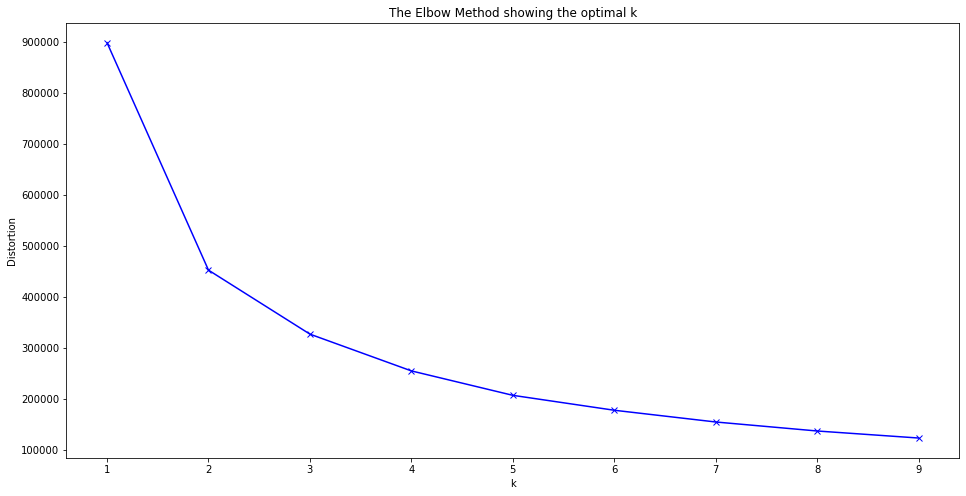

In [27]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(matrix_imputed_pca)
 
print(label)

[2 0 0 0 0 0 2 1 1 1 1 1 1 1 0 1 2 2 0 1 1 0 2 1 1 1 0 1 2 0 1 1 1 0 1 0 1
 2 1 0 1 1 1 1 2 1 1 1 2 0 1 2 0 1 2 2 0 1 0 1 0 0 1 0 1 2 2 1 2 2 1 2 1 0
 1 1 1 0 2 0 0 1 0 0 1 1 2 1 2 0 0 1 1 1 1 1 1 1 0 2 1 1 1 1 1 0 1 1 1 1 1
 1 2 2 1 1 1 2 1 1 1 1 0 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 0 1 2
 0 2 1 1 2 0 1 0 1 1 2 2 0 1 1 1 1 0 0 0 2 2 0 0 1 2 1 0 0 2 1 0 0 0 1 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 2 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 2
 0 0 0 0 0 0 1 2 1 1 1 1 0 0 1 2 1 1 1 1 1 2 2 1 0 0 1 1 1 0 1 0 0 1 1 1 1
 0 2 1 0 1 1 0 1 1 0 2 1 2 1 2 1 2 0 0 0 0 1 2 1 0 0 0 0 0 0 0 1 1 1 2 1 2
 0 1 1 2 1 1 0 1 1 0 0 0 0 2 2 1 2 1 0 2 0 1 1 1 1 2 1 2 0 1 1 0 0 2 1 2 1
 0 0 2 0 1 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 0 1 2 0 0 2 0 0 2 0 2 1 1 2 0 0 1
 1 1 0 1 1 1 0 1 2 1 2 1 0 2 0 0 0 1 1 0 1 0 1 2 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 2 2 1 0 0]


In [256]:
label=df_jx_concat['index_cluster'].values.tolist()

In [29]:
import matplotlib.pyplot as plt

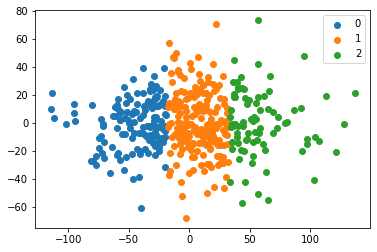

In [30]:
#visualization
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(matrix_imputed_pca[label == i , 0] , matrix_imputed_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [261]:
from collections import defaultdict
d = defaultdict(list)
for j in range(413):
    for i in range(3):
        if label[j] == i:
            d[i].append(index_matrix[:,1][j])

In [32]:
type(df1_pp_dic_imputed[2].loc[df1_pp_dic_imputed[2]['Time']=='Baseline'])

pandas.core.frame.DataFrame

In [262]:
sijia_df_2 = pd.DataFrame()
for number in d[2]:
    sijia_newdf_2 = df1_pp_dic_imputed[number].loc[df1_pp_dic_imputed[number]['Time']=='Baseline']
    sijia_df_2 = pd.concat([sijia_df_2, sijia_newdf_2])
    

In [263]:
sijia_df_2

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,peak_sbp
1,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
14,15,Baseline,120.0,70.0,139.333333,88.666667,83.5,86.666667,50.0,4,...,Yes,57.2,No,White,Hispanic,Yes,BMI > 30,30.0,No,157.0
32,33,Baseline,148.0,96.0,159.333333,87.000000,104.5,113.333333,52.0,3,...,No,35.4,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No,160.0
35,36,Baseline,116.0,72.0,138.333333,88.666667,99.0,86.666667,44.0,2,...,Yes,31.2,No,White,Non-Hispanic,Yes,BMI > 30,34.0,No,153.5
40,41,Baseline,168.0,75.0,149.000000,82.666667,70.0,106.000000,93.0,3,...,No,42.8,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,No,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,1005,Baseline,110.0,70.0,NaN,NaN,80.0,83.333333,40.0,4,...,Yes,33.9,No,White,Non-Hispanic,NaN,BMI > 30,28.0,No,146.0
972,1025,Baseline,134.0,82.0,NaN,NaN,80.0,99.333333,52.0,6,...,No,29.6,No,White,Non-Hispanic,NaN,BMI < 30,27.0,No,157.0
1008,1061,Baseline,129.0,74.0,NaN,NaN,89.0,92.333333,55.0,3,...,Yes,27.4,No,White,Non-Hispanic,NaN,BMI < 30,31.0,No,136.0
1198,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,27.9,No,White,Non-Hispanic,NaN,BMI < 30,33.0,No,160.5


In [264]:
jinx_df_2_dic = {}
for time in df1_pp_dic_imputed[number]['Time'].unique():
    jinx_df_2 = pd.DataFrame()
    for number in d[2]:
        jinx_newdf_2 = df1_pp_dic_imputed[number].loc[df1_pp_dic_imputed[number]['Time']==time]
        jinx_df_2 = pd.concat([jinx_df_2, jinx_newdf_2])
    jinx_df_2_dic[time] = jinx_df_2

In [247]:
df1_pp_dic_imputed[2]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,peak_sbp
1,2,Baseline,120.000000,78.000000,154.333333,84.333333,67.0,92.000000,42.000000,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
1237,2,T1,120.000000,80.000000,154.333333,84.333333,67.0,93.333333,40.000000,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
2473,2,T2,120.000000,70.000000,154.333333,84.333333,67.0,86.666667,50.000000,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
3709,2,T3,164.000000,108.000000,154.333333,84.333333,67.0,126.666667,56.000000,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
7417,2,PPday1,132.428571,69.000000,154.333333,84.333333,67.0,90.142857,63.428571,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
8653,2,PPday2,128.666667,74.777778,140.333333,90.666667,67.0,92.740741,53.888889,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
9889,2,PPday3,131.857143,81.142857,140.000000,90.666667,67.0,98.047619,50.714286,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
11125,2,PPday4,147.000000,107.000000,140.000000,90.666667,67.0,120.333333,40.000000,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
12361,2,PPday5,149.000000,99.000000,140.000000,90.666667,67.0,115.666667,50.000000,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0
13597,2,PPday6,121.000000,79.000000,140.000000,90.666667,67.0,93.000000,42.000000,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,149.0


In [265]:
series = []
for time in df1_pp_dic_imputed[number]['Time'].unique():
    series.append(jinx_df_2_dic[time]['sbp'].mean())

In [266]:
series


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


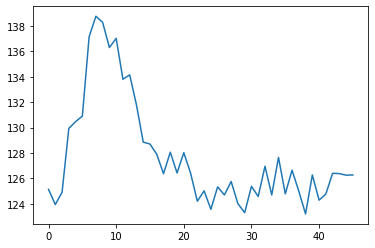

In [267]:
plt.plot(series)

In [268]:
jinx_df_1_dic = {}
for time in df1_pp_dic_imputed[number]['Time'].unique():
    jinx_df_1 = pd.DataFrame()
    for number in d[1]:
        jinx_newdf_1 = df1_pp_dic_imputed[number].loc[df1_pp_dic_imputed[number]['Time']==time]
        jinx_df_1 = pd.concat([jinx_df_1, jinx_newdf_1])
    jinx_df_1_dic[time] = jinx_df_1

In [269]:
series_1 = []
for time in df1_pp_dic_imputed[number]['Time'].unique():
    series_1.append(jinx_df_1_dic[time]['sbp'].mean())

In [78]:
jinx_df_1_dic['Baseline']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
15,16,Baseline,114.0,70.0,144.000000,100.333333,79.0,84.666667,44.0,4,...,No,No,23.0,No,White,Non-Hispanic,Yes,BMI < 30,35.0,No
16,17,Baseline,118.0,80.0,NaN,NaN,86.0,92.666667,38.0,3,...,No,No,36.2,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
18,19,Baseline,140.0,76.0,NaN,NaN,100.5,97.333333,64.0,2,...,No,Yes,35.4,No,White,Non-Hispanic,Yes,BMI > 30,26.0,No
19,20,Baseline,110.0,64.0,145.000000,82.333333,114.0,79.333333,46.0,2,...,No,Yes,22.5,No,White,Non-Hispanic,Yes,BMI < 30,31.0,No
22,23,Baseline,121.0,78.0,139.333333,80.333333,69.0,92.333333,43.0,3,...,No,No,27.4,No,White,Non-Hispanic,Yes,BMI < 30,33.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1216,Baseline,116.0,70.0,NaN,NaN,70.0,85.333333,46.0,4,...,No,Yes,31.6,No,White,Non-Hispanic,NaN,BMI > 30,33.0,No
1163,1229,Baseline,102.0,64.0,NaN,NaN,64.0,76.666667,38.0,2,...,No,Yes,28.7,No,White,Non-Hispanic,NaN,BMI < 30,33.0,No
1168,1234,Baseline,120.0,78.0,NaN,NaN,73.0,92.000000,42.0,2,...,No,Yes,20.5,No,White,Non-Hispanic,NaN,BMI < 30,32.0,No
1173,1239,Baseline,137.0,98.0,NaN,NaN,91.0,111.000000,39.0,1,...,No,Yes,38.4,No,NaN,NaN,NaN,BMI > 30,23.0,No


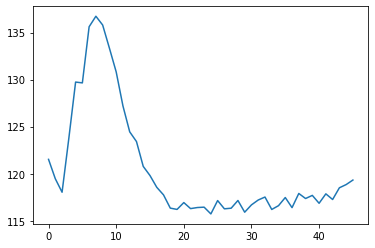

In [270]:
plt.plot(series_1)

In [271]:
jinx_df_0_dic = {}
for time in df1_pp_dic_imputed[number]['Time'].unique():
    jinx_df_0 = pd.DataFrame()
    for number in d[0]:
        jinx_newdf_0 = df1_pp_dic_imputed[number].loc[df1_pp_dic_imputed[number]['Time']==time]
        jinx_df_0 = pd.concat([jinx_df_0, jinx_newdf_0])
    jinx_df_0_dic[time] = jinx_df_0

In [272]:
series_0 = []
for time in df1_pp_dic_imputed[number]['Time'].unique():
    series_0.append(jinx_df_0_dic[time]['sbp'].mean())

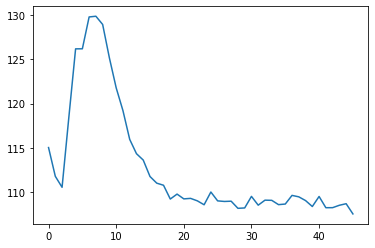

In [273]:
plt.plot(series_0)

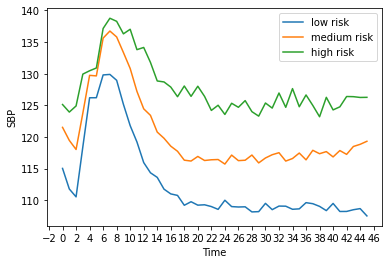

In [276]:
plt.plot(series_0)
plt.plot(series_1)
plt.plot(series)
plt.xlabel("Time")
plt.ylabel("SBP")
plt.locator_params(axis="x", nbins=45)
plt.legend(['low risk', 'medium risk', 'high risk'])

In [60]:
df1_pp_dic_imputed[2]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
1,2,Baseline,120.000000,78.000000,154.333333,84.333333,67.0,92.000000,42.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
1237,2,T1,120.000000,80.000000,154.333333,84.333333,67.0,93.333333,40.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
2473,2,T2,120.000000,70.000000,154.333333,84.333333,67.0,86.666667,50.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
3709,2,T3,164.000000,108.000000,154.333333,84.333333,67.0,126.666667,56.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
7417,2,PPday1,132.428571,69.000000,154.333333,84.333333,67.0,90.142857,63.428571,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
8653,2,PPday2,128.666667,74.777778,140.333333,90.666667,67.0,92.740741,53.888889,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
9889,2,PPday3,131.857143,81.142857,140.000000,90.666667,67.0,98.047619,50.714286,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
11125,2,PPday4,147.000000,107.000000,140.000000,90.666667,67.0,120.333333,40.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
12361,2,PPday5,149.000000,99.000000,140.000000,90.666667,67.0,115.666667,50.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
13597,2,PPday6,121.000000,79.000000,140.000000,90.666667,67.0,93.000000,42.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No


In [175]:
np.nanmean(sijia_df_0['bmi.prenatal'])

26.98029197080292

In [114]:
sijia_df_2['bmi.prenatal'].isna().sum()

2

In [115]:
sijia_df_2.loc[sijia_df_2['bmi.prenatal'].isna()]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
362,365,Baseline,122.0,86.0,143.0,83.000000,87.0,98.000000,36.0,2,...,No,Yes,NaN,No,White,Non-Hispanic,Yes,BMI < 30,NaN,NaN
367,370,Baseline,137.0,63.0,170.0,101.333333,82.0,87.666667,74.0,3,...,No,Yes,NaN,No,Black,Non-Hispanic,Yes,BMI < 30,NaN,NaN


In [116]:
sijia_df_2['bmi.prenatal']=sijia_df_2['bmi.prenatal'].fillna('30')

In [117]:
sijia_df_2['mom.age'].isna().sum()

2

In [118]:
sijia_df_2.loc[sijia_df_2['mom.age'].isna()]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
362,365,Baseline,122.0,86.0,143.0,83.000000,87.0,98.000000,36.0,2,...,No,Yes,30,No,White,Non-Hispanic,Yes,BMI < 30,NaN,NaN
367,370,Baseline,137.0,63.0,170.0,101.333333,82.0,87.666667,74.0,3,...,No,Yes,30,No,Black,Non-Hispanic,Yes,BMI < 30,NaN,NaN


In [119]:
np.nanmean(sijia_df_2['mom.age'])

32.22784810126582

In [120]:
sijia_df_2['mom.age']=sijia_df_2['mom.age'].fillna('32')

In [95]:
(sijia_df_2['gestHTN']=='Yes').sum()/((sijia_df_2['gestHTN']=='Yes').sum()+(sijia_df_2['gestHTN']=='No').sum())

0.43209876543209874

In [96]:
(sijia_df_2['chronicHTN']=='Yes').sum()/((sijia_df_2['chronicHTN']=='Yes').sum()+(sijia_df_2['chronicHTN']=='No').sum())

0.35802469135802467

In [121]:
sijia_df_0 = pd.DataFrame()
for number in d[0]:
    sijia_newdf_0 = df1_pp_dic_imputed[number].loc[df1_pp_dic_imputed[number]['Time']=='Baseline']
    sijia_df_0 = pd.concat([sijia_df_0, sijia_newdf_0])
    

In [122]:
sijia_df_0['bmi.prenatal'].isna().sum()

1

In [123]:
sijia_df_0.loc[sijia_df_0['bmi.prenatal'].isna()]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
177,178,Baseline,115.0,70.0,136.666667,87.0,90.0,85.0,45.0,2,...,No,No,NaN,No,White,Non-Hispanic,Yes,BMI > 30,21.0,No


In [124]:
sijia_df_0['bmi.prenatal']=sijia_df_0['bmi.prenatal'].fillna('30')

In [125]:
sijia_df_0['mom.age'].isna().sum()

0

In [126]:
np.nanmean(sijia_df_0['mom.age'])

30.883211678832115

In [149]:
(sijia_df_0['gestHTN']=='Yes').sum()/((sijia_df_0['gestHTN']=='Yes').sum()+(sijia_df_0['gestHTN']=='No').sum())

0.5092592592592593

In [152]:
(sijia_df_0['chronicHTN']=='Yes').sum()/((sijia_df_0['chronicHTN']=='Yes').sum()+(sijia_df_0['chronicHTN']=='No').sum())

0.1574074074074074

In [127]:
sijia_df_1 = pd.DataFrame()
for number in d[1]:
    sijia_newdf_1 = df1_pp_dic_imputed[number].loc[df1_pp_dic_imputed[number]['Time']=='Baseline']
    sijia_df_1 = pd.concat([sijia_df_1, sijia_newdf_1])
    

In [128]:
sijia_df_1['bmi.prenatal'].isna().sum()

2

In [129]:
sijia_df_1.loc[sijia_df_1['bmi.prenatal'].isna()]

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
525,531,Baseline,114.0,80.0,153.333333,102.0,92.5,91.333333,34.0,3,...,No,No,NaN,No,White,Non-Hispanic,Yes,BMI < 30,NaN,NaN
977,1030,Baseline,132.0,70.0,NaN,NaN,62.0,90.666667,62.0,2,...,Yes,No,NaN,No,NaN,NaN,NaN,BMI > 30,34.0,No


In [130]:
sijia_df_1['bmi.prenatal']=sijia_df_1['bmi.prenatal'].fillna('30')

In [131]:
sijia_df_1['mom.age'].isna().sum()

1

In [132]:
np.nanmean(sijia_df_1['mom.age'])

31.427835051546392

In [133]:
sijia_df_1['mom.age']=sijia_df_1['mom.age'].fillna('31')

In [148]:
(sijia_df_1['gestHTN']=='Yes').sum()/((sijia_df_1['gestHTN']=='Yes').sum()+(sijia_df_1['gestHTN']=='No').sum())

0.4

In [153]:
(sijia_df_1['chronicHTN']=='Yes').sum()/((sijia_df_1['chronicHTN']=='Yes').sum()+(sijia_df_1['chronicHTN']=='No').sum())

0.44

In [156]:
(sijia_df_0['gestHTN']=='Yes').sum()

65

In [166]:
(sijia_df_0['chronicHTN']=='Yes').sum()

10

In [157]:
sijia_df_0

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
2,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,Yes,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes
5,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,No,Yes,36.2,No,White,Non-Hispanic,Yes,BMI > 30,36.0,No
6,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,No,31.4,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No
7,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,No,Yes,23.7,No,White,Non-Hispanic,Yes,BMI < 30,32.0,No
9,10,Baseline,112.0,70.0,136.666667,87.000000,76.5,84.000000,42.0,4,...,No,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No
26,27,Baseline,118.0,80.0,130.000000,84.000000,92.0,92.666667,38.0,2,...,No,No,30.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No
36,37,Baseline,108.0,76.0,149.666667,101.666667,78.0,86.666667,32.0,4,...,No,No,48.1,No,White,Non-Hispanic,Yes,BMI > 30,29.0,No
39,40,Baseline,126.0,88.0,126.666667,84.000000,61.0,100.666667,38.0,3,...,No,Yes,34.1,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No
45,46,Baseline,130.0,83.0,145.333333,85.666667,68.5,98.666667,47.0,2,...,No,No,20.2,No,White,Non-Hispanic,Yes,BMI < 30,36.0,No
52,53,Baseline,107.0,71.0,142.666667,86.000000,69.5,83.000000,36.0,4,...,No,No,34.2,No,White,Non-Hispanic,Yes,BMI > 30,38.0,No


In [176]:
sijia_df_0['index_cluster'] = 0

In [177]:
sijia_df_0

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,index_cluster
2,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,0
5,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,Yes,36.2,No,White,Non-Hispanic,Yes,BMI > 30,36.0,No,0
6,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,31.4,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No,0
7,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,Yes,23.7,No,White,Non-Hispanic,Yes,BMI < 30,32.0,No,0
9,10,Baseline,112.0,70.0,136.666667,87.000000,76.5,84.000000,42.0,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,0
26,27,Baseline,118.0,80.0,130.000000,84.000000,92.0,92.666667,38.0,2,...,No,30.1,No,White,Non-Hispanic,Yes,BMI > 30,30.0,No,0
36,37,Baseline,108.0,76.0,149.666667,101.666667,78.0,86.666667,32.0,4,...,No,48.1,No,White,Non-Hispanic,Yes,BMI > 30,29.0,No,0
39,40,Baseline,126.0,88.0,126.666667,84.000000,61.0,100.666667,38.0,3,...,Yes,34.1,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,0
45,46,Baseline,130.0,83.0,145.333333,85.666667,68.5,98.666667,47.0,2,...,No,20.2,No,White,Non-Hispanic,Yes,BMI < 30,36.0,No,0
52,53,Baseline,107.0,71.0,142.666667,86.000000,69.5,83.000000,36.0,4,...,No,34.2,No,White,Non-Hispanic,Yes,BMI > 30,38.0,No,0


In [167]:
(sijia_df_1['chronicHTN']=='Yes').sum()

36

In [158]:
(sijia_df_1['gestHTN']=='Yes').sum()

90

In [159]:
sijia_df_1

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
15,16,Baseline,114.000000,70.0,144.000000,100.333333,79.0,84.666667,44.000000,4,...,No,No,23.0,No,White,Non-Hispanic,Yes,BMI < 30,35,No
16,17,Baseline,118.000000,80.0,NaN,NaN,86.0,92.666667,38.000000,3,...,No,No,36.2,No,White,Non-Hispanic,Yes,BMI > 30,28,No
18,19,Baseline,140.000000,76.0,NaN,NaN,100.5,97.333333,64.000000,2,...,No,Yes,35.4,No,White,Non-Hispanic,Yes,BMI > 30,26,No
19,20,Baseline,110.000000,64.0,145.000000,82.333333,114.0,79.333333,46.000000,2,...,No,Yes,22.5,No,White,Non-Hispanic,Yes,BMI < 30,31,No
22,23,Baseline,121.000000,78.0,139.333333,80.333333,69.0,92.333333,43.000000,3,...,No,No,27.4,No,White,Non-Hispanic,Yes,BMI < 30,33,No
23,24,Baseline,122.000000,60.0,145.666667,90.000000,87.0,80.666667,62.000000,4,...,No,Yes,35.3,No,White,Non-Hispanic,Yes,BMI > 30,34,No
24,25,Baseline,120.000000,68.0,153.333333,101.666667,101.0,85.333333,52.000000,4,...,No,No,39.7,No,White,Hispanic,Yes,BMI > 30,20,No
27,28,Baseline,134.000000,90.0,161.000000,97.333333,63.0,104.666667,44.000000,2,...,No,No,25.0,No,White,Non-Hispanic,No,BMI < 30,33,No
37,38,Baseline,128.000000,76.0,147.333333,105.333333,67.0,93.333333,52.000000,4,...,No,No,27.3,No,White,Non-Hispanic,Yes,BMI < 30,32,No
38,39,Baseline,118.000000,72.0,164.333333,100.000000,76.0,87.333333,46.000000,3,...,No,No,31.0,No,White,Non-Hispanic,Yes,BMI > 30,33,No


In [178]:
sijia_df_1['index_cluster'] = 1

In [179]:
sijia_df_2['index_cluster'] = 2

In [160]:
(sijia_df_2['gestHTN']=='Yes').sum()

35

In [168]:
(sijia_df_2['chronicHTN']=='Yes').sum()

29

In [161]:
sijia_df_2

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
1,2,Baseline,120.000000,78.000000,154.333333,84.333333,67.0,92.000000,42.000000,3,...,No,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28,No
14,15,Baseline,120.000000,70.000000,139.333333,88.666667,83.5,86.666667,50.000000,4,...,No,Yes,57.2,No,White,Hispanic,Yes,BMI > 30,30,No
32,33,Baseline,148.000000,96.000000,159.333333,87.000000,104.5,113.333333,52.000000,3,...,No,No,35.4,No,White,Non-Hispanic,Yes,BMI > 30,33,No
35,36,Baseline,116.000000,72.000000,138.333333,88.666667,99.0,86.666667,44.000000,2,...,No,Yes,31.2,No,White,Non-Hispanic,Yes,BMI > 30,34,No
40,41,Baseline,168.000000,75.000000,149.000000,82.666667,70.0,106.000000,93.000000,3,...,Yes,No,42.8,Yes,White,Non-Hispanic,Yes,BMI > 30,38,No
50,51,Baseline,118.000000,70.000000,161.000000,95.333333,59.0,86.000000,48.000000,4,...,Yes,No,42.2,No,White,Non-Hispanic,Yes,BMI > 30,26,No
66,67,Baseline,136.000000,78.000000,140.333333,93.000000,91.0,97.333333,58.000000,4,...,No,Yes,47.8,No,White,Non-Hispanic,Yes,BMI > 30,41,No
78,79,Baseline,128.000000,80.000000,NaN,NaN,103.0,96.000000,48.000000,3,...,Yes,No,36.3,No,White,Non-Hispanic,Yes,BMI > 30,27,No
96,97,Baseline,131.000000,82.000000,NaN,NaN,75.0,98.333333,49.000000,5,...,Yes,No,39.7,Yes,White,Non-Hispanic,No,BMI > 30,42,No
103,104,Baseline,120.000000,78.000000,135.000000,78.666667,70.0,92.000000,42.000000,3,...,Yes,No,29.7,No,White,Non-Hispanic,Yes,BMI < 30,20,No


In [159]:
max_sbp_0 = []
for i in d[0]:    
    max_sbp_0.append(df1_pp_dic_imputed[i]['sbp'].max())

In [163]:
np.mean(max_sbp_0)

151.42983994143717

In [161]:
max_sbp_1 = []
for i in d[1]:    
    max_sbp_1.append(df1_pp_dic_imputed[i]['sbp'].max())

In [164]:
np.mean(max_sbp_1)

155.05354285714284

In [165]:
max_sbp_2 = []
for i in d[2]:    
    max_sbp_2.append(df1_pp_dic_imputed[i]['sbp'].max())

In [166]:
np.mean(max_sbp_2)

138.02524991246497

array([[<AxesSubplot:title={'center':'mom.age'}>]], dtype=object)

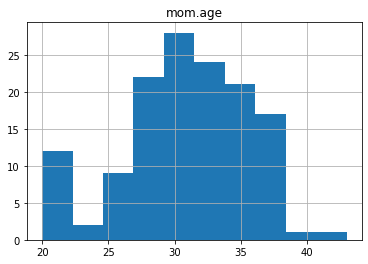

In [100]:
sijia_df_0.hist(column='mom.age')

In [109]:
pd.set_option('display.max_rows', sijia_df_1.shape[0]+1)
sijia_df_1['mom.age']

15      35.0
16      28.0
18      26.0
19      31.0
22      33.0
23      34.0
24      20.0
27      33.0
37      32.0
38      33.0
41      38.0
43      33.0
44      40.0
46      31.0
53      38.0
54      29.0
55      37.0
60      26.0
63      32.0
68      29.0
72      36.0
73      38.0
76      28.0
77      29.0
87      33.0
92      20.0
93      31.0
101     32.0
106     20.0
123     30.0
127     35.0
140     35.0
144     32.0
152     37.0
157     21.0
167     30.0
169     23.0
171     29.0
173     21.0
178     32.0
182     33.0
183     32.0
186     42.0
194     21.0
197     21.0
199     30.0
200     35.0
203     24.0
204     47.0
205     34.0
209     32.0
211     33.0
213     34.0
215     39.0
221     37.0
236     28.0
242     31.0
246     25.0
248     34.0
249     26.0
254     38.0
271     27.0
275     33.0
277     24.0
283     32.0
284     40.0
285     35.0
287     28.0
294     30.0
301     33.0
302     28.0
304     31.0
311     35.0
318     38.0
322     28.0
324     35.0
325     41.0

In [135]:
sijia_df_1

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,chronicHTN,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest
15,16,Baseline,114.000000,70.0,144.000000,100.333333,79.0,84.666667,44.000000,4,...,No,No,23.0,No,White,Non-Hispanic,Yes,BMI < 30,35.0,No
16,17,Baseline,118.000000,80.0,NaN,NaN,86.0,92.666667,38.000000,3,...,No,No,36.2,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No
18,19,Baseline,140.000000,76.0,NaN,NaN,100.5,97.333333,64.000000,2,...,No,Yes,35.4,No,White,Non-Hispanic,Yes,BMI > 30,26.0,No
19,20,Baseline,110.000000,64.0,145.000000,82.333333,114.0,79.333333,46.000000,2,...,No,Yes,22.5,No,White,Non-Hispanic,Yes,BMI < 30,31.0,No
22,23,Baseline,121.000000,78.0,139.333333,80.333333,69.0,92.333333,43.000000,3,...,No,No,27.4,No,White,Non-Hispanic,Yes,BMI < 30,33.0,No
23,24,Baseline,122.000000,60.0,145.666667,90.000000,87.0,80.666667,62.000000,4,...,No,Yes,35.3,No,White,Non-Hispanic,Yes,BMI > 30,34.0,No
24,25,Baseline,120.000000,68.0,153.333333,101.666667,101.0,85.333333,52.000000,4,...,No,No,39.7,No,White,Hispanic,Yes,BMI > 30,20.0,No
27,28,Baseline,134.000000,90.0,161.000000,97.333333,63.0,104.666667,44.000000,2,...,No,No,25.0,No,White,Non-Hispanic,No,BMI < 30,33.0,No
37,38,Baseline,128.000000,76.0,147.333333,105.333333,67.0,93.333333,52.000000,4,...,No,No,27.3,No,White,Non-Hispanic,Yes,BMI < 30,32.0,No
38,39,Baseline,118.000000,72.0,164.333333,100.000000,76.0,87.333333,46.000000,3,...,No,No,31.0,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No


In [140]:
sijia_df_1['mom.age'].dtypes

dtype('O')

In [141]:
sijia_df_1['mom.age']=sijia_df_1['mom.age'].astype(int)

array([[<AxesSubplot:title={'center':'mom.age'}>]], dtype=object)

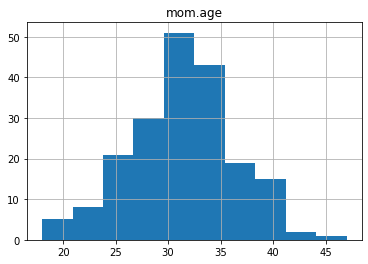

In [142]:
sijia_df_1.hist(column='mom.age')

array([[<AxesSubplot:title={'center':'mom.age'}>]], dtype=object)

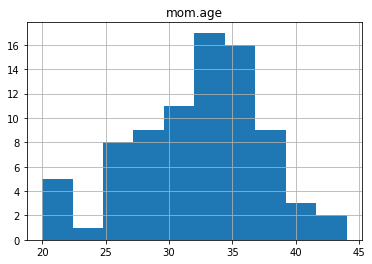

In [144]:
sijia_df_2['mom.age']=sijia_df_2['mom.age'].astype(int)
sijia_df_2.hist(column='mom.age')

array([[<AxesSubplot:title={'center':'bmi.prenatal'}>]], dtype=object)

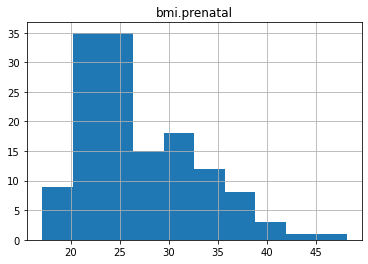

In [146]:
sijia_df_0['bmi.prenatal']=sijia_df_0['bmi.prenatal'].astype(float)
sijia_df_0.hist(column='bmi.prenatal')

array([[<AxesSubplot:title={'center':'bmi.prenatal'}>]], dtype=object)

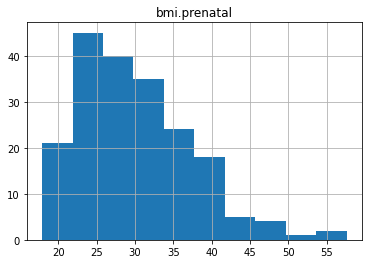

In [147]:
sijia_df_1['bmi.prenatal']=sijia_df_1['bmi.prenatal'].astype(float)
sijia_df_1.hist(column='bmi.prenatal')

array([[<AxesSubplot:title={'center':'bmi.prenatal'}>]], dtype=object)

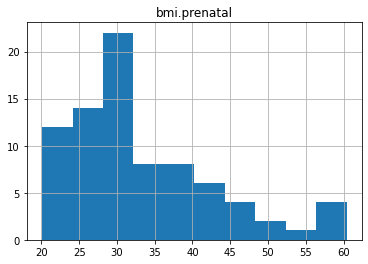

In [148]:
sijia_df_2['bmi.prenatal']=sijia_df_2['bmi.prenatal'].astype(float)
sijia_df_2.hist(column='bmi.prenatal')

In [149]:
from scipy.stats import ttest_ind
ttest_ind(sijia_df_0['mom.age'].astype(float, errors = 'raise'), sijia_df_1['mom.age'].astype(float, errors = 'raise'))

Ttest_indResult(statistic=-0.9773210845583328, pvalue=0.3291261159255078)

In [150]:
from scipy.stats import ttest_ind
ttest_ind(sijia_df_0['mom.age'].astype(float, errors = 'raise'), sijia_df_2['mom.age'].astype(float, errors = 'raise'))

Ttest_indResult(statistic=-1.9315173548832425, pvalue=0.05472758919246532)

In [151]:
from scipy.stats import ttest_ind
ttest_ind(sijia_df_1['mom.age'].astype(float, errors = 'raise'), sijia_df_2['mom.age'].astype(float, errors = 'raise'))

Ttest_indResult(statistic=-1.1892079945380072, pvalue=0.23538737036372348)

In [152]:
from scipy.stats import ttest_ind
ttest_ind(sijia_df_0['bmi.prenatal'].astype(float, errors = 'raise'), sijia_df_1['bmi.prenatal'].astype(float, errors = 'raise'))

Ttest_indResult(statistic=-4.122870810720031, pvalue=4.738971146230082e-05)

In [153]:
from scipy.stats import ttest_ind
ttest_ind(sijia_df_0['bmi.prenatal'].astype(float, errors = 'raise'), sijia_df_2['bmi.prenatal'].astype(float, errors = 'raise'))

Ttest_indResult(statistic=-6.122096643695426, pvalue=4.300742110509968e-09)

In [154]:
from scipy.stats import ttest_ind
ttest_ind(sijia_df_1['bmi.prenatal'].astype(float, errors = 'raise'), sijia_df_2['bmi.prenatal'].astype(float, errors = 'raise'))

Ttest_indResult(statistic=-3.0266777894813246, pvalue=0.002707805126027663)

In [162]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np


# note - the samples do not need to be the same size
sample_success_0, sample_size_0 = (65, 137)
sample_success_1, sample_size_1 = (90, 195)
sample_success_2, sample_size_2 = (35, 81)


In [163]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_1])
samples = np.array([sample_size_0, sample_size_1])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.232, p_value: 0.816


In [164]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_2])
samples = np.array([sample_size_0, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.606, p_value: 0.544


In [165]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_1, sample_success_2])
samples = np.array([sample_size_1, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.447, p_value: 0.655


In [169]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np


# note - the samples do not need to be the same size
sample_success_0, sample_size_0 = (10, 137)
sample_success_1, sample_size_1 = (36, 195)
sample_success_2, sample_size_2 = (29, 81)

In [170]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_1])
samples = np.array([sample_size_0, sample_size_1])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -2.898, p_value: 0.004


In [171]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_2])
samples = np.array([sample_size_0, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -5.306, p_value: 0.000


In [172]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_1, sample_success_2])
samples = np.array([sample_size_1, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -3.092, p_value: 0.002


In [180]:
concatenated = pd.concat([sijia_df_0, sijia_df_1])

In [181]:
jx_concatenated = pd.concat([concatenated, sijia_df_2])

In [182]:
jx_concatenated

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,index_cluster
2,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,0
5,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,Yes,36.2,No,White,Non-Hispanic,Yes,BMI > 30,36.0,No,0
6,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,31.4,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No,0
7,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,Yes,23.7,No,White,Non-Hispanic,Yes,BMI < 30,32.0,No,0
9,10,Baseline,112.0,70.0,136.666667,87.000000,76.5,84.000000,42.0,4,...,No,33.2,No,White,Non-Hispanic,Yes,BMI > 30,32.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,1005,Baseline,110.0,70.0,NaN,NaN,80.0,83.333333,40.0,4,...,Yes,33.9,No,White,Non-Hispanic,NaN,BMI > 30,28.0,No,2
972,1025,Baseline,134.0,82.0,NaN,NaN,80.0,99.333333,52.0,6,...,No,29.6,No,White,Non-Hispanic,NaN,BMI < 30,27.0,No,2
1008,1061,Baseline,129.0,74.0,NaN,NaN,89.0,92.333333,55.0,3,...,Yes,27.4,No,White,Non-Hispanic,NaN,BMI < 30,31.0,No,2
1198,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,27.9,No,White,Non-Hispanic,NaN,BMI < 30,33.0,No,2


In [183]:
jx_concatenated.sort_values(by=['id'])

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,index_cluster
1,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,2
2,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,0
5,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,Yes,36.2,No,White,Non-Hispanic,Yes,BMI > 30,36.0,No,0
6,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,31.4,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No,0
7,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,Yes,23.7,No,White,Non-Hispanic,Yes,BMI < 30,32.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,27.9,No,White,Non-Hispanic,NaN,BMI < 30,33.0,No,2
1199,1265,Baseline,124.0,90.0,NaN,NaN,89.5,101.333333,34.0,3,...,No,49.8,No,NaN,NaN,NaN,BMI > 30,28.0,No,2
1210,1276,Baseline,110.0,70.0,NaN,NaN,86.0,83.333333,40.0,2,...,Yes,32.9,No,White,Non-Hispanic,NaN,BMI > 30,24.0,No,1
1212,1278,Baseline,112.0,74.0,NaN,NaN,51.0,86.666667,38.0,3,...,No,25.0,No,White,Non-Hispanic,NaN,BMI < 30,20.0,No,0


In [184]:
jx_concatenated.to_csv(r'/Users/michaelscofiled/Documents/python notebook projects\jx_concat.csv', index = False)

In [4]:
pd.read_csv('python notebook projects\jx_concat.csv')

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP,...,gestHTN,bmi.prenatal,sipe,race,ethnicity,feeding.br,obesity.prenatal,mom.age,DM.pregest,index_cluster
0,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,3,...,Yes,42.9,No,White,Non-Hispanic,Yes,BMI > 30,28.0,No,2
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,43.6,Yes,White,Non-Hispanic,Yes,BMI > 30,38.0,Yes,0
2,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,Yes,36.2,No,White,Non-Hispanic,Yes,BMI > 30,36.0,No,0
3,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,31.4,No,White,Non-Hispanic,Yes,BMI > 30,33.0,No,0
4,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,Yes,23.7,No,White,Non-Hispanic,Yes,BMI < 30,32.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,27.9,No,White,Non-Hispanic,NaN,BMI < 30,33.0,No,2
409,1265,Baseline,124.0,90.0,NaN,NaN,89.5,101.333333,34.0,3,...,No,49.8,No,NaN,NaN,NaN,BMI > 30,28.0,No,2
410,1276,Baseline,110.0,70.0,NaN,NaN,86.0,83.333333,40.0,2,...,Yes,32.9,No,White,Non-Hispanic,NaN,BMI > 30,24.0,No,1
411,1278,Baseline,112.0,74.0,NaN,NaN,51.0,86.666667,38.0,3,...,No,25.0,No,White,Non-Hispanic,NaN,BMI < 30,20.0,No,0


In [61]:
df_jx_concat = pd.read_csv('python notebook projects\jx_concat.csv')

In [62]:
df3 = pd.read_excel(PP, 'Demographics')

In [63]:
df_merge_tree = df_jx_concat.merge(df3, how='left', on='id')

In [64]:
df_merge_tree

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
0,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,3,...,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,No,No,No,No,No,No,No,No,No,Yes
3,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,No,No,No,No,No,No,No,No,Yes
4,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,No,No,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,No,No,No,No,No,No,No,No,Yes
409,1265,Baseline,124.0,90.0,NaN,NaN,89.5,101.333333,34.0,3,...,No,NaN,Yes,No,Yes,Yes,Yes,NaN,No,Yes
410,1276,Baseline,110.0,70.0,NaN,NaN,86.0,83.333333,40.0,2,...,No,No,No,No,No,No,No,No,No,Yes
411,1278,Baseline,112.0,74.0,NaN,NaN,51.0,86.666667,38.0,3,...,No,No,No,NaN,No,No,No,No,No,Yes


In [13]:
for col in df_merge_tree.columns:
    print(col)

id
Time
sbp
dbp
max3.sbp
max3.dbp
hr
map
ppress
dcDayPP_x
bpmed
mode.del_x
chronicHTN_x
gestHTN_x
bmi.prenatal_x
sipe_x
race_x
ethnicity_x
feeding.br_x
obesity.prenatal_x
mom.age_x
DM.pregest_x
index_cluster
mom.age_y
married
race_y
ethnicity_y
gravidity
parity
insurance
bmi.prenatal_y
obesity.prenatal_y
tobacco
DM.pregest_y
DM.gest
multichild.preg
mom.trans
mode.deliv
gest.age
deliv.admit.date
dc.date
birth.date
feeding.dc
gestHTN_y
chronicHTN_y
pree
sipe_y
pree.w.sf
eclampsia
hellp
obese
preterm
mode.del3
mode.del_y
feeding.br_y
dcDayPP_y
HTNtype
HTNtype.4
over140.90
over130.80
PPdaysNum
bpmed.base
bpmed.T1
bpmed.T2
bpmed.T3
bpmed.dc
bpmed.D2
bpmed.D7
bpmed.D14
bpmed.D30
bpmed.D42
PreAdmit
InDay30


In [14]:
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['sipe_x']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
122,293,Baseline,132.0,82.0,168.666667,103.666667,81.0,98.666667,50.0,3,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [16]:
df_merge_tree.loc[df_merge_tree['index_cluster']==1].loc[df_merge_tree['sipe_x']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
32,56,Baseline,128.0,84.0,133.666667,91.333333,84.0,98.666667,44.0,5,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes
42,77,Baseline,134.0,90.0,163.666667,96.666667,81.0,104.666667,44.0,4,...,No,No,Yes,No,Yes,Yes,Yes,NaN,No,Yes
81,179,Baseline,114.0,66.0,138.666667,95.666667,82.0,82.000000,48.0,4,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
85,184,Baseline,136.0,88.0,NaN,NaN,82.0,104.000000,48.0,4,...,No,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes
97,206,Baseline,124.0,78.0,133.333333,86.333333,86.0,93.333333,46.0,4,...,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
101,212,Baseline,138.0,82.0,158.000000,104.666667,100.0,100.666667,56.0,3,...,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes
103,216,Baseline,134.0,80.0,136.666667,91.000000,102.0,98.000000,54.0,2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
110,250,Baseline,126.0,86.0,152.333333,91.000000,98.0,99.333333,40.0,4,...,No,No,Yes,No,NaN,Yes,Yes,Yes,No,Yes
139,344,Baseline,130.0,81.0,159.000000,92.000000,60.5,97.333333,49.0,4,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
208,519,Baseline,134.0,86.0,128.000000,76.666667,82.0,102.000000,48.0,4,...,No,No,No,No,No,No,No,NaN,No,Yes


In [17]:
df_merge_tree.loc[df_merge_tree['index_cluster']==2].loc[df_merge_tree['sipe_x']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
22,41,Baseline,168.0,75.0,149.000000,82.666667,70.0,106.000000,93.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
48,97,Baseline,131.0,82.0,NaN,NaN,75.0,98.333333,49.0,5,...,No,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes
55,118,Baseline,114.0,84.0,154.333333,97.333333,70.0,94.000000,30.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
71,161,Baseline,124.0,76.0,137.666667,84.000000,86.0,92.000000,48.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
86,185,Baseline,100.0,70.0,166.666667,106.666667,NaN,80.000000,30.0,5,...,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
112,258,Baseline,129.0,87.0,142.000000,82.666667,79.0,101.000000,42.0,6,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
117,284,Baseline,126.0,80.0,174.666667,83.000000,80.5,95.333333,46.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
128,312,Baseline,130.0,78.0,143.333333,73.333333,96.0,95.333333,52.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes
147,360,Baseline,122.0,78.0,139.000000,88.000000,76.5,92.666667,44.0,4,...,No,No,Yes,No,NaN,Yes,Yes,Yes,No,Yes


In [19]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np


# note - the samples do not need to be the same size
sample_success_0, sample_size_0 = (2, 137)
sample_success_1, sample_size_1 = (15, 195)
sample_success_2, sample_size_2 = (9, 81)

In [20]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_1])
samples = np.array([sample_size_0, sample_size_1])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -2.536, p_value: 0.011


In [21]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_2])
samples = np.array([sample_size_0, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -3.146, p_value: 0.002


In [22]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_1, sample_success_2])
samples = np.array([sample_size_1, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -0.918, p_value: 0.359


In [23]:
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['pree']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
3,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,No,No,No,No,No,No,No,No,Yes
5,10,Baseline,112.0,70.0,136.666667,87.000000,76.5,84.000000,42.0,4,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes
14,27,Baseline,118.0,80.0,130.000000,84.000000,92.0,92.666667,38.0,2,...,No,No,No,No,No,No,No,No,No,Yes
18,37,Baseline,108.0,76.0,149.666667,101.666667,78.0,86.666667,32.0,4,...,No,No,Yes,No,Yes,Yes,No,NaN,No,Yes
26,46,Baseline,130.0,83.0,145.333333,85.666667,68.5,98.666667,47.0,2,...,No,No,No,No,Yes,Yes,No,No,No,Yes
29,53,Baseline,107.0,71.0,142.666667,86.000000,69.5,83.000000,36.0,4,...,No,No,No,No,No,No,No,NaN,No,Yes
39,72,Baseline,110.0,70.0,161.333333,86.666667,88.0,83.333333,40.0,3,...,No,No,Yes,No,No,No,No,NaN,No,Yes
61,137,Baseline,106.0,70.0,153.333333,94.333333,92.0,82.000000,36.0,2,...,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes
63,143,Baseline,122.0,74.0,140.666667,88.333333,82.0,90.000000,48.0,2,...,No,No,No,No,No,No,No,No,No,Yes


In [26]:
df_merge_tree.loc[df_merge_tree['index_cluster']==1].loc[df_merge_tree['pree']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
7,16,Baseline,114.0,70.0,144.000000,100.333333,79.0,84.666667,44.0,4,...,No,No,No,No,No,Yes,Yes,Yes,No,Yes
8,17,Baseline,118.0,80.0,NaN,NaN,86.0,92.666667,38.0,3,...,No,No,No,NaN,Yes,Yes,Yes,Yes,No,Yes
11,23,Baseline,121.0,78.0,139.333333,80.333333,69.0,92.333333,43.0,3,...,No,No,No,No,Yes,Yes,No,No,No,Yes
13,25,Baseline,120.0,68.0,153.333333,101.666667,101.0,85.333333,52.0,4,...,No,No,No,No,No,No,No,No,No,Yes
15,28,Baseline,134.0,90.0,161.000000,97.333333,63.0,104.666667,44.0,2,...,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,604,Baseline,104.0,66.0,139.000000,85.000000,80.0,78.666667,38.0,3,...,No,No,No,No,No,Yes,Yes,NaN,No,Yes
233,607,Baseline,110.0,74.0,141.000000,81.000000,59.0,86.000000,36.0,2,...,No,No,No,No,Yes,Yes,Yes,NaN,No,Yes
236,613,Baseline,102.0,68.0,149.000000,73.000000,108.0,79.333333,34.0,5,...,No,No,No,No,No,No,No,NaN,No,Yes
377,985,Baseline,133.0,76.0,NaN,NaN,91.0,95.000000,57.0,4,...,No,No,Yes,NaN,Yes,Yes,Yes,NaN,No,Yes


In [28]:
df_merge_tree.loc[df_merge_tree['index_cluster']==2].loc[df_merge_tree['pree']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
16,33,Baseline,148.0,96.0,159.333333,87.000000,104.5,113.333333,52.0,3,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes
22,41,Baseline,168.0,75.0,149.000000,82.666667,70.0,106.000000,93.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
48,97,Baseline,131.0,82.0,NaN,NaN,75.0,98.333333,49.0,5,...,No,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes
54,112,Baseline,106.0,80.0,148.000000,86.000000,96.0,88.666667,26.0,2,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
55,118,Baseline,114.0,84.0,154.333333,97.333333,70.0,94.000000,30.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
69,156,Baseline,105.0,54.0,150.666667,96.666667,88.0,71.000000,51.0,4,...,No,No,Yes,No,Yes,No,No,No,No,Yes
71,161,Baseline,124.0,76.0,137.666667,84.000000,86.0,92.000000,48.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
86,185,Baseline,100.0,70.0,166.666667,106.666667,NaN,80.000000,30.0,5,...,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
88,191,Baseline,128.0,74.0,151.666667,90.666667,79.0,92.000000,54.0,4,...,No,NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes
99,209,Baseline,132.0,72.0,153.333333,66.666667,69.5,92.000000,60.0,3,...,No,No,No,No,No,No,No,No,No,Yes


In [29]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np


# note - the samples do not need to be the same size
sample_success_0, sample_size_0 = (53, 137)
sample_success_1, sample_size_1 = (74, 195)
sample_success_2, sample_size_2 = (22, 81)

In [30]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_1])
samples = np.array([sample_size_0, sample_size_1])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.136, p_value: 0.892


In [31]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_2])
samples = np.array([sample_size_0, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 1.731, p_value: 0.083


In [32]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_1, sample_success_2])
samples = np.array([sample_size_1, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 1.714, p_value: 0.087


In [33]:
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['pree.w.sf']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
5,10,Baseline,112.0,70.0,136.666667,87.000000,76.5,84.000000,42.0,4,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes
18,37,Baseline,108.0,76.0,149.666667,101.666667,78.0,86.666667,32.0,4,...,No,No,Yes,No,Yes,Yes,No,NaN,No,Yes
39,72,Baseline,110.0,70.0,161.333333,86.666667,88.0,83.333333,40.0,3,...,No,No,Yes,No,No,No,No,NaN,No,Yes
61,137,Baseline,106.0,70.0,153.333333,94.333333,92.0,82.000000,36.0,2,...,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes
73,169,Baseline,93.0,51.0,138.000000,84.000000,92.0,65.000000,42.0,5,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
83,182,Baseline,110.0,72.0,169.333333,105.000000,81.0,84.666667,38.0,2,...,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes
90,193,Baseline,128.0,62.0,138.000000,102.000000,84.5,84.000000,66.0,5,...,NaN,No,Yes,No,No,No,No,No,Yes,Yes
105,229,Baseline,102.0,68.0,165.000000,97.000000,80.0,79.333333,34.0,6,...,No,NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes
122,293,Baseline,132.0,82.0,168.666667,103.666667,81.0,98.666667,50.0,3,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [34]:
df_merge_tree.loc[df_merge_tree['index_cluster']==1].loc[df_merge_tree['pree.w.sf']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
19,38,Baseline,128.000000,76.0,147.333333,105.333333,67.0,93.333333,52.000000,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
20,39,Baseline,118.000000,72.0,164.333333,100.000000,76.0,87.333333,46.000000,3,...,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes
25,45,Baseline,106.000000,78.0,136.666667,86.333333,81.5,87.333333,28.000000,5,...,No,No,Yes,No,Yes,Yes,No,NaN,No,Yes
27,47,Baseline,117.000000,75.0,192.666667,122.333333,78.0,89.000000,42.000000,4,...,No,No,Yes,No,Yes,Yes,Yes,NaN,No,Yes
31,55,Baseline,108.000000,66.0,164.333333,87.666667,75.5,80.000000,42.000000,2,...,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes
32,56,Baseline,128.000000,84.0,133.666667,91.333333,84.0,98.666667,44.000000,5,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes
42,77,Baseline,134.000000,90.0,163.666667,96.666667,81.0,104.666667,44.000000,4,...,No,No,Yes,No,Yes,Yes,Yes,NaN,No,Yes
57,124,Baseline,124.000000,68.0,141.666667,95.000000,79.0,86.666667,56.000000,4,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
59,128,Baseline,120.000000,78.0,133.666667,92.666667,90.0,92.000000,42.000000,4,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes
62,141,Baseline,113.000000,72.0,158.666667,90.666667,94.0,85.666667,41.000000,4,...,No,No,Yes,No,NaN,Yes,No,No,No,Yes


In [35]:
df_merge_tree.loc[df_merge_tree['index_cluster']==2].loc[df_merge_tree['pree.w.sf']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
16,33,Baseline,148.0,96.0,159.333333,87.000000,104.5,113.333333,52.0,3,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes
22,41,Baseline,168.0,75.0,149.000000,82.666667,70.0,106.000000,93.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
55,118,Baseline,114.0,84.0,154.333333,97.333333,70.0,94.000000,30.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
69,156,Baseline,105.0,54.0,150.666667,96.666667,88.0,71.000000,51.0,4,...,No,No,Yes,No,Yes,No,No,No,No,Yes
86,185,Baseline,100.0,70.0,166.666667,106.666667,NaN,80.000000,30.0,5,...,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
99,209,Baseline,132.0,72.0,153.333333,66.666667,69.5,92.000000,60.0,3,...,No,No,No,No,No,No,No,No,No,Yes
113,263,Baseline,128.0,70.0,150.333333,101.000000,96.0,89.333333,58.0,6,...,No,No,Yes,No,NaN,Yes,Yes,Yes,No,Yes
123,295,Baseline,102.0,60.0,131.666667,96.333333,82.5,74.000000,42.0,2,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
128,312,Baseline,130.0,78.0,143.333333,73.333333,96.0,95.333333,52.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes
152,370,Baseline,137.0,63.0,170.000000,101.333333,82.0,87.666667,74.0,3,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes


In [36]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np


# note - the samples do not need to be the same size
sample_success_0, sample_size_0 = (35, 137)
sample_success_1, sample_size_1 = (44, 195)
sample_success_2, sample_size_2 = (19, 81)

In [37]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_1])
samples = np.array([sample_size_0, sample_size_1])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.628, p_value: 0.530


In [38]:
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['eclampsia']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
316,882,Baseline,100.0,60.0,NaN,NaN,87.0,73.333333,40.0,6,...,No,NaN,Yes,No,NaN,Yes,Yes,No,No,Yes


In [39]:
df_merge_tree.loc[df_merge_tree['index_cluster']==1].loc[df_merge_tree['eclampsia']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
47,94,Baseline,136.0,94.0,151.666667,95.0,75.0,108.0,42.0,6,...,NaN,NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes


In [40]:
df_merge_tree.loc[df_merge_tree['index_cluster']==2].loc[df_merge_tree['eclampsia']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30


In [41]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np


# note - the samples do not need to be the same size
sample_success_0, sample_size_0 = (1, 137)
sample_success_1, sample_size_1 = (1, 195)
sample_success_2, sample_size_2 = (0, 81)

In [42]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_1])
samples = np.array([sample_size_0, sample_size_1])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.252, p_value: 0.801


In [43]:
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['hellp']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
5,10,Baseline,112.0,70.0,136.666667,87.0,76.5,84.0,42.0,4,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes


In [44]:
df_merge_tree.loc[df_merge_tree['index_cluster']==1].loc[df_merge_tree['hellp']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
134,328,Baseline,112.0,72.0,141.666667,84.666667,64.0,85.333333,40.0,4,...,No,No,No,No,Yes,Yes,Yes,NaN,No,Yes


In [45]:
df_merge_tree.loc[df_merge_tree['index_cluster']==2].loc[df_merge_tree['hellp']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
99,209,Baseline,132.0,72.0,153.333333,66.666667,69.5,92.0,60.0,3,...,No,No,No,No,No,No,No,No,No,Yes


In [46]:
df_merge_tree.loc[df_merge_tree['index_cluster']==0].loc[df_merge_tree['bpmed']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes


In [47]:
df_merge_tree.loc[df_merge_tree['index_cluster']==1].loc[df_merge_tree['bpmed']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
32,56,Baseline,128.0,84.0,133.666667,91.333333,84.0,98.666667,44.0,5,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes
64,145,Baseline,116.0,84.0,138.666667,88.333333,99.5,94.666667,32.0,2,...,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes
103,216,Baseline,134.0,80.0,136.666667,91.000000,102.0,98.000000,54.0,2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
154,377,Baseline,137.0,88.0,138.333333,89.666667,98.0,104.333333,49.0,4,...,No,No,No,No,No,No,No,No,No,Yes
255,705,Baseline,151.0,105.0,NaN,NaN,90.0,120.333333,46.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
256,711,Baseline,138.0,90.0,NaN,NaN,87.0,106.000000,48.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes
290,843,Baseline,122.0,68.0,NaN,NaN,66.0,86.000000,54.0,3,...,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes
318,885,Baseline,130.0,82.0,NaN,NaN,75.0,98.000000,48.0,3,...,Yes,No,No,NaN,No,No,No,No,No,Yes
322,890,Baseline,122.0,82.0,NaN,NaN,77.0,95.333333,40.0,3,...,Yes,Yes,Yes,Yes,Yes,NaN,Yes,NaN,No,Yes
379,999,Baseline,100.0,64.0,NaN,NaN,86.5,76.000000,36.0,3,...,No,No,No,NaN,No,No,No,NaN,No,Yes


In [48]:
df_merge_tree.loc[df_merge_tree['index_cluster']==2].loc[df_merge_tree['bpmed']=='Yes']

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
17,36,Baseline,116.0,72.0,138.333333,88.666667,99.0,86.666667,44.0,2,...,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes
22,41,Baseline,168.0,75.0,149.000000,82.666667,70.0,106.000000,93.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
55,118,Baseline,114.0,84.0,154.333333,97.333333,70.0,94.000000,30.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
71,161,Baseline,124.0,76.0,137.666667,84.000000,86.0,92.000000,48.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
86,185,Baseline,100.0,70.0,166.666667,106.666667,NaN,80.000000,30.0,5,...,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
112,258,Baseline,129.0,87.0,142.000000,82.666667,79.0,101.000000,42.0,6,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
117,284,Baseline,126.0,80.0,174.666667,83.000000,80.5,95.333333,46.0,4,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
128,312,Baseline,130.0,78.0,143.333333,73.333333,96.0,95.333333,52.0,3,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes
130,319,Baseline,122.0,78.0,149.333333,93.333333,87.0,92.666667,44.0,4,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes
143,351,Baseline,122.0,88.0,136.666667,93.333333,78.0,99.333333,34.0,2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes


In [53]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np


# note - the samples do not need to be the same size
sample_success_0, sample_size_0 = (1, 137)
sample_success_1, sample_size_1 = (10, 195)
sample_success_2, sample_size_2 = (14, 81)

In [50]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_1])
samples = np.array([sample_size_0, sample_size_1])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -2.204, p_value: 0.027


In [51]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_0, sample_success_2])
samples = np.array([sample_size_0, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -4.666, p_value: 0.000


In [52]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_1, sample_success_2])
samples = np.array([sample_size_1, sample_size_2])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -3.264, p_value: 0.001


In [55]:
df_merge_tree

,id,Time,sbp,dbp,max3.sbp,max3.dbp,hr,map,ppress,dcDayPP_x,...,bpmed.T2,bpmed.T3,bpmed.dc,bpmed.D2,bpmed.D7,bpmed.D14,bpmed.D30,bpmed.D42,PreAdmit,InDay30
0,2,Baseline,120.0,78.0,154.333333,84.333333,67.0,92.000000,42.0,3,...,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
1,3,Baseline,145.0,92.0,141.333333,74.666667,81.0,109.666667,53.0,4,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,6,Baseline,112.0,68.0,147.333333,92.666667,96.0,82.666667,44.0,3,...,No,No,No,No,No,No,No,No,No,Yes
3,7,Baseline,110.0,70.0,NaN,NaN,97.0,83.333333,40.0,4,...,No,No,No,No,No,No,No,No,No,Yes
4,8,Baseline,100.0,66.0,NaN,NaN,73.0,77.333333,34.0,4,...,No,No,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1264,Baseline,130.0,80.0,NaN,NaN,90.0,96.666667,50.0,2,...,No,No,No,No,No,No,No,No,No,Yes
409,1265,Baseline,124.0,90.0,NaN,NaN,89.5,101.333333,34.0,3,...,No,NaN,Yes,No,Yes,Yes,Yes,NaN,No,Yes
410,1276,Baseline,110.0,70.0,NaN,NaN,86.0,83.333333,40.0,2,...,No,No,No,No,No,No,No,No,No,Yes
411,1278,Baseline,112.0,74.0,NaN,NaN,51.0,86.666667,38.0,3,...,No,No,No,NaN,No,No,No,No,No,Yes


In [70]:
df_merge_tree.loc[(df_merge_tree['bpmed']!='Yes')&(df_merge_tree['bpmed']!='No')]['bpmed']

331    NaN
Name: bpmed, dtype: object

In [71]:
df_merge_tree['bpmed']=df_merge_tree['bpmed'].fillna('No')

In [76]:
df_merge_tree['chronicHTN_x'].replace(('Yes', 'No'), (1, 0), inplace=True) 
df_merge_tree['bpmed'].replace(('Yes', 'No'), (1, 0), inplace=True) 


In [109]:
df_merge_tree['chronicHTN_x']

0      0
1      1
2      0
3      0
4      0
      ..
408    0
409    1
410    0
411    0
412    0
Name: chronicHTN_x, Length: 413, dtype: int64

In [110]:
df_merge_tree['if_index0'] = np.where(df_merge_tree['index_cluster'] == 0, 1, 0)

In [113]:
df_merge_tree['if_index1'] = np.where(df_merge_tree['index_cluster'] == 1, 1, 0)

In [114]:
df_merge_tree['if_index2'] = np.where(df_merge_tree['index_cluster'] == 2, 1, 0)

In [112]:
df_merge_tree[['index_cluster', 'if_index0']]

,index_cluster,if_index0
0,2,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
408,2,0
409,2,0
410,1,0
411,0,1


In [158]:
df_merge_datarf = df_merge_tree[['bmi.prenatal_x', 'chronicHTN_x', 'bpmed', 'if_index0', 'if_index1', 'if_index2', 'index_cluster']]

In [159]:
df_merge_datarf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bmi.prenatal_x  413 non-null    float64
 1   chronicHTN_x    413 non-null    int64  
 2   bpmed           413 non-null    int64  
 3   if_index0       413 non-null    int64  
 4   if_index1       413 non-null    int64  
 5   if_index2       413 non-null    int64  
 6   index_cluster   413 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.0 KB


In [160]:
df_merge_datarf

,bmi.prenatal_x,chronicHTN_x,bpmed,if_index0,if_index1,if_index2,index_cluster
0,42.9,0,0,0,0,1,2
1,43.6,1,1,1,0,0,0
2,36.2,0,0,1,0,0,0
3,31.4,0,0,1,0,0,0
4,23.7,0,0,1,0,0,0
...,...,...,...,...,...,...,...
408,27.9,0,0,0,0,1,2
409,49.8,1,0,0,0,1,2
410,32.9,0,0,0,1,0,1
411,25.0,0,0,1,0,0,0


In [243]:
X = df_merge_datarf.drop(['if_index0', 'if_index1', 'if_index2', 'index_cluster'],axis=1)
y = df_merge_datarf['if_index0']

In [244]:
X

,bmi.prenatal_x,chronicHTN_x,bpmed
0,42.9,0,0
1,43.6,1,1
2,36.2,0,0
3,31.4,0,0
4,23.7,0,0
...,...,...,...
408,27.9,0,0
409,49.8,1,0
410,32.9,0,0
411,25.0,0,0


In [245]:
y

0      0
1      1
2      1
3      1
4      1
      ..
408    0
409    0
410    0
411    1
412    1
Name: if_index0, Length: 413, dtype: int64

In [10]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [247]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [248]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

In [249]:
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [250]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.614 (0.069)
>50 0.608 (0.059)
>100 0.608 (0.059)
>500 0.614 (0.067)
>1000 0.613 (0.063)


In [251]:
# get a list of models to evaluate
def get_dep():
    dep = dict()
    # consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,8)] + [None]
    for n in depths:
        dep[str(n)] = RandomForestClassifier(max_depth=n)
    return dep

In [252]:
def evaluate_dep(dep, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    dep_s = cross_val_score(dep, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return dep_s

In [253]:
models = get_dep()
# evaluate the models and store results
dep_results, dep_names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_dep(model, X, y)
    # store the results
    dep_results.append(scores)
    dep_names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.668 (0.010)
>2 0.668 (0.010)
>3 0.658 (0.036)
>4 0.654 (0.046)
>5 0.639 (0.050)
>6 0.637 (0.049)
>7 0.617 (0.059)
>None 0.615 (0.059)


In [328]:
#Random Forest
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size = 0.20, random_state = 9)
rf_0 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_0.fit(X_train_0, y_train_0)
y_predRf_0 = rf_0.predict_proba(X_test_0).T[1]
rf_score_0= roc_auc_score(y_test_0,y_predRf_0) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_0, 3)))

AUC of Random Forest on test data is 0.667


In [329]:
y_1 = df_merge_datarf['if_index1']

In [331]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_1, test_size = 0.20, random_state = 9)

In [332]:
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_1.fit(X_train_1, y_train_1)
y_predRf_1 = rf_1.predict_proba(X_test_1).T[1]
rf_score_1= roc_auc_score(y_test_1,y_predRf_1) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_1, 3)))

AUC of Random Forest on test data is 0.554


In [333]:
y_2 = df_merge_datarf['if_index2']

In [334]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_2, test_size = 0.20, random_state = 9)

In [335]:
rf_2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state = 9)
rf_2.fit(X_train_2, y_train_2)
y_predRf_2 = rf_2.predict_proba(X_test_2).T[1]
rf_score_2= roc_auc_score(y_test_2,y_predRf_2) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score_2, 3)))

AUC of Random Forest on test data is 0.58


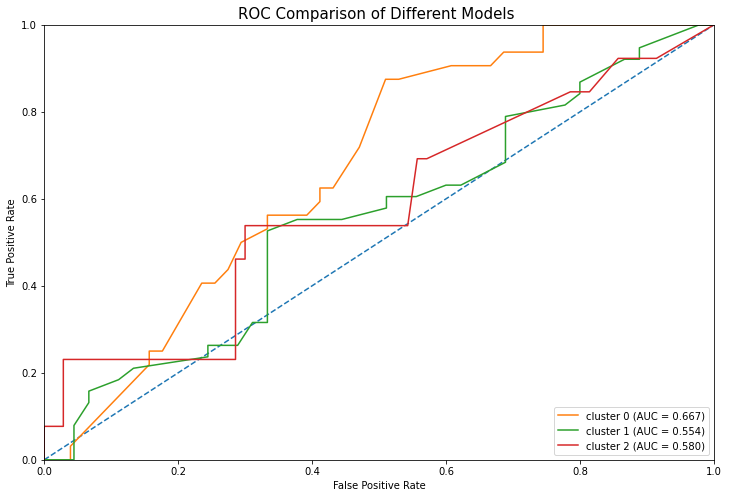

In [336]:
#for Random Forest
y_predRf_0 = rf_0.predict_proba(X_test_0).T[1]
fprRf0, tprRf0, threshRf0 = roc_curve(y_test_0, y_predRf_0)
roc_auc_rf0= roc_auc_score(y_test_0, y_predRf_0)

y_predRf_1 = rf_1.predict_proba(X_test_1).T[1]
fprRf1, tprRf1, threshRf1 = roc_curve(y_test_1, y_predRf_1)
roc_auc_rf1= roc_auc_score(y_test_1, y_predRf_1)

y_predRf_2 = rf_2.predict_proba(X_test_2).T[1]
fprRf2, tprRf2, threshRf2 = roc_curve(y_test_2, y_predRf_2)
roc_auc_rf2= roc_auc_score(y_test_2, y_predRf_2)

fig = plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fprRf0, tprRf0, label='cluster 0 (AUC = %0.3f)' % roc_auc_rf0) 
plt.plot(fprRf1, tprRf1, label='cluster 1 (AUC = %0.3f)' % roc_auc_rf1) 
plt.plot(fprRf2, tprRf2, label='cluster 2 (AUC = %0.3f)' % roc_auc_rf2) 

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Comparison of Different Models ', fontsize = 15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

In [337]:
#Logistic Regression

LogReg_0 = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state = 10)
LogReg_0.fit(X_train_0, y_train_0)
y_predLogReg_0 = LogReg_0.predict_proba(X_test_0).T[1]
LogReg_score_0= roc_auc_score(y_test_0,y_predLogReg_0)

print('\n AUC of Logistic Regression on test data: {}'.format(round(LogReg_score_0,3)))


 AUC of Logistic Regression on test data: 0.651


In [338]:
LogReg_1 = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state = 10)
LogReg_1.fit(X_train_1, y_train_1)
y_predLogReg_1 = LogReg_1.predict_proba(X_test_1).T[1]
LogReg_score_1= roc_auc_score(y_test_1,y_predLogReg_1)

print('\n AUC of Logistic Regression on test data: {}'.format(round(LogReg_score_1,3)))


 AUC of Logistic Regression on test data: 0.462
